In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
'''
class2 = gwls[['D4N0139', 'D4N0140' ,'2526CC00255']]

  
pima1 = gwls['precip_trend']
pima1= pima1.interpolate(limit_direction='both', method='time').mask(pima1.bfill().isna())


ax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")
ax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color='purple') #precip_trend

ax1.set_ylim(-50,-18)
ax2.set_ylim(0,600) #(0, 600) for precip_trend and (0,5) for discharge



ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={'size': 16});
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={'size': 16});

ax1.set_title('Groundwater levels vs precip_trend',fontsize=20) #'Groundwater levels vs precip_trend'
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Groundwater level (m)',fontsize=20)
ax2.set_ylabel('precip_trend (mm)',fontsize=20) #Discharge #precip_trend (mm)
'''

'\nclass2 = gwls[[\'D4N0139\', \'D4N0140\' ,\'2526CC00255\']]\n\n  \npima1 = gwls[\'precip_trend\']\npima1= pima1.interpolate(limit_direction=\'both\', method=\'time\').mask(pima1.bfill().isna())\n\n\nax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")\nax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color=\'purple\') #precip_trend\n\nax1.set_ylim(-50,-18)\nax2.set_ylim(0,600) #(0, 600) for precip_trend and (0,5) for discharge\n\n\n\nax1.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={\'size\': 16});\nax2.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={\'size\': 16});\n\nax1.set_title(\'Groundwater levels vs precip_trend\',fontsize=20) #\'Groundwater levels vs precip_trend\'\nax1.set_xlabel(\'Year\',fontsize=20)\nax1.set_ylabel(\'Groundwater level (m)\',fontsize=20)\nax2.set_ylabel(\'precip_trend (mm)\',fontsize=20) #Discharge #precip_trend (mm)\n'

In [3]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

p = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_3.xlsx')
p.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
z.set_index('year_month', inplace=True)

In [4]:
df['Abstraction'] = w['Usage']
df['D4N0140'] = p[' D4N0140']
df['D4N0141'] = p[' D4N0141']
df['D4N0142'] = p[' D4N0142']
df['D4N0139'] = p[' D4N0139']
df['2526CC00029'] = p['2526CC00029']
df['2526CC00255'] = p[' 2526CC00255']
df['2625BB00028'] = z['2625BB00028']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0140  D4N0141  D4N0142  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0139  2526CC00029  2526CC00255  2625BB00028  
year_month                                                  
1950-01-01      NaN          NaN          NaN          NaN  
1950-02-01      NaN          NaN          NaN          NaN  
1950-03-01      NaN          NaN          NaN          NaN  
1950-04-01 

In [6]:
df = df[['2625BB00028', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [7]:
df

2625BB00028  D4N0140  D4N0141  D4N0142  2526CC00029  Temperature  \
year_month                                                                     
1950-01-01          NaN      NaN      NaN      NaN          NaN        23.90   
1950-02-01          NaN      NaN      NaN      NaN          NaN        25.10   
1950-03-01          NaN      NaN      NaN      NaN          NaN        23.75   
1950-04-01          NaN      NaN      NaN      NaN          NaN        19.65   
1950-05-01          NaN      NaN      NaN      NaN          NaN        14.60   
...                 ...      ...      ...      ...          ...          ...   
2019-08-01          NaN      NaN      NaN      NaN          NaN          NaN   
2019-09-01          NaN      NaN      NaN      NaN          NaN          NaN   
2019-10-01          NaN      NaN      NaN      NaN          NaN          NaN   
2019-11-01          NaN      NaN      NaN      NaN          NaN          NaN   
2019-12-01          NaN      NaN      NaN      NaN          NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [8]:
f = lambda x: -x; 
gwls = df[[ 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2625BB00028']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0140    D4N0141    D4N0142 2526CC00029 2625BB00028
0 1977-01-01 1977-01-01 1977-01-01  1976-01-01  1975-07-01
1 2017-09-01 2014-05-01 2017-08-01  2017-09-01  2004-03-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1975-08-01']  
gwls = gwls[gwls.index < '2004-04-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

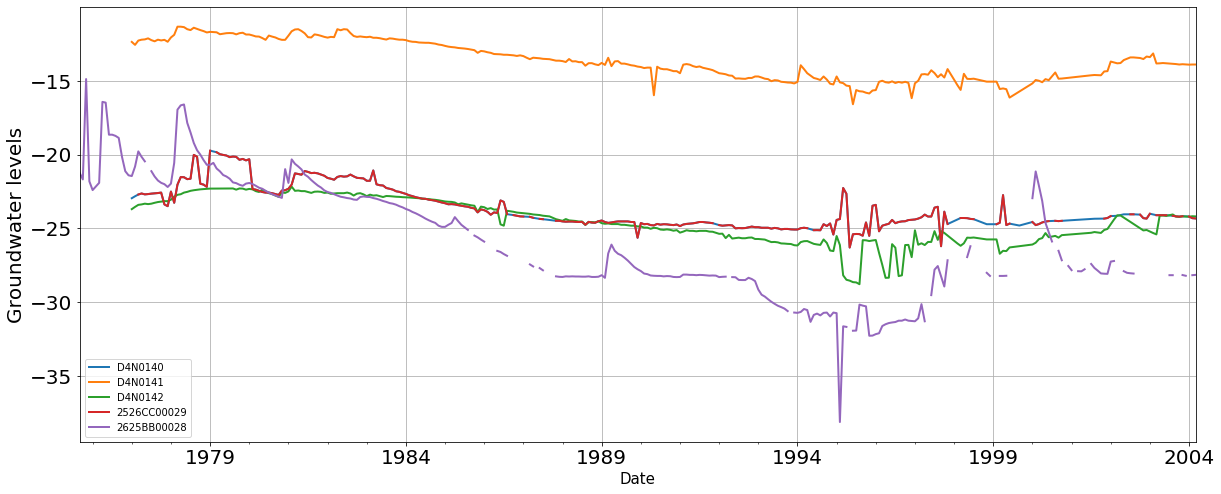

In [11]:
#visual illustration just to show all groundwater levels 

gwls.plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0140    D4N0141    D4N0142  2526CC00029  2625BB00028  \
year_month                                                              
1975-09-01        NaN        NaN        NaN          NaN      -21.220   
1975-10-01        NaN        NaN        NaN          NaN      -21.680   
1975-11-01        NaN        NaN        NaN          NaN      -14.885   
1975-12-01        NaN        NaN        NaN          NaN      -21.810   
1976-01-01        NaN        NaN        NaN       -30.00      -22.400   
...               ...        ...        ...          ...          ...   
2003-11-01 -24.170000 -13.880000 -24.180000       -24.17      -28.150   
2003-12-01 -24.179836 -13.894754 -24.189836          NaN      -28.200   
2004-01-01 -24.190000 -13.910000 -24.200000       -24.19          NaN   
2004-02-01 -24.300000 -13.900000 -24.170000       -24.30      -28.160   
2004-03-01 -24.320000 -13.900000 -24.180000       -24.32      -28.140   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1975-09-01        19.80     93.183333      0.809  1.665429e+05  
1975-10-01        21.10     92.108333      0.608  1.665429e+05  
1975-11-01        23.15     92.400000      0.537  1.665429e+05  
1975-12-01        22.70     92.108333      0.408  1.665429e+05  
1976-01-01        22.15     91.587500      0.579  3.271530e+05  
...                 ...           ...        ...           ...  
2003-11-01        21.80     58.746558      0.401  2.735368e+06  
2003-12-01        24.05     58.728261      0.393  2.735368e+06  
2004-01-01        23.00     58.521649      0.400  2.572182e+06  
2004-02-01        21.65     58.408333      0.375  2.572182e+06  
2004-03-01        20.05     55.891667      0.367  2.572182e+06  

[343 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [13]:
pima = gwls.filter(['2625BB00028', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index < '2002-09-01']  

In [14]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

2625BB00028     37
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [15]:
pima = pima.interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

Text(0, 0.5, 'Groundwater levels')

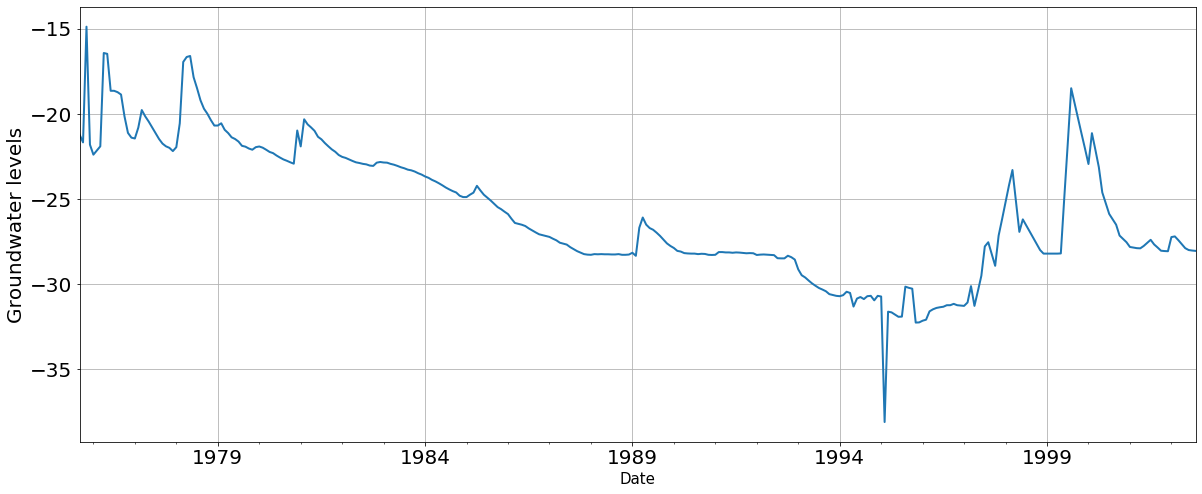

In [16]:
pima['2625BB00028'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)

#### Calculating start and end dates for new dataframa

In [17]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


2625BB00028 Temperature precip_trend  Discharge Abstraction
0  1975-09-01  1975-09-01   1975-09-01 1975-09-01  1975-09-01
1  2002-08-01  2002-08-01   2002-08-01 2002-08-01  2002-08-01

### Mutual information stats

In [18]:
from sklearn.feature_selection import mutual_info_regression

In [19]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['2625BB00028']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [20]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.074227
precip_trend    0.407737
Discharge       0.698139
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [21]:
precip1  = pima.filter(['2625BB00028', 'precip_trend'])
discha1 = pima.filter(['2625BB00028', 'Discharge'])
temp1   = pima.filter(['2625BB00028', 'Temperature'])
abstr1   = pima.filter(['2625BB00028', 'Abstraction'])

In [22]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

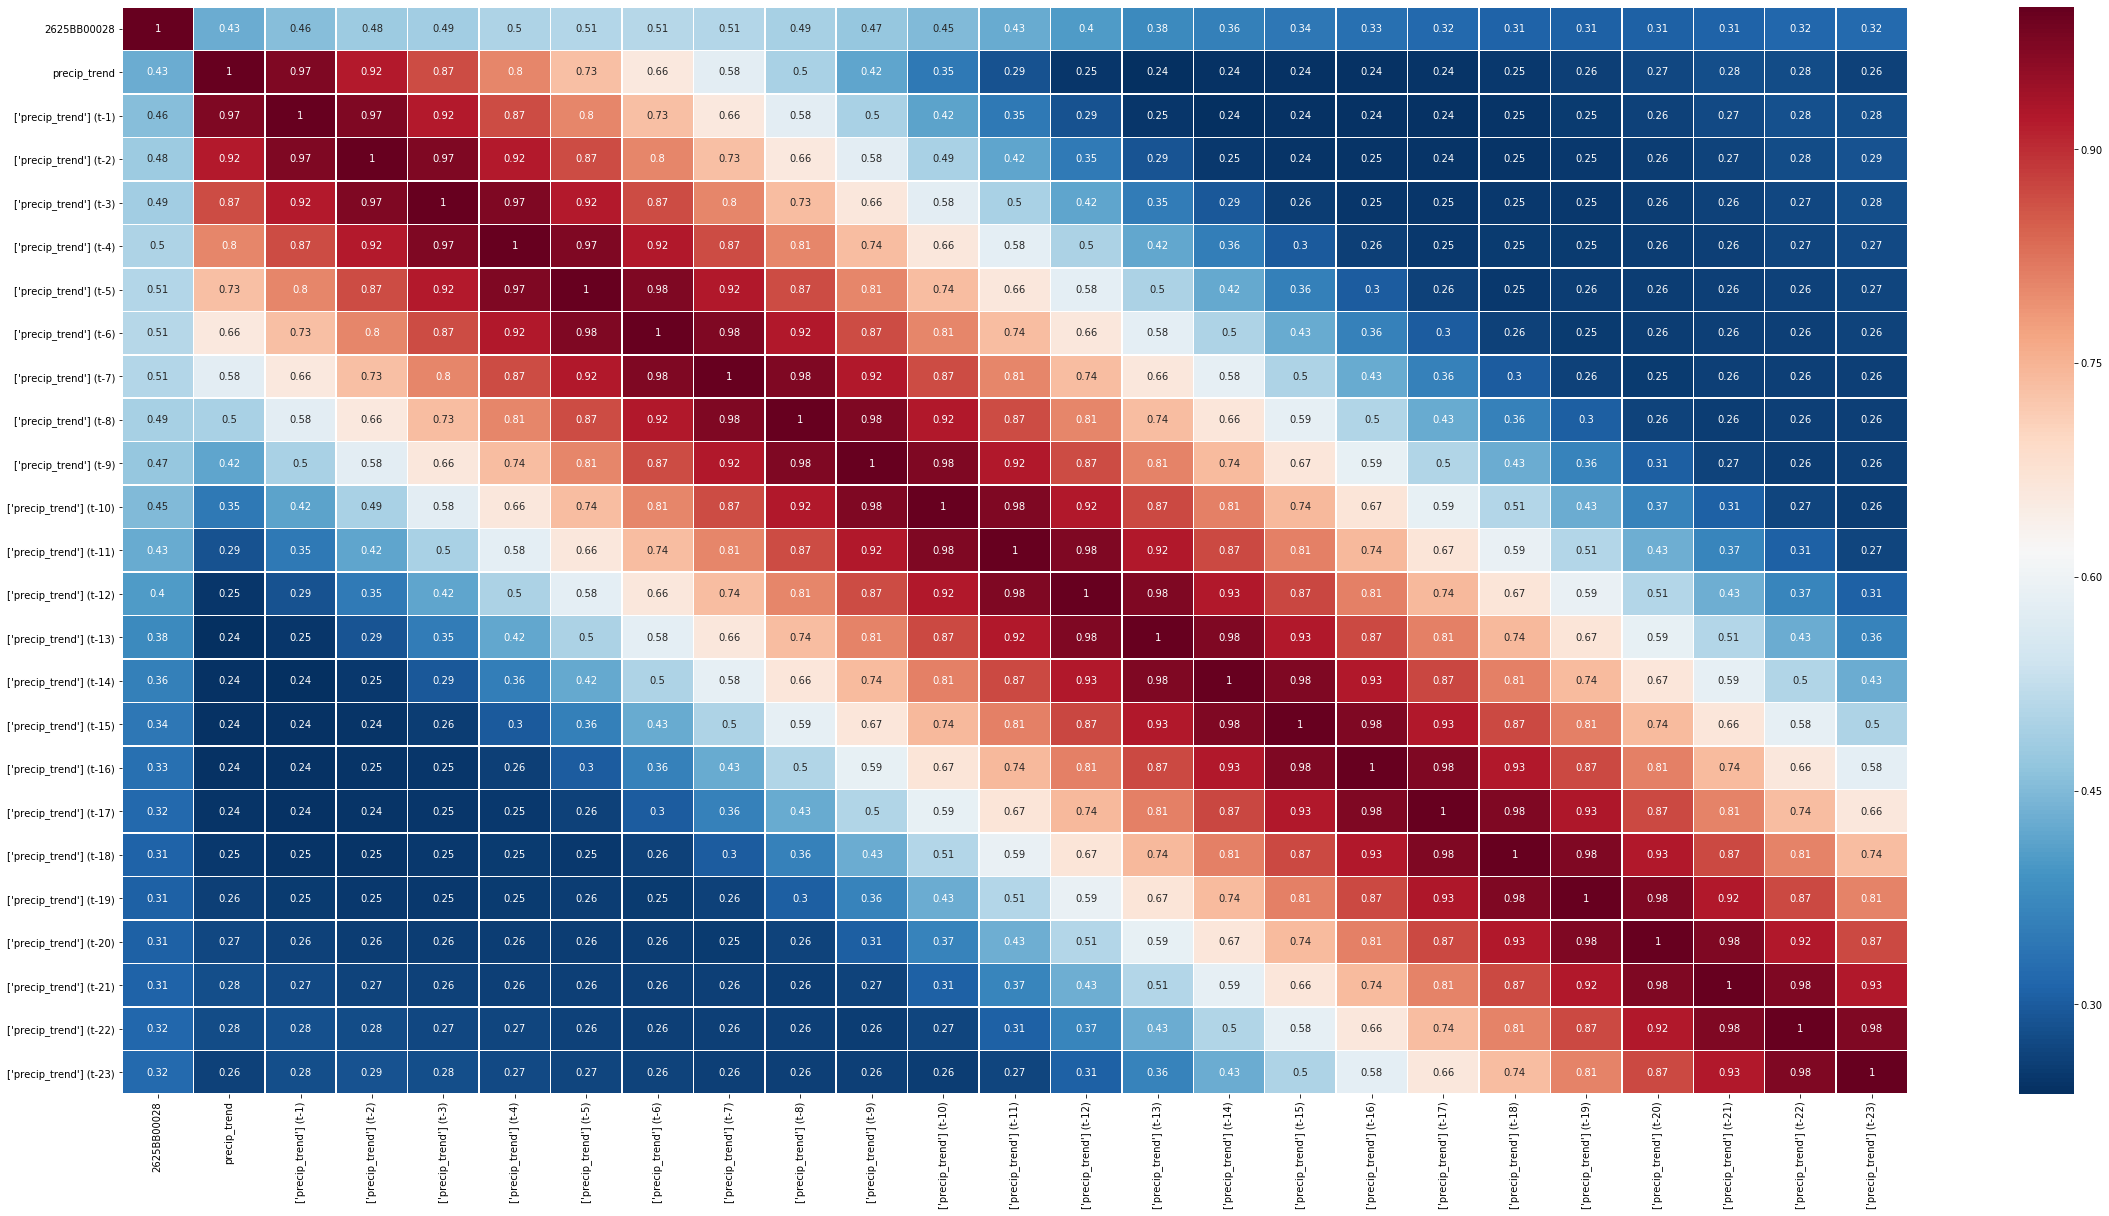

In [23]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

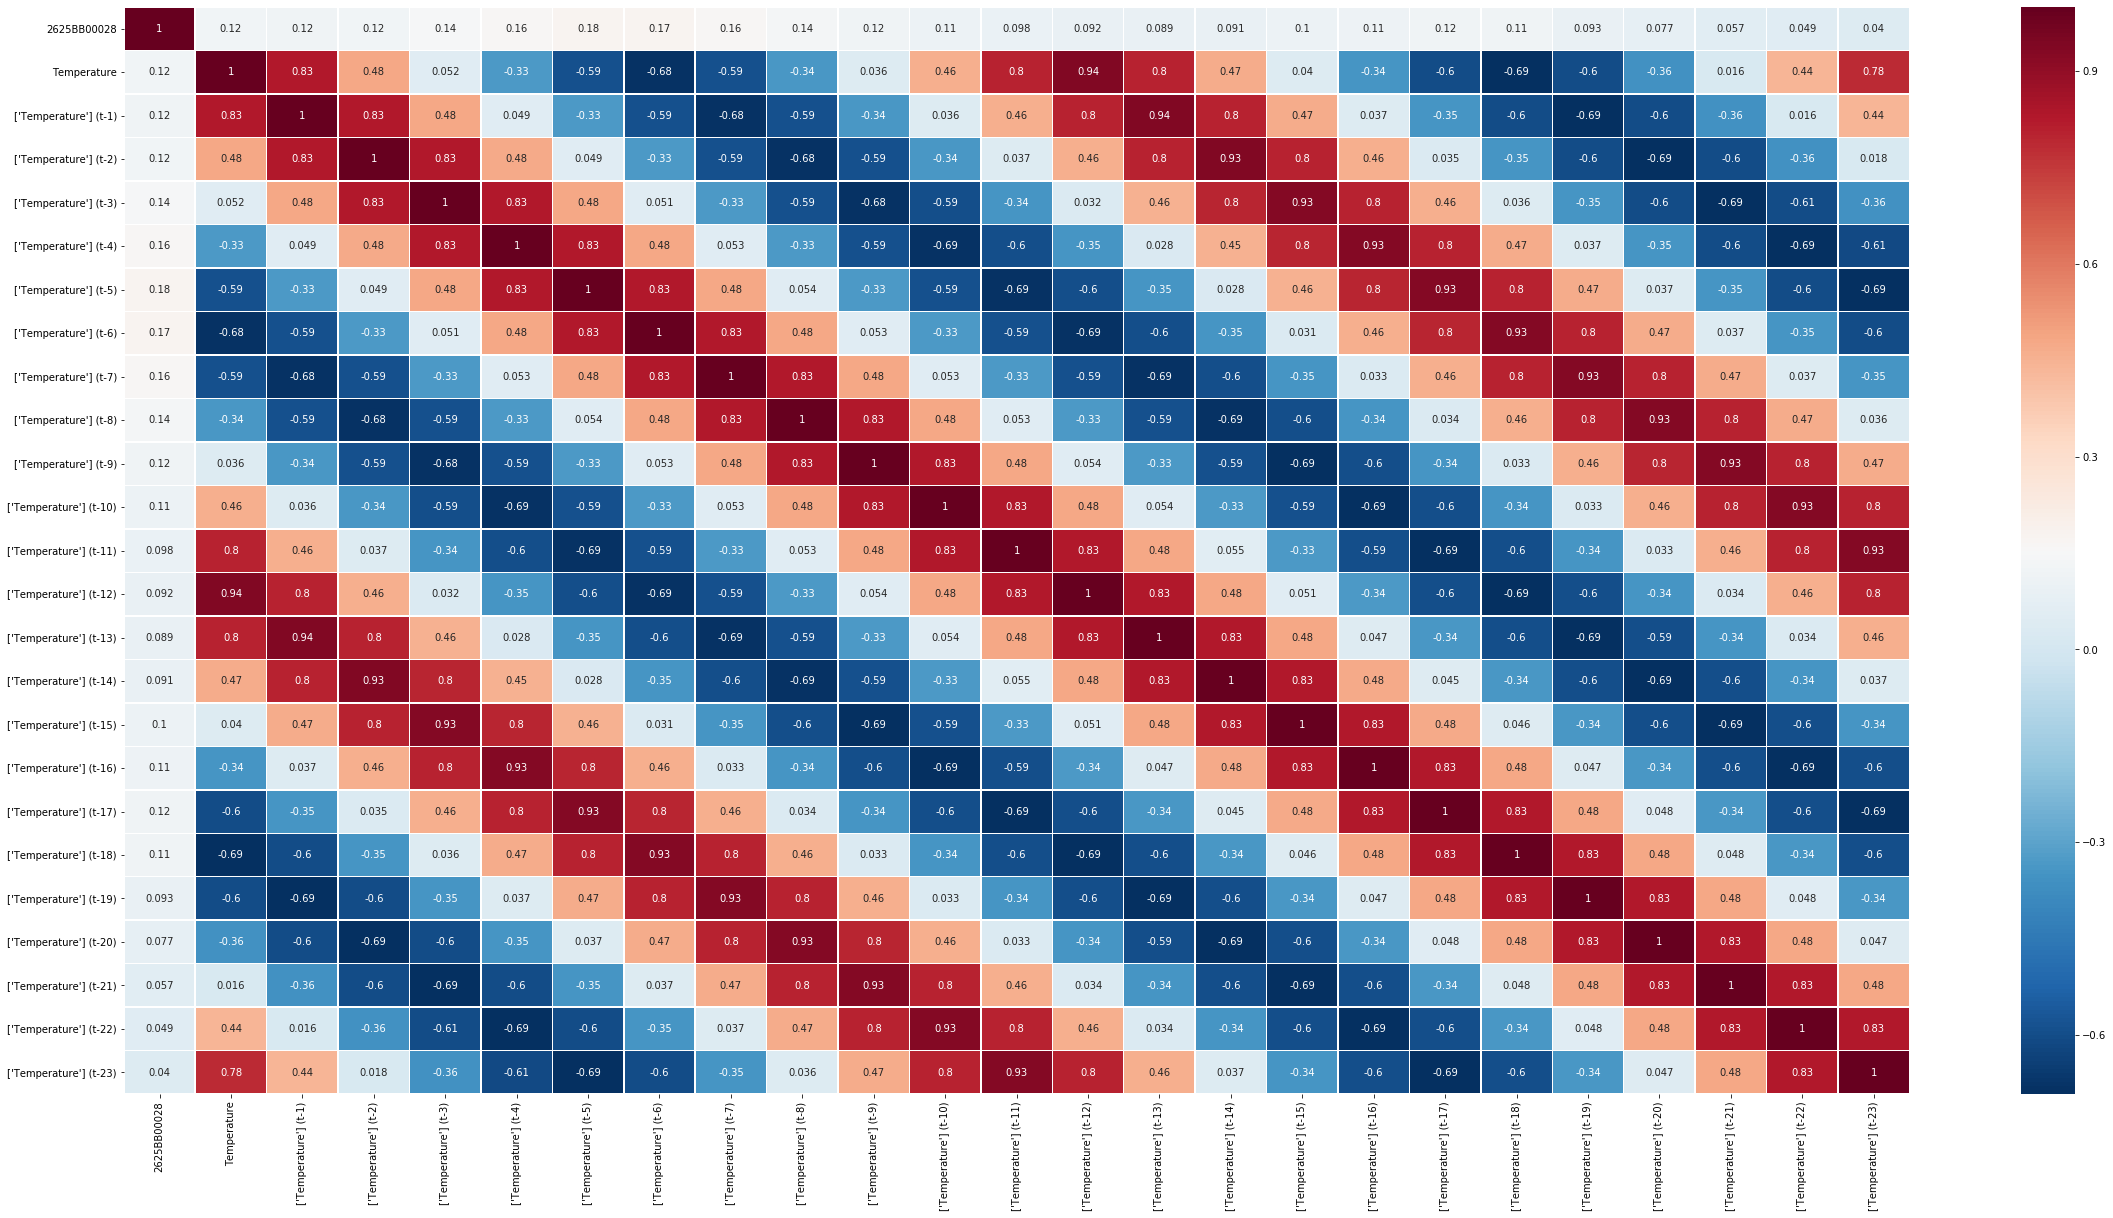

In [24]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [25]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [26]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(4)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

2625BB00028  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                    
1975-09-01   -21.220000        19.80     93.183333      0.809  1.665429e+05   
1975-10-01   -21.680000        21.10     92.108333      0.608  1.665429e+05   
1975-11-01   -14.885000        23.15     92.400000      0.537  1.665429e+05   
1975-12-01   -21.810000        22.70     92.108333      0.408  1.665429e+05   
1976-01-01   -22.400000        22.15     91.587500      0.579  3.271530e+05   
...                 ...          ...           ...        ...           ...   
2002-04-01   -27.657416        18.75     39.583333      0.565  2.568580e+06   
2002-05-01   -27.890000        13.85     34.383333      0.547  2.568580e+06   
2002-06-01   -28.000000        10.15     32.116667      0.531  2.568580e+06   
2002-07-01   -28.030000        10.05     34.441667      0.514  2.568580e+06   
2002-08-01   -28.050000        14.50     39.850000      0.510  2.568580e+06   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1975-09-01              19.80                 NaN  
1975-10-01              21.10                 NaN  
1975-11-01              23.15                 NaN  
1975-12-01              22.70                 NaN  
1976-01-01              22.15           93.183333  
...                       ...                 ...  
2002-04-01              18.75           44.166667  
2002-05-01              13.85           44.483333  
2002-06-01              10.15           44.400000  
2002-07-01              10.05           43.700000  
2002-08-01              14.50           39.583333  

[324 rows x 7 columns]

In [27]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction', '2625BB00028']] # Features
y = pima[['2625BB00028']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [28]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.025493
precip_trend (t-5)    0.141918
Discharge             0.234766
Abstraction           0.334213
2625BB00028           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
rainfall = X['precip_trend (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['2625BB00028']

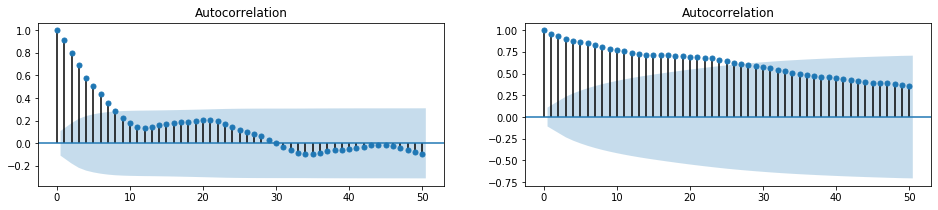

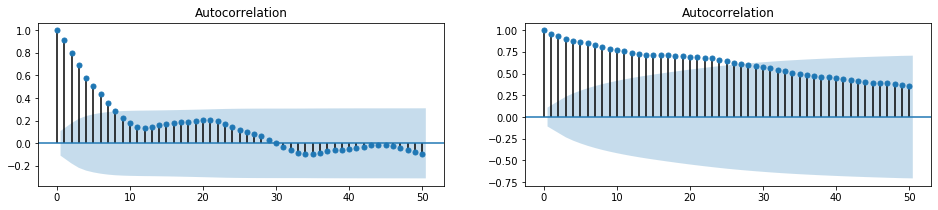

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

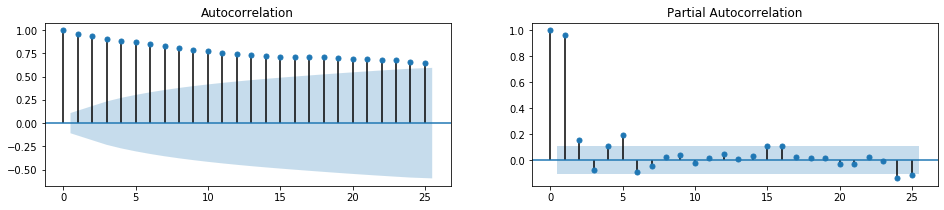

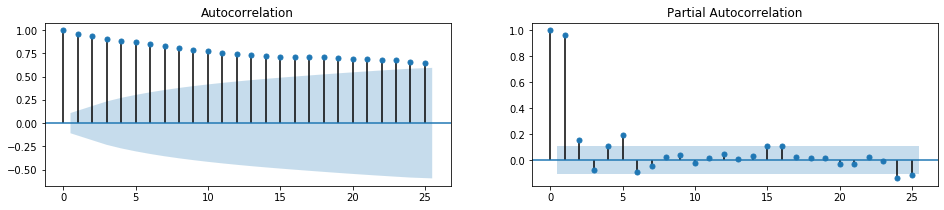

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

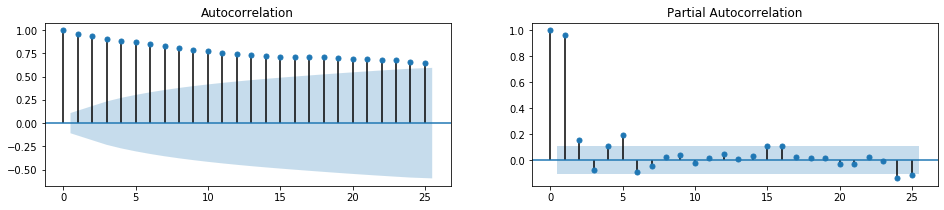

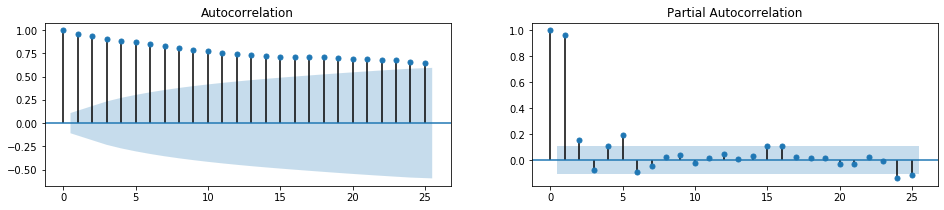

In [34]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

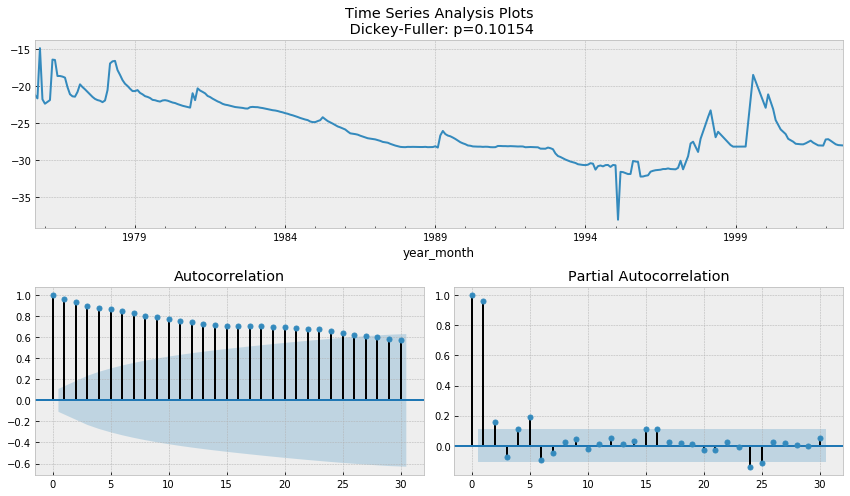

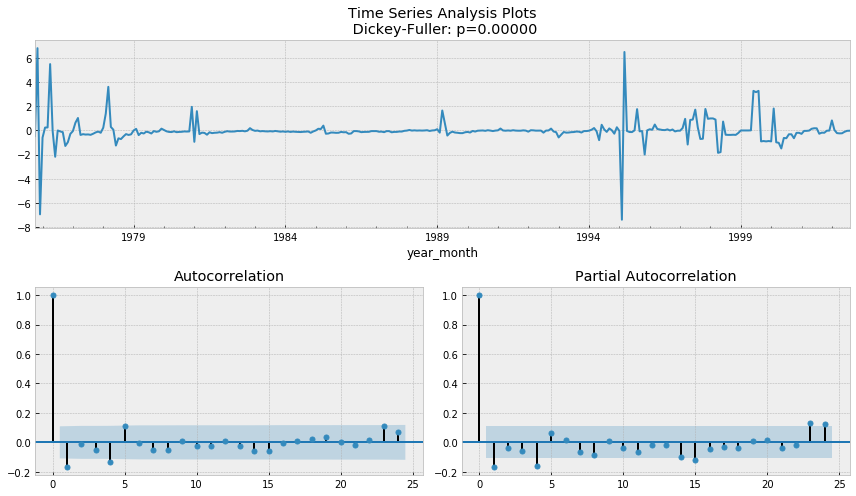

In [35]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0111_diff = bhid - bhid.shift(1)

tsplot(D4N0111_diff[1:], lags=24)

#### Rainfall

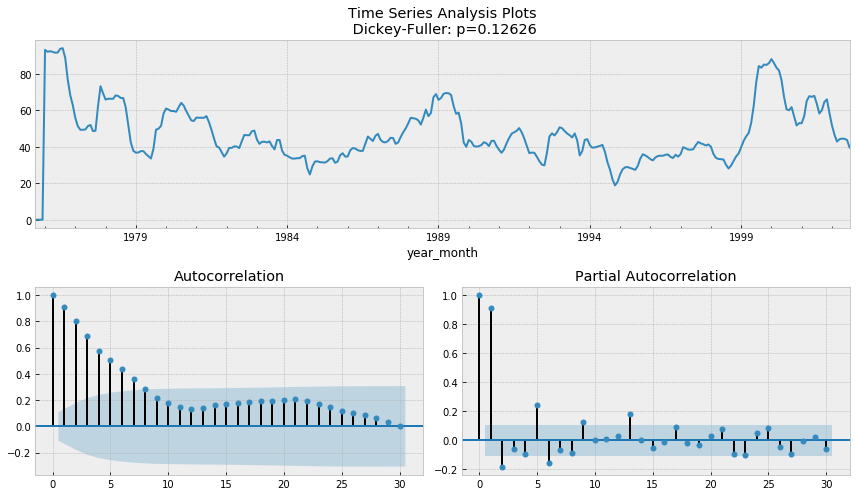

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


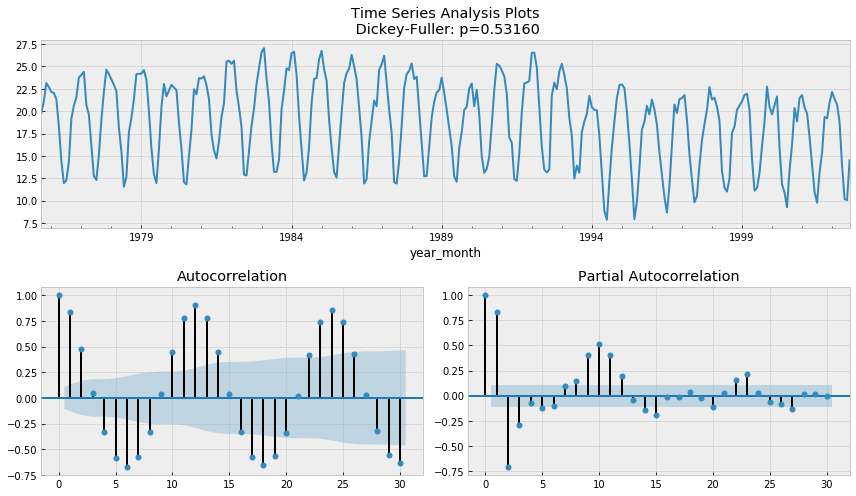

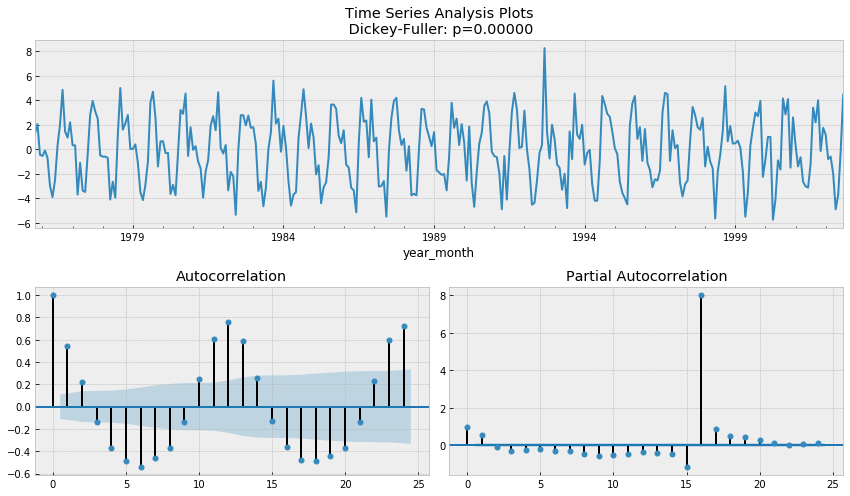

In [37]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

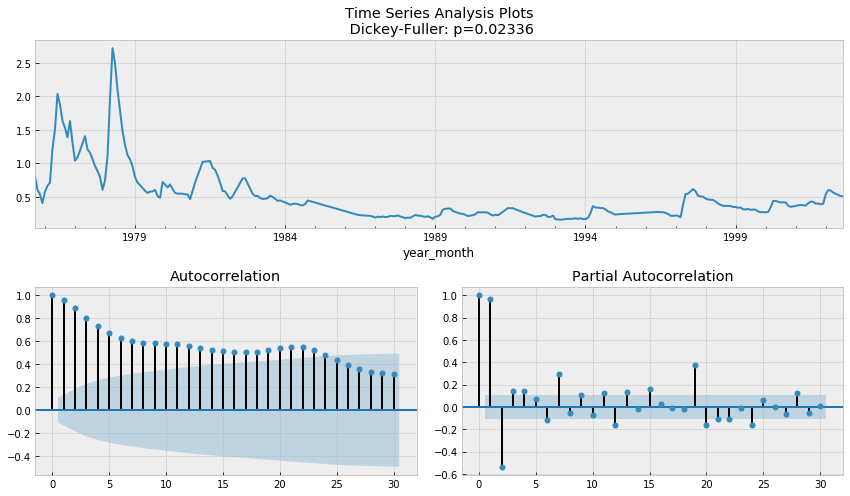

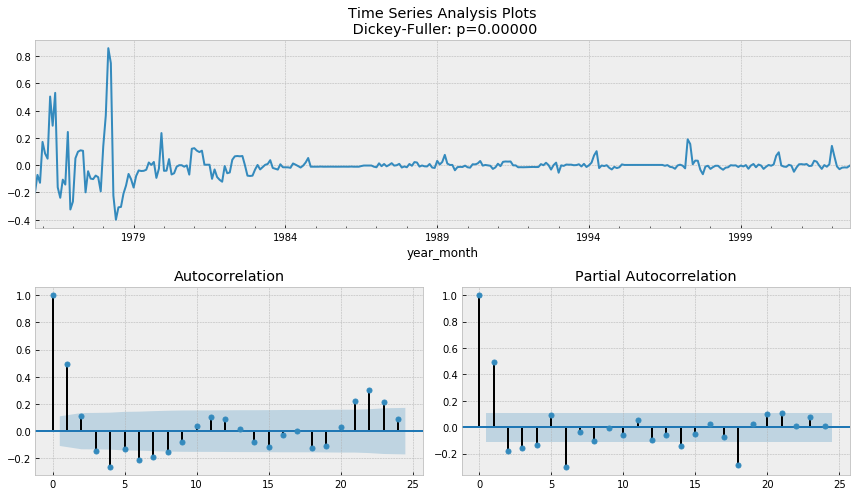

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

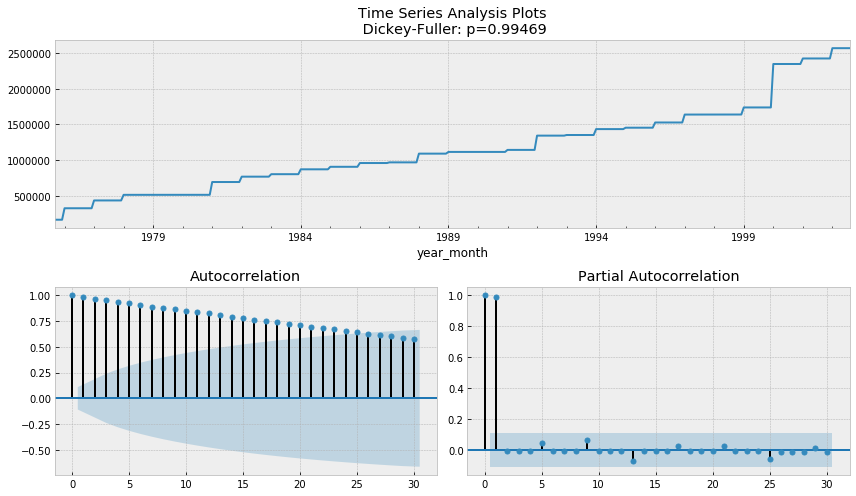

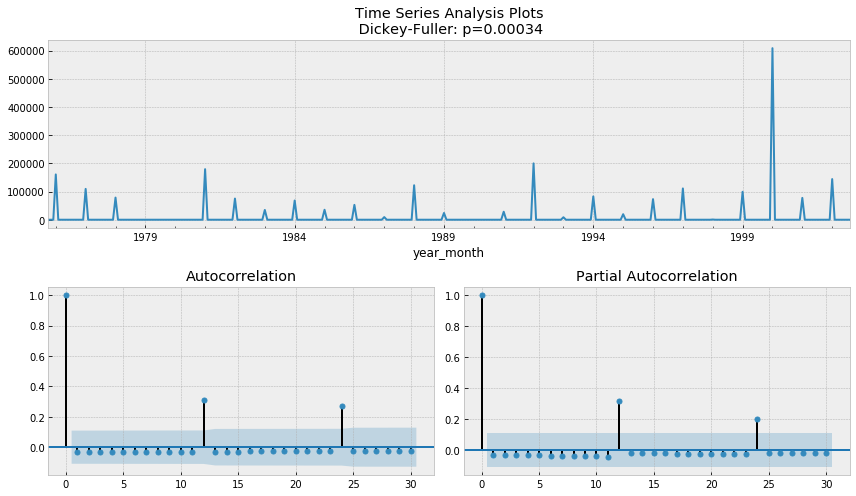

In [39]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [40]:
pima_diff = pd.DataFrame({'D4N0111': D4N0111_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0111','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0111           1
Temperature       1
precip_trend    324
Discharge         1
Abstraction       1
dtype: int64

In [41]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

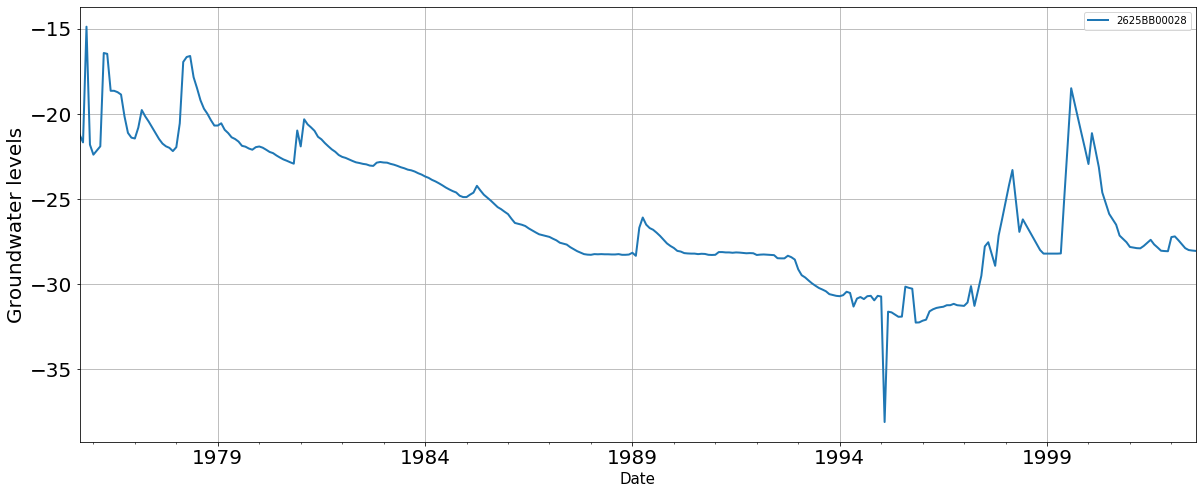

In [42]:
pima[['2625BB00028']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [43]:
#pima = pima[pima.index < '2004-05-01'] 

### Model Parameters

In [44]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [45]:
pima

2625BB00028  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                    
1975-09-01   -21.220000        19.80     93.183333      0.809  1.665429e+05   
1975-10-01   -21.680000        21.10     92.108333      0.608  1.665429e+05   
1975-11-01   -14.885000        23.15     92.400000      0.537  1.665429e+05   
1975-12-01   -21.810000        22.70     92.108333      0.408  1.665429e+05   
1976-01-01   -22.400000        22.15     91.587500      0.579  3.271530e+05   
...                 ...          ...           ...        ...           ...   
2002-04-01   -27.657416        18.75     39.583333      0.565  2.568580e+06   
2002-05-01   -27.890000        13.85     34.383333      0.547  2.568580e+06   
2002-06-01   -28.000000        10.15     32.116667      0.531  2.568580e+06   
2002-07-01   -28.030000        10.05     34.441667      0.514  2.568580e+06   
2002-08-01   -28.050000        14.50     39.850000      0.510  2.568580e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1975-09-01              19.80                 NaN               NaN   
1975-10-01              21.10                 NaN               NaN   
1975-11-01              23.15                 NaN               NaN   
1975-12-01              22.70                 NaN               NaN   
1976-01-01              22.15           93.183333          5.545243   
...                       ...                 ...               ...   
2002-04-01              18.75           44.166667          4.810359   
2002-05-01              13.85           44.483333          4.817346   
2002-06-01              10.15           44.400000          4.815512   
2002-07-01              10.05           43.700000          4.799974   
2002-08-01              14.50           39.583333          4.703357   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1975-09-01         4.034953       1.592774        13.023014  
1975-10-01         4.095578       1.474991        13.023014  
1975-11-01         4.184284       1.429832        13.023014  
1975-12-01         4.165475       1.342170        13.023014  
1976-01-01         4.141995       1.456792        13.698186  
...                     ...            ...              ...  
2002-04-01         3.983153       1.447886        15.758864  
2002-05-01         3.698000       1.436318        15.758864  
2002-06-01         3.411439       1.425921        15.758864  
2002-07-01         3.402430       1.414755        15.758864  
2002-08-01         3.740840       1.412110        15.758864  

[324 rows x 11 columns]

In [46]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima['2625BB00028'].shift(obs)
pima.fillna(0, inplace=True)


In [47]:
pima

2625BB00028  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                    
1975-09-01   -21.220000        19.80     93.183333      0.809  1.665429e+05   
1975-10-01   -21.680000        21.10     92.108333      0.608  1.665429e+05   
1975-11-01   -14.885000        23.15     92.400000      0.537  1.665429e+05   
1975-12-01   -21.810000        22.70     92.108333      0.408  1.665429e+05   
1976-01-01   -22.400000        22.15     91.587500      0.579  3.271530e+05   
...                 ...          ...           ...        ...           ...   
2002-04-01   -27.657416        18.75     39.583333      0.565  2.568580e+06   
2002-05-01   -27.890000        13.85     34.383333      0.547  2.568580e+06   
2002-06-01   -28.000000        10.15     32.116667      0.531  2.568580e+06   
2002-07-01   -28.030000        10.05     34.441667      0.514  2.568580e+06   
2002-08-01   -28.050000        14.50     39.850000      0.510  2.568580e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1975-09-01              19.80            0.000000          0.000000   
1975-10-01              21.10            0.000000          0.000000   
1975-11-01              23.15            0.000000          0.000000   
1975-12-01              22.70            0.000000          0.000000   
1976-01-01              22.15           93.183333          5.545243   
...                       ...                 ...               ...   
2002-04-01              18.75           44.166667          4.810359   
2002-05-01              13.85           44.483333          4.817346   
2002-06-01              10.15           44.400000          4.815512   
2002-07-01              10.05           43.700000          4.799974   
2002-08-01              14.50           39.583333          4.703357   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1975-09-01         4.034953       1.592774        13.023014   0.000000   
1975-10-01         4.095578       1.474991        13.023014 -21.220000   
1975-11-01         4.184284       1.429832        13.023014 -21.680000   
1975-12-01         4.165475       1.342170        13.023014 -14.885000   
1976-01-01         4.141995       1.456792        13.698186 -21.810000   
...                     ...            ...              ...        ...   
2002-04-01         3.983153       1.447886        15.758864 -27.417079   
2002-05-01         3.698000       1.436318        15.758864 -27.657416   
2002-06-01         3.411439       1.425921        15.758864 -27.890000   
2002-07-01         3.402430       1.414755        15.758864 -28.000000   
2002-08-01         3.740840       1.412110        15.758864 -28.030000   

                  t_2        t_3        t_4  
year_month                                   
1975-09-01   0.000000   0.000000   0.000000  
1975-10-01   0.000000   0.000000   0.000000  
1975-11-01 -21.220000   0.000000   0.000000  
1975-12-01 -21.680000 -21.220000   0.000000  
1976-01-01 -14.885000 -21.680000 -21.220000  
...               ...        ...        ...  
2002-04-01 -27.200000 -27.240000 -28.070000  
2002-05-01 -27.417079 -27.200000 -27.240000  
2002-06-01 -27.657416 -27.417079 -27.200000  
2002-07-01 -27.890000 -27.657416 -27.417079  
2002-08-01 -28.000000 -27.890000 -27.657416  

[324 rows x 15 columns]

In [48]:
pima.shape

(324, 15)

In [49]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','2625BB00028']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [50]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['2625BB00028']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.036189
precip_trend_log    0.244662
Discharge_log       0.433694
Abstraction_log     0.588326
t_1                 1.000000
t_2                 0.816496
dtype: float64

In [51]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['2625BB00028'].values
y = y.reshape(-1,1)

In [52]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(270, 6) (270, 1)
(54, 6) (54, 1)


In [53]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [54]:
y_test[0]

array([0.66154411])

### LSTM

In [55]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [56]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl = 0.66154411
    test_forecast = X_test
    steps_ahead = 54
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 270 samples, validate on 54 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.54398, saving model to model.h5
270/270 - 3s - loss: 0.8981 - val_loss: 0.5440
Epoch 2/700

Epoch 00002: val_loss improved from 0.54398 to 0.53037, saving model to model.h5
270/270 - 0s - loss: 0.8642 - val_loss: 0.5304
Epoch 3/700

Epoch 00003: val_loss improved from 0.53037 to 0.51622, saving model to model.h5
270/270 - 0s - loss: 0.8344 - val_loss: 0.5162
Epoch 4/700

Epoch 00004: val_loss improved from 0.51622 to 0.50184, saving model to model.h5
270/270 - 0s - loss: 0.8022 - val_loss: 0.5018
Epoch 5/700

Epoch 00005: val_loss improved from 0.50184 to 0.48753, saving model to model.h5
270/270 - 0s - loss: 0.7672 - val_loss: 0.4875
Epoch 6/700

Epoch

Epoch 62/700

Epoch 00062: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1261 - val_loss: 0.3579
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1248 - val_loss: 0.3580
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1297 - val_loss: 0.3573
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1286 - val_loss: 0.3553
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1240 - val_loss: 0.3525
Epoch 67/700

Epoch 00067: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1202 - val_loss: 0.3493
Epoch 68/700

Epoch 00068: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1192 - val_loss: 0.3463
Epoch 69/700

Epoch 00069: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1198 - val_loss: 0.3455
Epoch 70/700

Epoch 00070: val_loss did not improve from 0.29765
270/270 - 0s - loss: 0.1200 - val_loss:


Epoch 00130: val_loss improved from 0.24575 to 0.24185, saving model to model.h5
270/270 - 0s - loss: 0.1101 - val_loss: 0.2419
Epoch 131/700

Epoch 00131: val_loss improved from 0.24185 to 0.23656, saving model to model.h5
270/270 - 0s - loss: 0.1156 - val_loss: 0.2366
Epoch 132/700

Epoch 00132: val_loss improved from 0.23656 to 0.23187, saving model to model.h5
270/270 - 0s - loss: 0.1072 - val_loss: 0.2319
Epoch 133/700

Epoch 00133: val_loss improved from 0.23187 to 0.23078, saving model to model.h5
270/270 - 0s - loss: 0.1111 - val_loss: 0.2308
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.23078
270/270 - 0s - loss: 0.1109 - val_loss: 0.2321
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.23078
270/270 - 0s - loss: 0.1174 - val_loss: 0.2348
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.23078
270/270 - 0s - loss: 0.1160 - val_loss: 0.2365
Epoch 137/700

Epoch 00137: val_loss did not improve from 0.23078
270/270 - 0s - loss: 0.1109 - val_los

Epoch 192/700

Epoch 00192: val_loss did not improve from 0.18436
270/270 - 0s - loss: 0.1031 - val_loss: 0.1862
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.18436
270/270 - 0s - loss: 0.1076 - val_loss: 0.1845
Epoch 194/700

Epoch 00194: val_loss improved from 0.18436 to 0.18217, saving model to model.h5
270/270 - 0s - loss: 0.1066 - val_loss: 0.1822
Epoch 195/700

Epoch 00195: val_loss improved from 0.18217 to 0.18018, saving model to model.h5
270/270 - 0s - loss: 0.1039 - val_loss: 0.1802
Epoch 196/700

Epoch 00196: val_loss improved from 0.18018 to 0.17897, saving model to model.h5
270/270 - 0s - loss: 0.1054 - val_loss: 0.1790
Epoch 197/700

Epoch 00197: val_loss improved from 0.17897 to 0.17875, saving model to model.h5
270/270 - 0s - loss: 0.1048 - val_loss: 0.1787
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.17875
270/270 - 0s - loss: 0.1052 - val_loss: 0.1795
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.17875
270/270 - 0s - loss: 0.

Epoch 255/700

Epoch 00255: val_loss did not improve from 0.16861
270/270 - 0s - loss: 0.1030 - val_loss: 0.1704
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.16861
270/270 - 0s - loss: 0.0969 - val_loss: 0.1694
Epoch 257/700

Epoch 00257: val_loss improved from 0.16861 to 0.16838, saving model to model.h5
270/270 - 0s - loss: 0.1010 - val_loss: 0.1684
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.16838
270/270 - 0s - loss: 0.1067 - val_loss: 0.1688
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.16838
270/270 - 0s - loss: 0.0997 - val_loss: 0.1705
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.16838
270/270 - 0s - loss: 0.0988 - val_loss: 0.1710
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.16838
270/270 - 0s - loss: 0.1050 - val_loss: 0.1709
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.16838
270/270 - 0s - loss: 0.1030 - val_loss: 0.1699
Epoch 263/700

Epoch 00263: val_loss did not improve from 0.16838


Epoch 326/700

Epoch 00326: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0976 - val_loss: 0.1659
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0975 - val_loss: 0.1661
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0906 - val_loss: 0.1656
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0971 - val_loss: 0.1668
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0982 - val_loss: 0.1689
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.1025 - val_loss: 0.1693
Epoch 332/700

Epoch 00332: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0982 - val_loss: 0.1671
Epoch 333/700

Epoch 00333: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0980 - val_loss: 0.1659
Epoch 334/700

Epoch 00334: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0983 - 

Epoch 399/700

Epoch 00399: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0918 - val_loss: 0.1734
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0905 - val_loss: 0.1710
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0933 - val_loss: 0.1699
Epoch 402/700

Epoch 00402: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0986 - val_loss: 0.1697
Epoch 403/700

Epoch 00403: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0937 - val_loss: 0.1687
Epoch 404/700

Epoch 00404: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0945 - val_loss: 0.1659
Epoch 405/700

Epoch 00405: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0937 - val_loss: 0.1643
Epoch 406/700

Epoch 00406: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0958 - val_loss: 0.1658
Epoch 407/700

Epoch 00407: val_loss did not improve from 0.16214
270/270 - 0s - loss: 0.0908 - 

Epoch 50/700

Epoch 00050: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1236 - val_loss: 0.3282
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1234 - val_loss: 0.3278
Epoch 52/700

Epoch 00052: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1229 - val_loss: 0.3252
Epoch 53/700

Epoch 00053: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1234 - val_loss: 0.3231
Epoch 54/700

Epoch 00054: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1220 - val_loss: 0.3210
Epoch 55/700

Epoch 00055: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1258 - val_loss: 0.3196
Epoch 56/700

Epoch 00056: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1208 - val_loss: 0.3179
Epoch 57/700

Epoch 00057: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1188 - val_loss: 0.3181
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.30827
270/270 - 0s - loss: 0.1194 - val_loss:

Epoch 113/700

Epoch 00113: val_loss did not improve from 0.24071
270/270 - 0s - loss: 0.1109 - val_loss: 0.2415
Epoch 114/700

Epoch 00114: val_loss improved from 0.24071 to 0.24005, saving model to model.h5
270/270 - 0s - loss: 0.1150 - val_loss: 0.2401
Epoch 115/700

Epoch 00115: val_loss improved from 0.24005 to 0.23788, saving model to model.h5
270/270 - 0s - loss: 0.1038 - val_loss: 0.2379
Epoch 116/700

Epoch 00116: val_loss improved from 0.23788 to 0.23619, saving model to model.h5
270/270 - 0s - loss: 0.1174 - val_loss: 0.2362
Epoch 117/700

Epoch 00117: val_loss improved from 0.23619 to 0.23386, saving model to model.h5
270/270 - 0s - loss: 0.1087 - val_loss: 0.2339
Epoch 118/700

Epoch 00118: val_loss improved from 0.23386 to 0.23165, saving model to model.h5
270/270 - 0s - loss: 0.1104 - val_loss: 0.2317
Epoch 119/700

Epoch 00119: val_loss improved from 0.23165 to 0.23086, saving model to model.h5
270/270 - 0s - loss: 0.1055 - val_loss: 0.2309
Epoch 120/700

Epoch 00120: v

Epoch 175/700

Epoch 00175: val_loss improved from 0.18522 to 0.18499, saving model to model.h5
270/270 - 0s - loss: 0.1049 - val_loss: 0.1850
Epoch 176/700

Epoch 00176: val_loss improved from 0.18499 to 0.18435, saving model to model.h5
270/270 - 0s - loss: 0.1058 - val_loss: 0.1843
Epoch 177/700

Epoch 00177: val_loss improved from 0.18435 to 0.18312, saving model to model.h5
270/270 - 0s - loss: 0.1073 - val_loss: 0.1831
Epoch 178/700

Epoch 00178: val_loss improved from 0.18312 to 0.18289, saving model to model.h5
270/270 - 0s - loss: 0.1034 - val_loss: 0.1829
Epoch 179/700

Epoch 00179: val_loss improved from 0.18289 to 0.18175, saving model to model.h5
270/270 - 0s - loss: 0.1073 - val_loss: 0.1817
Epoch 180/700

Epoch 00180: val_loss improved from 0.18175 to 0.17891, saving model to model.h5
270/270 - 0s - loss: 0.1046 - val_loss: 0.1789
Epoch 181/700

Epoch 00181: val_loss improved from 0.17891 to 0.17825, saving model to model.h5
270/270 - 0s - loss: 0.1012 - val_loss: 0.1783

Epoch 239/700

Epoch 00239: val_loss improved from 0.15795 to 0.15732, saving model to model.h5
270/270 - 0s - loss: 0.0965 - val_loss: 0.1573
Epoch 240/700

Epoch 00240: val_loss improved from 0.15732 to 0.15725, saving model to model.h5
270/270 - 0s - loss: 0.0989 - val_loss: 0.1572
Epoch 241/700

Epoch 00241: val_loss improved from 0.15725 to 0.15710, saving model to model.h5
270/270 - 0s - loss: 0.1017 - val_loss: 0.1571
Epoch 242/700

Epoch 00242: val_loss improved from 0.15710 to 0.15652, saving model to model.h5
270/270 - 0s - loss: 0.0985 - val_loss: 0.1565
Epoch 243/700

Epoch 00243: val_loss improved from 0.15652 to 0.15587, saving model to model.h5
270/270 - 0s - loss: 0.1034 - val_loss: 0.1559
Epoch 244/700

Epoch 00244: val_loss improved from 0.15587 to 0.15532, saving model to model.h5
270/270 - 0s - loss: 0.0954 - val_loss: 0.1553
Epoch 245/700

Epoch 00245: val_loss improved from 0.15532 to 0.15497, saving model to model.h5
270/270 - 0s - loss: 0.0989 - val_loss: 0.1550

Epoch 307/700

Epoch 00307: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0982 - val_loss: 0.1508
Epoch 308/700

Epoch 00308: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0945 - val_loss: 0.1502
Epoch 309/700

Epoch 00309: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0986 - val_loss: 0.1504
Epoch 310/700

Epoch 00310: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0992 - val_loss: 0.1529
Epoch 311/700

Epoch 00311: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0902 - val_loss: 0.1529
Epoch 312/700

Epoch 00312: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0962 - val_loss: 0.1532
Epoch 313/700

Epoch 00313: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.1019 - val_loss: 0.1517
Epoch 314/700

Epoch 00314: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0947 - val_loss: 0.1503
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.14969
270/270 - 0s - loss: 0.0951 - 

Epoch 380/700

Epoch 00380: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0929 - val_loss: 0.1570
Epoch 381/700

Epoch 00381: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0949 - val_loss: 0.1583
Epoch 382/700

Epoch 00382: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0950 - val_loss: 0.1577
Epoch 383/700

Epoch 00383: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0947 - val_loss: 0.1554
Epoch 384/700

Epoch 00384: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0928 - val_loss: 0.1535
Epoch 385/700

Epoch 00385: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0956 - val_loss: 0.1535
Epoch 386/700

Epoch 00386: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0909 - val_loss: 0.1565
Epoch 387/700

Epoch 00387: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0987 - val_loss: 0.1533
Epoch 388/700

Epoch 00388: val_loss did not improve from 0.14922
270/270 - 0s - loss: 0.0948 - 

Epoch 453/700

Epoch 00453: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0859 - val_loss: 0.1585
Epoch 454/700

Epoch 00454: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0908 - val_loss: 0.1563
Epoch 455/700

Epoch 00455: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0926 - val_loss: 0.1526
Epoch 456/700

Epoch 00456: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0943 - val_loss: 0.1533
Epoch 457/700

Epoch 00457: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0959 - val_loss: 0.1532
Epoch 458/700

Epoch 00458: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0917 - val_loss: 0.1503
Epoch 459/700

Epoch 00459: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0920 - val_loss: 0.1502
Epoch 460/700

Epoch 00460: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0923 - val_loss: 0.1536
Epoch 461/700

Epoch 00461: val_loss did not improve from 0.14754
270/270 - 0s - loss: 0.0935 - 

Epoch 525/700

Epoch 00525: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0947 - val_loss: 0.1615
Epoch 526/700

Epoch 00526: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0916 - val_loss: 0.1592
Epoch 527/700

Epoch 00527: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0916 - val_loss: 0.1569
Epoch 528/700

Epoch 00528: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0907 - val_loss: 0.1618
Epoch 529/700

Epoch 00529: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0944 - val_loss: 0.1660
Epoch 530/700

Epoch 00530: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0891 - val_loss: 0.1646
Epoch 531/700

Epoch 00531: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0894 - val_loss: 0.1598
Epoch 532/700

Epoch 00532: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0890 - val_loss: 0.1551
Epoch 533/700

Epoch 00533: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0908 - 

Epoch 598/700

Epoch 00598: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0934 - val_loss: 0.1561
Epoch 599/700

Epoch 00599: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0966 - val_loss: 0.1571
Epoch 600/700

Epoch 00600: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0935 - val_loss: 0.1562
Epoch 601/700

Epoch 00601: val_loss did not improve from 0.14480
270/270 - 0s - loss: 0.0921 - val_loss: 0.1576
Running fold 3
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.54985, saving model to model.h5
270/270 - 4s - loss: 0.8681 - val_loss: 0.5499
Epoch 2/700

Epoch 00002: val_loss improved from 0.54985 to 0.53451, saving model to model.h5
270/270 - 0s - loss: 0.8332 - val_loss: 0.5345
Epoch 3/700

Epoch 00003: val_loss improved from 0.53451 to 0.51870, saving model to model.h5
270/270 - 0s - loss: 0.7945 - val_loss: 0.5187
Epoch 4/700

Epoch 00004: val_loss improved from 0.51870 to 


Epoch 00065: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1156 - val_loss: 0.3542
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1184 - val_loss: 0.3513
Epoch 67/700

Epoch 00067: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1170 - val_loss: 0.3486
Epoch 68/700

Epoch 00068: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1230 - val_loss: 0.3470
Epoch 69/700

Epoch 00069: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1189 - val_loss: 0.3467
Epoch 70/700

Epoch 00070: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1210 - val_loss: 0.3470
Epoch 71/700

Epoch 00071: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1226 - val_loss: 0.3472
Epoch 72/700

Epoch 00072: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1160 - val_loss: 0.3457
Epoch 73/700

Epoch 00073: val_loss did not improve from 0.32158
270/270 - 0s - loss: 0.1217 - val_loss: 0.3428
Epoch

Epoch 129/700

Epoch 00129: val_loss improved from 0.25240 to 0.25086, saving model to model.h5
270/270 - 0s - loss: 0.1086 - val_loss: 0.2509
Epoch 130/700

Epoch 00130: val_loss improved from 0.25086 to 0.24786, saving model to model.h5
270/270 - 0s - loss: 0.1107 - val_loss: 0.2479
Epoch 131/700

Epoch 00131: val_loss improved from 0.24786 to 0.24571, saving model to model.h5
270/270 - 0s - loss: 0.1129 - val_loss: 0.2457
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.24571
270/270 - 0s - loss: 0.1072 - val_loss: 0.2458
Epoch 133/700

Epoch 00133: val_loss improved from 0.24571 to 0.24491, saving model to model.h5
270/270 - 0s - loss: 0.1106 - val_loss: 0.2449
Epoch 134/700

Epoch 00134: val_loss improved from 0.24491 to 0.24421, saving model to model.h5
270/270 - 0s - loss: 0.1105 - val_loss: 0.2442
Epoch 135/700

Epoch 00135: val_loss improved from 0.24421 to 0.24281, saving model to model.h5
270/270 - 0s - loss: 0.1096 - val_loss: 0.2428
Epoch 136/700

Epoch 00136: v

Epoch 192/700

Epoch 00192: val_loss did not improve from 0.19387
270/270 - 0s - loss: 0.1070 - val_loss: 0.1973
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.19387
270/270 - 0s - loss: 0.1073 - val_loss: 0.1986
Epoch 194/700

Epoch 00194: val_loss did not improve from 0.19387
270/270 - 0s - loss: 0.1017 - val_loss: 0.1964
Epoch 195/700

Epoch 00195: val_loss improved from 0.19387 to 0.19296, saving model to model.h5
270/270 - 0s - loss: 0.1050 - val_loss: 0.1930
Epoch 196/700

Epoch 00196: val_loss improved from 0.19296 to 0.19186, saving model to model.h5
270/270 - 0s - loss: 0.1089 - val_loss: 0.1919
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.19186
270/270 - 0s - loss: 0.0985 - val_loss: 0.1925
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.19186
270/270 - 0s - loss: 0.0978 - val_loss: 0.1920
Epoch 199/700

Epoch 00199: val_loss improved from 0.19186 to 0.19120, saving model to model.h5
270/270 - 0s - loss: 0.1071 - val_loss: 0.1912
Epoch 

270/270 - 0s - loss: 0.1014 - val_loss: 0.1623
Epoch 258/700

Epoch 00258: val_loss improved from 0.16231 to 0.16224, saving model to model.h5
270/270 - 0s - loss: 0.1013 - val_loss: 0.1622
Epoch 259/700

Epoch 00259: val_loss improved from 0.16224 to 0.16179, saving model to model.h5
270/270 - 0s - loss: 0.0976 - val_loss: 0.1618
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.16179
270/270 - 0s - loss: 0.1045 - val_loss: 0.1619
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.16179
270/270 - 0s - loss: 0.0967 - val_loss: 0.1627
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.16179
270/270 - 0s - loss: 0.0994 - val_loss: 0.1639
Epoch 263/700

Epoch 00263: val_loss did not improve from 0.16179
270/270 - 0s - loss: 0.0973 - val_loss: 0.1630
Epoch 264/700

Epoch 00264: val_loss improved from 0.16179 to 0.16118, saving model to model.h5
270/270 - 0s - loss: 0.1006 - val_loss: 0.1612
Epoch 265/700

Epoch 00265: val_loss improved from 0.16118 to 0.16041, s

Epoch 324/700

Epoch 00324: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0962 - val_loss: 0.1549
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0991 - val_loss: 0.1559
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0982 - val_loss: 0.1551
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0941 - val_loss: 0.1547
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0991 - val_loss: 0.1552
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.1006 - val_loss: 0.1556
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.1038 - val_loss: 0.1560
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0914 - val_loss: 0.1549
Epoch 332/700

Epoch 00332: val_loss did not improve from 0.15120
270/270 - 0s - loss: 0.0965 - 

Epoch 395/700

Epoch 00395: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0989 - val_loss: 0.1507
Epoch 396/700

Epoch 00396: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0936 - val_loss: 0.1498
Epoch 397/700

Epoch 00397: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0928 - val_loss: 0.1487
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0927 - val_loss: 0.1510
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0950 - val_loss: 0.1527
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0939 - val_loss: 0.1509
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0925 - val_loss: 0.1490
Epoch 402/700

Epoch 00402: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0977 - val_loss: 0.1497
Epoch 403/700

Epoch 00403: val_loss did not improve from 0.14717
270/270 - 0s - loss: 0.0965 - 

Epoch 467/700

Epoch 00467: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0965 - val_loss: 0.1534
Epoch 468/700

Epoch 00468: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0914 - val_loss: 0.1527
Epoch 469/700

Epoch 00469: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0952 - val_loss: 0.1546
Epoch 470/700

Epoch 00470: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0968 - val_loss: 0.1546
Epoch 471/700

Epoch 00471: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0956 - val_loss: 0.1526
Epoch 472/700

Epoch 00472: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0962 - val_loss: 0.1516
Epoch 473/700

Epoch 00473: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0896 - val_loss: 0.1531
Epoch 474/700

Epoch 00474: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0919 - val_loss: 0.1534
Epoch 475/700

Epoch 00475: val_loss did not improve from 0.14541
270/270 - 0s - loss: 0.0889 - 

Epoch 18/700

Epoch 00018: val_loss improved from 0.33809 to 0.33423, saving model to model.h5
270/270 - 0s - loss: 0.2763 - val_loss: 0.3342
Epoch 19/700

Epoch 00019: val_loss improved from 0.33423 to 0.33378, saving model to model.h5
270/270 - 0s - loss: 0.2490 - val_loss: 0.3338
Epoch 20/700

Epoch 00020: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.2332 - val_loss: 0.3394
Epoch 21/700

Epoch 00021: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.2202 - val_loss: 0.3475
Epoch 22/700

Epoch 00022: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.2178 - val_loss: 0.3542
Epoch 23/700

Epoch 00023: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.2078 - val_loss: 0.3605
Epoch 24/700

Epoch 00024: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.2121 - val_loss: 0.3652
Epoch 25/700

Epoch 00025: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.2080 - val_loss: 0.3683
Epoch 26/700

Epoch 00026: val_loss did not 

Epoch 91/700

Epoch 00091: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1212 - val_loss: 0.3500
Epoch 92/700

Epoch 00092: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1217 - val_loss: 0.3482
Epoch 93/700

Epoch 00093: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1179 - val_loss: 0.3453
Epoch 94/700

Epoch 00094: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1131 - val_loss: 0.3424
Epoch 95/700

Epoch 00095: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1099 - val_loss: 0.3430
Epoch 96/700

Epoch 00096: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1146 - val_loss: 0.3443
Epoch 97/700

Epoch 00097: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1156 - val_loss: 0.3445
Epoch 98/700

Epoch 00098: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1166 - val_loss: 0.3437
Epoch 99/700

Epoch 00099: val_loss did not improve from 0.33378
270/270 - 0s - loss: 0.1159 - val_loss:

Epoch 153/700

Epoch 00153: val_loss improved from 0.24218 to 0.24128, saving model to model.h5
270/270 - 0s - loss: 0.1114 - val_loss: 0.2413
Epoch 154/700

Epoch 00154: val_loss improved from 0.24128 to 0.23841, saving model to model.h5
270/270 - 0s - loss: 0.1100 - val_loss: 0.2384
Epoch 155/700

Epoch 00155: val_loss improved from 0.23841 to 0.23549, saving model to model.h5
270/270 - 0s - loss: 0.1066 - val_loss: 0.2355
Epoch 156/700

Epoch 00156: val_loss improved from 0.23549 to 0.23460, saving model to model.h5
270/270 - 0s - loss: 0.1096 - val_loss: 0.2346
Epoch 157/700

Epoch 00157: val_loss did not improve from 0.23460
270/270 - 0s - loss: 0.1088 - val_loss: 0.2352
Epoch 158/700

Epoch 00158: val_loss did not improve from 0.23460
270/270 - 0s - loss: 0.1133 - val_loss: 0.2360
Epoch 159/700

Epoch 00159: val_loss improved from 0.23460 to 0.23308, saving model to model.h5
270/270 - 0s - loss: 0.1139 - val_loss: 0.2331
Epoch 160/700

Epoch 00160: val_loss improved from 0.23308 

Epoch 217/700

Epoch 00217: val_loss improved from 0.18668 to 0.18526, saving model to model.h5
270/270 - 0s - loss: 0.1054 - val_loss: 0.1853
Epoch 218/700

Epoch 00218: val_loss did not improve from 0.18526
270/270 - 0s - loss: 0.1025 - val_loss: 0.1860
Epoch 219/700

Epoch 00219: val_loss did not improve from 0.18526
270/270 - 0s - loss: 0.1059 - val_loss: 0.1862
Epoch 220/700

Epoch 00220: val_loss did not improve from 0.18526
270/270 - 0s - loss: 0.1037 - val_loss: 0.1870
Epoch 221/700

Epoch 00221: val_loss did not improve from 0.18526
270/270 - 0s - loss: 0.1078 - val_loss: 0.1862
Epoch 222/700

Epoch 00222: val_loss improved from 0.18526 to 0.18252, saving model to model.h5
270/270 - 0s - loss: 0.1034 - val_loss: 0.1825
Epoch 223/700

Epoch 00223: val_loss improved from 0.18252 to 0.17915, saving model to model.h5
270/270 - 0s - loss: 0.1078 - val_loss: 0.1792
Epoch 224/700

Epoch 00224: val_loss improved from 0.17915 to 0.17822, saving model to model.h5
270/270 - 0s - loss: 0.

Epoch 282/700

Epoch 00282: val_loss improved from 0.16075 to 0.16065, saving model to model.h5
270/270 - 0s - loss: 0.1025 - val_loss: 0.1606
Epoch 283/700

Epoch 00283: val_loss improved from 0.16065 to 0.16003, saving model to model.h5
270/270 - 0s - loss: 0.1044 - val_loss: 0.1600
Epoch 284/700

Epoch 00284: val_loss improved from 0.16003 to 0.15968, saving model to model.h5
270/270 - 0s - loss: 0.0985 - val_loss: 0.1597
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.15968
270/270 - 0s - loss: 0.0992 - val_loss: 0.1600
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.15968
270/270 - 0s - loss: 0.1040 - val_loss: 0.1598
Epoch 287/700

Epoch 00287: val_loss did not improve from 0.15968
270/270 - 0s - loss: 0.1008 - val_loss: 0.1597
Epoch 288/700

Epoch 00288: val_loss improved from 0.15968 to 0.15920, saving model to model.h5
270/270 - 0s - loss: 0.0987 - val_loss: 0.1592
Epoch 289/700

Epoch 00289: val_loss improved from 0.15920 to 0.15918, saving model to mo

Epoch 349/700

Epoch 00349: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0937 - val_loss: 0.1558
Epoch 350/700

Epoch 00350: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0987 - val_loss: 0.1561
Epoch 351/700

Epoch 00351: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0931 - val_loss: 0.1551
Epoch 352/700

Epoch 00352: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0990 - val_loss: 0.1531
Epoch 353/700

Epoch 00353: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.1012 - val_loss: 0.1532
Epoch 354/700

Epoch 00354: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0964 - val_loss: 0.1555
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0930 - val_loss: 0.1546
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0944 - val_loss: 0.1525
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.15240
270/270 - 0s - loss: 0.0969 - 

Epoch 422/700

Epoch 00422: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0981 - val_loss: 0.1596
Epoch 423/700

Epoch 00423: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.1011 - val_loss: 0.1570
Epoch 424/700

Epoch 00424: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0911 - val_loss: 0.1558
Epoch 425/700

Epoch 00425: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0931 - val_loss: 0.1555
Epoch 426/700

Epoch 00426: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0959 - val_loss: 0.1559
Epoch 427/700

Epoch 00427: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0950 - val_loss: 0.1576
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0895 - val_loss: 0.1544
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0944 - val_loss: 0.1524
Epoch 430/700

Epoch 00430: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0942 - 

Epoch 495/700

Epoch 00495: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0944 - val_loss: 0.1595
Epoch 496/700

Epoch 00496: val_loss did not improve from 0.15151
270/270 - 0s - loss: 0.0954 - val_loss: 0.1600
Running fold 5
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.59173, saving model to model.h5
270/270 - 4s - loss: 0.8777 - val_loss: 0.5917
Epoch 2/700

Epoch 00002: val_loss improved from 0.59173 to 0.57777, saving model to model.h5
270/270 - 0s - loss: 0.8388 - val_loss: 0.5778
Epoch 3/700

Epoch 00003: val_loss improved from 0.57777 to 0.56335, saving model to model.h5
270/270 - 0s - loss: 0.8075 - val_loss: 0.5634
Epoch 4/700

Epoch 00004: val_loss improved from 0.56335 to 0.54875, saving model to model.h5
270/270 - 0s - loss: 0.7714 - val_loss: 0.5488
Epoch 5/700

Epoch 00005: val_loss improved from 0.54875 to 0.53402, saving model to model.h5
270/270 - 0s - loss: 0.7421 - val_loss: 0.5340
Epoc

Epoch 60/700

Epoch 00060: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1292 - val_loss: 0.2440
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1235 - val_loss: 0.2464
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1239 - val_loss: 0.2476
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1232 - val_loss: 0.2469
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1231 - val_loss: 0.2456
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1195 - val_loss: 0.2444
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1183 - val_loss: 0.2430
Epoch 67/700

Epoch 00067: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1268 - val_loss: 0.2423
Epoch 68/700

Epoch 00068: val_loss did not improve from 0.24059
270/270 - 0s - loss: 0.1170 - val_loss:

Epoch 127/700

Epoch 00127: val_loss did not improve from 0.21366
270/270 - 0s - loss: 0.1142 - val_loss: 0.2168
Epoch 128/700

Epoch 00128: val_loss did not improve from 0.21366
270/270 - 0s - loss: 0.1060 - val_loss: 0.2177
Epoch 129/700

Epoch 00129: val_loss did not improve from 0.21366
270/270 - 0s - loss: 0.1101 - val_loss: 0.2174
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.21366
270/270 - 0s - loss: 0.1182 - val_loss: 0.2155
Epoch 131/700

Epoch 00131: val_loss improved from 0.21366 to 0.21250, saving model to model.h5
270/270 - 0s - loss: 0.1108 - val_loss: 0.2125
Epoch 132/700

Epoch 00132: val_loss improved from 0.21250 to 0.21100, saving model to model.h5
270/270 - 0s - loss: 0.1175 - val_loss: 0.2110
Epoch 133/700

Epoch 00133: val_loss improved from 0.21100 to 0.21095, saving model to model.h5
270/270 - 0s - loss: 0.1107 - val_loss: 0.2110
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.21095
270/270 - 0s - loss: 0.1116 - val_loss: 0.2115
Epoch 

Epoch 192/700

Epoch 00192: val_loss did not improve from 0.18493
270/270 - 0s - loss: 0.1055 - val_loss: 0.1890
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.18493
270/270 - 0s - loss: 0.1094 - val_loss: 0.1867
Epoch 194/700

Epoch 00194: val_loss improved from 0.18493 to 0.18390, saving model to model.h5
270/270 - 0s - loss: 0.1092 - val_loss: 0.1839
Epoch 195/700

Epoch 00195: val_loss did not improve from 0.18390
270/270 - 0s - loss: 0.1102 - val_loss: 0.1839
Epoch 196/700

Epoch 00196: val_loss did not improve from 0.18390
270/270 - 0s - loss: 0.1093 - val_loss: 0.1848
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.18390
270/270 - 0s - loss: 0.1103 - val_loss: 0.1846
Epoch 198/700

Epoch 00198: val_loss improved from 0.18390 to 0.18383, saving model to model.h5
270/270 - 0s - loss: 0.1082 - val_loss: 0.1838
Epoch 199/700

Epoch 00199: val_loss improved from 0.18383 to 0.18288, saving model to model.h5
270/270 - 0s - loss: 0.1080 - val_loss: 0.1829
Epoch 

270/270 - 0s - loss: 0.1025 - val_loss: 0.1707
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.17065
270/270 - 0s - loss: 0.1106 - val_loss: 0.1708
Epoch 258/700

Epoch 00258: val_loss improved from 0.17065 to 0.17060, saving model to model.h5
270/270 - 0s - loss: 0.1020 - val_loss: 0.1706
Epoch 259/700

Epoch 00259: val_loss improved from 0.17060 to 0.17022, saving model to model.h5
270/270 - 0s - loss: 0.1056 - val_loss: 0.1702
Epoch 260/700

Epoch 00260: val_loss improved from 0.17022 to 0.16984, saving model to model.h5
270/270 - 0s - loss: 0.1009 - val_loss: 0.1698
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.16984
270/270 - 0s - loss: 0.1023 - val_loss: 0.1700
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.16984
270/270 - 0s - loss: 0.1057 - val_loss: 0.1699
Epoch 263/700

Epoch 00263: val_loss improved from 0.16984 to 0.16964, saving model to model.h5
270/270 - 0s - loss: 0.1031 - val_loss: 0.1696
Epoch 264/700

Epoch 00264: val_loss impro

Epoch 323/700

Epoch 00323: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.1029 - val_loss: 0.1680
Epoch 324/700

Epoch 00324: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.1010 - val_loss: 0.1685
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.0993 - val_loss: 0.1696
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.1021 - val_loss: 0.1708
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.1011 - val_loss: 0.1714
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.1016 - val_loss: 0.1698
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.0971 - val_loss: 0.1671
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.1030 - val_loss: 0.1673
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.16474
270/270 - 0s - loss: 0.0961 - 

Epoch 393/700

Epoch 00393: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0977 - val_loss: 0.1600
Epoch 394/700

Epoch 00394: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0978 - val_loss: 0.1598
Epoch 395/700

Epoch 00395: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0942 - val_loss: 0.1622
Epoch 396/700

Epoch 00396: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0980 - val_loss: 0.1639
Epoch 397/700

Epoch 00397: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0991 - val_loss: 0.1635
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0910 - val_loss: 0.1630
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0937 - val_loss: 0.1636
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0952 - val_loss: 0.1640
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.15827
270/270 - 0s - loss: 0.0934 - 

Epoch 464/700

Epoch 00464: val_loss improved from 0.15329 to 0.15309, saving model to model.h5
270/270 - 0s - loss: 0.0929 - val_loss: 0.1531
Epoch 465/700

Epoch 00465: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0911 - val_loss: 0.1550
Epoch 466/700

Epoch 00466: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0911 - val_loss: 0.1573
Epoch 467/700

Epoch 00467: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0901 - val_loss: 0.1565
Epoch 468/700

Epoch 00468: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0939 - val_loss: 0.1561
Epoch 469/700

Epoch 00469: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0944 - val_loss: 0.1574
Epoch 470/700

Epoch 00470: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0907 - val_loss: 0.1592
Epoch 471/700

Epoch 00471: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0917 - val_loss: 0.1594
Epoch 472/700

Epoch 00472: val_loss did not improve from 0.15309


Epoch 537/700

Epoch 00537: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0962 - val_loss: 0.1603
Epoch 538/700

Epoch 00538: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0913 - val_loss: 0.1619
Epoch 539/700

Epoch 00539: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0914 - val_loss: 0.1642
Epoch 540/700

Epoch 00540: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0960 - val_loss: 0.1650
Epoch 541/700

Epoch 00541: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0931 - val_loss: 0.1627
Epoch 542/700

Epoch 00542: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0907 - val_loss: 0.1613
Epoch 543/700

Epoch 00543: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0945 - val_loss: 0.1612
Epoch 544/700

Epoch 00544: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0930 - val_loss: 0.1598
Epoch 545/700

Epoch 00545: val_loss did not improve from 0.15309
270/270 - 0s - loss: 0.0937 - 

Epoch 609/700

Epoch 00609: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0901 - val_loss: 0.1576
Epoch 610/700

Epoch 00610: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0909 - val_loss: 0.1602
Epoch 611/700

Epoch 00611: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0986 - val_loss: 0.1649
Epoch 612/700

Epoch 00612: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0939 - val_loss: 0.1645
Epoch 613/700

Epoch 00613: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0919 - val_loss: 0.1616
Epoch 614/700

Epoch 00614: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0947 - val_loss: 0.1602
Epoch 615/700

Epoch 00615: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0892 - val_loss: 0.1636
Epoch 616/700

Epoch 00616: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0941 - val_loss: 0.1639
Epoch 617/700

Epoch 00617: val_loss did not improve from 0.15001
270/270 - 0s - loss: 0.0912 - 

Epoch 22/700

Epoch 00022: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.2234 - val_loss: 0.3843
Epoch 23/700

Epoch 00023: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.2224 - val_loss: 0.3882
Epoch 24/700

Epoch 00024: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.2202 - val_loss: 0.3907
Epoch 25/700

Epoch 00025: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.2121 - val_loss: 0.3924
Epoch 26/700

Epoch 00026: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.2035 - val_loss: 0.3932
Epoch 27/700

Epoch 00027: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.1990 - val_loss: 0.3934
Epoch 28/700

Epoch 00028: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.2027 - val_loss: 0.3936
Epoch 29/700

Epoch 00029: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.1903 - val_loss: 0.3944
Epoch 30/700

Epoch 00030: val_loss did not improve from 0.35846
270/270 - 0s - loss: 0.1844 - val_loss:

270/270 - 0s - loss: 0.1175 - val_loss: 0.3512
Epoch 94/700

Epoch 00094: val_loss improved from 0.35117 to 0.34911, saving model to model.h5
270/270 - 0s - loss: 0.1170 - val_loss: 0.3491
Epoch 95/700

Epoch 00095: val_loss improved from 0.34911 to 0.34389, saving model to model.h5
270/270 - 0s - loss: 0.1175 - val_loss: 0.3439
Epoch 96/700

Epoch 00096: val_loss improved from 0.34389 to 0.33929, saving model to model.h5
270/270 - 0s - loss: 0.1168 - val_loss: 0.3393
Epoch 97/700

Epoch 00097: val_loss improved from 0.33929 to 0.33708, saving model to model.h5
270/270 - 0s - loss: 0.1158 - val_loss: 0.3371
Epoch 98/700

Epoch 00098: val_loss did not improve from 0.33708
270/270 - 0s - loss: 0.1156 - val_loss: 0.3379
Epoch 99/700

Epoch 00099: val_loss did not improve from 0.33708
270/270 - 0s - loss: 0.1119 - val_loss: 0.3396
Epoch 100/700

Epoch 00100: val_loss did not improve from 0.33708
270/270 - 0s - loss: 0.1152 - val_loss: 0.3374
Epoch 101/700

Epoch 00101: val_loss improved fr

270/270 - 0s - loss: 0.1081 - val_loss: 0.2314
Epoch 156/700

Epoch 00156: val_loss did not improve from 0.23143
270/270 - 0s - loss: 0.1080 - val_loss: 0.2316
Epoch 157/700

Epoch 00157: val_loss improved from 0.23143 to 0.22969, saving model to model.h5
270/270 - 0s - loss: 0.1098 - val_loss: 0.2297
Epoch 158/700

Epoch 00158: val_loss improved from 0.22969 to 0.22771, saving model to model.h5
270/270 - 0s - loss: 0.1089 - val_loss: 0.2277
Epoch 159/700

Epoch 00159: val_loss improved from 0.22771 to 0.22557, saving model to model.h5
270/270 - 0s - loss: 0.1140 - val_loss: 0.2256
Epoch 160/700

Epoch 00160: val_loss improved from 0.22557 to 0.22448, saving model to model.h5
270/270 - 0s - loss: 0.1049 - val_loss: 0.2245
Epoch 161/700

Epoch 00161: val_loss did not improve from 0.22448
270/270 - 0s - loss: 0.1032 - val_loss: 0.2256
Epoch 162/700

Epoch 00162: val_loss did not improve from 0.22448
270/270 - 0s - loss: 0.1113 - val_loss: 0.2245
Epoch 163/700

Epoch 00163: val_loss impro

Epoch 218/700

Epoch 00218: val_loss did not improve from 0.17618
270/270 - 0s - loss: 0.1086 - val_loss: 0.1769
Epoch 219/700

Epoch 00219: val_loss did not improve from 0.17618
270/270 - 0s - loss: 0.1095 - val_loss: 0.1783
Epoch 220/700

Epoch 00220: val_loss did not improve from 0.17618
270/270 - 0s - loss: 0.1044 - val_loss: 0.1778
Epoch 221/700

Epoch 00221: val_loss improved from 0.17618 to 0.17505, saving model to model.h5
270/270 - 0s - loss: 0.1042 - val_loss: 0.1751
Epoch 222/700

Epoch 00222: val_loss improved from 0.17505 to 0.17239, saving model to model.h5
270/270 - 0s - loss: 0.1061 - val_loss: 0.1724
Epoch 223/700

Epoch 00223: val_loss improved from 0.17239 to 0.17145, saving model to model.h5
270/270 - 0s - loss: 0.1018 - val_loss: 0.1714
Epoch 224/700

Epoch 00224: val_loss did not improve from 0.17145
270/270 - 0s - loss: 0.1026 - val_loss: 0.1722
Epoch 225/700

Epoch 00225: val_loss did not improve from 0.17145
270/270 - 0s - loss: 0.1030 - val_loss: 0.1720
Epoch 

Epoch 282/700

Epoch 00282: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.0959 - val_loss: 0.1597
Epoch 283/700

Epoch 00283: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.0986 - val_loss: 0.1590
Epoch 284/700

Epoch 00284: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.1005 - val_loss: 0.1588
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.0980 - val_loss: 0.1583
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.0964 - val_loss: 0.1583
Epoch 287/700

Epoch 00287: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.1026 - val_loss: 0.1584
Epoch 288/700

Epoch 00288: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.1013 - val_loss: 0.1581
Epoch 289/700

Epoch 00289: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.0985 - val_loss: 0.1598
Epoch 290/700

Epoch 00290: val_loss did not improve from 0.15804
270/270 - 0s - loss: 0.1003 - 

Epoch 354/700

Epoch 00354: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0961 - val_loss: 0.1562
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0968 - val_loss: 0.1563
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0944 - val_loss: 0.1586
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0983 - val_loss: 0.1599
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0981 - val_loss: 0.1572
Epoch 359/700

Epoch 00359: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0919 - val_loss: 0.1561
Epoch 360/700

Epoch 00360: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0997 - val_loss: 0.1582
Epoch 361/700

Epoch 00361: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.0978 - val_loss: 0.1606
Epoch 362/700

Epoch 00362: val_loss did not improve from 0.15481
270/270 - 0s - loss: 0.1014 - 

Epoch 426/700

Epoch 00426: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0934 - val_loss: 0.1589
Epoch 427/700

Epoch 00427: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0961 - val_loss: 0.1615
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0912 - val_loss: 0.1598
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0918 - val_loss: 0.1562
Epoch 430/700

Epoch 00430: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0945 - val_loss: 0.1574
Epoch 431/700

Epoch 00431: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0937 - val_loss: 0.1612
Epoch 432/700

Epoch 00432: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0956 - val_loss: 0.1640
Epoch 433/700

Epoch 00433: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0913 - val_loss: 0.1618
Epoch 434/700

Epoch 00434: val_loss did not improve from 0.15200
270/270 - 0s - loss: 0.0974 - 

Epoch 498/700

Epoch 00498: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0941 - val_loss: 0.1637
Epoch 499/700

Epoch 00499: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0945 - val_loss: 0.1619
Epoch 500/700

Epoch 00500: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0901 - val_loss: 0.1606
Epoch 501/700

Epoch 00501: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0906 - val_loss: 0.1623
Epoch 502/700

Epoch 00502: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0910 - val_loss: 0.1622
Epoch 503/700

Epoch 00503: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0914 - val_loss: 0.1624
Epoch 504/700

Epoch 00504: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0942 - val_loss: 0.1619
Epoch 505/700

Epoch 00505: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0890 - val_loss: 0.1609
Epoch 506/700

Epoch 00506: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0955 - 

Epoch 571/700

Epoch 00571: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0871 - val_loss: 0.1563
Epoch 572/700

Epoch 00572: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0944 - val_loss: 0.1576
Epoch 573/700

Epoch 00573: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0936 - val_loss: 0.1643
Epoch 574/700

Epoch 00574: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0944 - val_loss: 0.1621
Epoch 575/700

Epoch 00575: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0909 - val_loss: 0.1557
Epoch 576/700

Epoch 00576: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0872 - val_loss: 0.1529
Epoch 577/700

Epoch 00577: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0879 - val_loss: 0.1555
Epoch 578/700

Epoch 00578: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0895 - val_loss: 0.1589
Epoch 579/700

Epoch 00579: val_loss did not improve from 0.15125
270/270 - 0s - loss: 0.0925 - 

Epoch 58/700

Epoch 00058: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1296 - val_loss: 0.3261
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1294 - val_loss: 0.3251
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1285 - val_loss: 0.3249
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1281 - val_loss: 0.3248
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1330 - val_loss: 0.3240
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1188 - val_loss: 0.3233
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1269 - val_loss: 0.3237
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1256 - val_loss: 0.3247
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.30793
270/270 - 0s - loss: 0.1237 - val_loss:

Epoch 126/700

Epoch 00126: val_loss improved from 0.25788 to 0.25695, saving model to model.h5
270/270 - 0s - loss: 0.1146 - val_loss: 0.2570
Epoch 127/700

Epoch 00127: val_loss improved from 0.25695 to 0.25606, saving model to model.h5
270/270 - 0s - loss: 0.1076 - val_loss: 0.2561
Epoch 128/700

Epoch 00128: val_loss improved from 0.25606 to 0.25491, saving model to model.h5
270/270 - 0s - loss: 0.1138 - val_loss: 0.2549
Epoch 129/700

Epoch 00129: val_loss improved from 0.25491 to 0.25299, saving model to model.h5
270/270 - 0s - loss: 0.1098 - val_loss: 0.2530
Epoch 130/700

Epoch 00130: val_loss improved from 0.25299 to 0.25015, saving model to model.h5
270/270 - 0s - loss: 0.1111 - val_loss: 0.2501
Epoch 131/700

Epoch 00131: val_loss improved from 0.25015 to 0.24826, saving model to model.h5
270/270 - 0s - loss: 0.1125 - val_loss: 0.2483
Epoch 132/700

Epoch 00132: val_loss improved from 0.24826 to 0.24713, saving model to model.h5
270/270 - 0s - loss: 0.1087 - val_loss: 0.2471

Epoch 00187: val_loss did not improve from 0.19593
270/270 - 0s - loss: 0.1098 - val_loss: 0.1972
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.19593
270/270 - 0s - loss: 0.1044 - val_loss: 0.1972
Epoch 189/700

Epoch 00189: val_loss improved from 0.19593 to 0.19588, saving model to model.h5
270/270 - 0s - loss: 0.1088 - val_loss: 0.1959
Epoch 190/700

Epoch 00190: val_loss improved from 0.19588 to 0.19368, saving model to model.h5
270/270 - 0s - loss: 0.1085 - val_loss: 0.1937
Epoch 191/700

Epoch 00191: val_loss improved from 0.19368 to 0.19143, saving model to model.h5
270/270 - 0s - loss: 0.1061 - val_loss: 0.1914
Epoch 192/700

Epoch 00192: val_loss improved from 0.19143 to 0.19074, saving model to model.h5
270/270 - 0s - loss: 0.1084 - val_loss: 0.1907
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.19074
270/270 - 0s - loss: 0.1025 - val_loss: 0.1914
Epoch 194/700

Epoch 00194: val_loss did not improve from 0.19074
270/270 - 0s - loss: 0.1080 - val_loss

Epoch 253/700

Epoch 00253: val_loss did not improve from 0.16376
270/270 - 0s - loss: 0.1011 - val_loss: 0.1646
Epoch 254/700

Epoch 00254: val_loss did not improve from 0.16376
270/270 - 0s - loss: 0.1037 - val_loss: 0.1644
Epoch 255/700

Epoch 00255: val_loss did not improve from 0.16376
270/270 - 0s - loss: 0.0993 - val_loss: 0.1648
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.16376
270/270 - 0s - loss: 0.1025 - val_loss: 0.1645
Epoch 257/700

Epoch 00257: val_loss improved from 0.16376 to 0.16362, saving model to model.h5
270/270 - 0s - loss: 0.1012 - val_loss: 0.1636
Epoch 258/700

Epoch 00258: val_loss improved from 0.16362 to 0.16259, saving model to model.h5
270/270 - 0s - loss: 0.1011 - val_loss: 0.1626
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.16259
270/270 - 0s - loss: 0.1022 - val_loss: 0.1627
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.16259
270/270 - 0s - loss: 0.0989 - val_loss: 0.1636
Epoch 261/700

Epoch 00261: val_loss

Epoch 320/700

Epoch 00320: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0951 - val_loss: 0.1532
Epoch 321/700

Epoch 00321: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0991 - val_loss: 0.1533
Epoch 322/700

Epoch 00322: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0987 - val_loss: 0.1548
Epoch 323/700

Epoch 00323: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0990 - val_loss: 0.1558
Epoch 324/700

Epoch 00324: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0996 - val_loss: 0.1549
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0965 - val_loss: 0.1542
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0980 - val_loss: 0.1535
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0970 - val_loss: 0.1542
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.15257
270/270 - 0s - loss: 0.0994 - 

Epoch 391/700

Epoch 00391: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0919 - val_loss: 0.1552
Epoch 392/700

Epoch 00392: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0956 - val_loss: 0.1561
Epoch 393/700

Epoch 00393: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0899 - val_loss: 0.1551
Epoch 394/700

Epoch 00394: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0920 - val_loss: 0.1542
Epoch 395/700

Epoch 00395: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0971 - val_loss: 0.1534
Epoch 396/700

Epoch 00396: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0954 - val_loss: 0.1555
Epoch 397/700

Epoch 00397: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0915 - val_loss: 0.1551
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0907 - val_loss: 0.1535
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.14924
270/270 - 0s - loss: 0.0967 - 

Epoch 463/700

Epoch 00463: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0963 - val_loss: 0.1485
Epoch 464/700

Epoch 00464: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0894 - val_loss: 0.1487
Epoch 465/700

Epoch 00465: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0914 - val_loss: 0.1499
Epoch 466/700

Epoch 00466: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0962 - val_loss: 0.1508
Epoch 467/700

Epoch 00467: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0910 - val_loss: 0.1494
Epoch 468/700

Epoch 00468: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0960 - val_loss: 0.1488
Epoch 469/700

Epoch 00469: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0898 - val_loss: 0.1502
Epoch 470/700

Epoch 00470: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0948 - val_loss: 0.1499
Epoch 471/700

Epoch 00471: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0943 - 

Epoch 536/700

Epoch 00536: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0925 - val_loss: 0.1525
Epoch 537/700

Epoch 00537: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0960 - val_loss: 0.1522
Epoch 538/700

Epoch 00538: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0961 - val_loss: 0.1530
Epoch 539/700

Epoch 00539: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0926 - val_loss: 0.1539
Epoch 540/700

Epoch 00540: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0876 - val_loss: 0.1533
Epoch 541/700

Epoch 00541: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0949 - val_loss: 0.1527
Epoch 542/700

Epoch 00542: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0929 - val_loss: 0.1528
Epoch 543/700

Epoch 00543: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0930 - val_loss: 0.1510
Epoch 544/700

Epoch 00544: val_loss did not improve from 0.14569
270/270 - 0s - loss: 0.0940 - 

Epoch 45/700

Epoch 00045: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1347 - val_loss: 0.3705
Epoch 46/700

Epoch 00046: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1417 - val_loss: 0.3704
Epoch 47/700

Epoch 00047: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1314 - val_loss: 0.3698
Epoch 48/700

Epoch 00048: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1344 - val_loss: 0.3694
Epoch 49/700

Epoch 00049: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1259 - val_loss: 0.3698
Epoch 50/700

Epoch 00050: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1327 - val_loss: 0.3710
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1247 - val_loss: 0.3721
Epoch 52/700

Epoch 00052: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1309 - val_loss: 0.3734
Epoch 53/700

Epoch 00053: val_loss did not improve from 0.32510
270/270 - 0s - loss: 0.1278 - val_loss:

Epoch 113/700

Epoch 00113: val_loss improved from 0.28447 to 0.28288, saving model to model.h5
270/270 - 0s - loss: 0.1168 - val_loss: 0.2829
Epoch 114/700

Epoch 00114: val_loss improved from 0.28288 to 0.28101, saving model to model.h5
270/270 - 0s - loss: 0.1075 - val_loss: 0.2810
Epoch 115/700

Epoch 00115: val_loss improved from 0.28101 to 0.27915, saving model to model.h5
270/270 - 0s - loss: 0.1113 - val_loss: 0.2791
Epoch 116/700

Epoch 00116: val_loss improved from 0.27915 to 0.27611, saving model to model.h5
270/270 - 0s - loss: 0.1123 - val_loss: 0.2761
Epoch 117/700

Epoch 00117: val_loss improved from 0.27611 to 0.27380, saving model to model.h5
270/270 - 0s - loss: 0.1161 - val_loss: 0.2738
Epoch 118/700

Epoch 00118: val_loss improved from 0.27380 to 0.27337, saving model to model.h5
270/270 - 0s - loss: 0.1081 - val_loss: 0.2734
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.27337
270/270 - 0s - loss: 0.1092 - val_loss: 0.2741
Epoch 120/700

Epoch 00120: v


Epoch 00174: val_loss did not improve from 0.20945
270/270 - 0s - loss: 0.1095 - val_loss: 0.2102
Epoch 175/700

Epoch 00175: val_loss did not improve from 0.20945
270/270 - 0s - loss: 0.1010 - val_loss: 0.2109
Epoch 176/700

Epoch 00176: val_loss did not improve from 0.20945
270/270 - 0s - loss: 0.1011 - val_loss: 0.2108
Epoch 177/700

Epoch 00177: val_loss did not improve from 0.20945
270/270 - 0s - loss: 0.1111 - val_loss: 0.2099
Epoch 178/700

Epoch 00178: val_loss improved from 0.20945 to 0.20791, saving model to model.h5
270/270 - 0s - loss: 0.1072 - val_loss: 0.2079
Epoch 179/700

Epoch 00179: val_loss improved from 0.20791 to 0.20589, saving model to model.h5
270/270 - 0s - loss: 0.1060 - val_loss: 0.2059
Epoch 180/700

Epoch 00180: val_loss improved from 0.20589 to 0.20471, saving model to model.h5
270/270 - 0s - loss: 0.1045 - val_loss: 0.2047
Epoch 181/700

Epoch 00181: val_loss improved from 0.20471 to 0.20338, saving model to model.h5
270/270 - 0s - loss: 0.1112 - val_los

Epoch 239/700

Epoch 00239: val_loss did not improve from 0.17048
270/270 - 0s - loss: 0.0993 - val_loss: 0.1709
Epoch 240/700

Epoch 00240: val_loss did not improve from 0.17048
270/270 - 0s - loss: 0.1064 - val_loss: 0.1709
Epoch 241/700

Epoch 00241: val_loss did not improve from 0.17048
270/270 - 0s - loss: 0.1041 - val_loss: 0.1715
Epoch 242/700

Epoch 00242: val_loss did not improve from 0.17048
270/270 - 0s - loss: 0.1027 - val_loss: 0.1720
Epoch 243/700

Epoch 00243: val_loss improved from 0.17048 to 0.16955, saving model to model.h5
270/270 - 0s - loss: 0.1031 - val_loss: 0.1695
Epoch 244/700

Epoch 00244: val_loss improved from 0.16955 to 0.16853, saving model to model.h5
270/270 - 0s - loss: 0.1080 - val_loss: 0.1685
Epoch 245/700

Epoch 00245: val_loss did not improve from 0.16853
270/270 - 0s - loss: 0.1035 - val_loss: 0.1686
Epoch 246/700

Epoch 00246: val_loss did not improve from 0.16853
270/270 - 0s - loss: 0.0987 - val_loss: 0.1689
Epoch 247/700

Epoch 00247: val_loss

Epoch 305/700

Epoch 00305: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.0988 - val_loss: 0.1567
Epoch 306/700

Epoch 00306: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.1016 - val_loss: 0.1571
Epoch 307/700

Epoch 00307: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.0952 - val_loss: 0.1579
Epoch 308/700

Epoch 00308: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.1012 - val_loss: 0.1588
Epoch 309/700

Epoch 00309: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.0984 - val_loss: 0.1597
Epoch 310/700

Epoch 00310: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.1006 - val_loss: 0.1587
Epoch 311/700

Epoch 00311: val_loss did not improve from 0.15651
270/270 - 0s - loss: 0.0989 - val_loss: 0.1572
Epoch 312/700

Epoch 00312: val_loss improved from 0.15651 to 0.15646, saving model to model.h5
270/270 - 0s - loss: 0.1022 - val_loss: 0.1565
Epoch 313/700

Epoch 00313: val_loss improved from 0.15646 to 0.15

Epoch 373/700

Epoch 00373: val_loss did not improve from 0.14950
270/270 - 0s - loss: 0.0985 - val_loss: 0.1531
Epoch 374/700

Epoch 00374: val_loss did not improve from 0.14950
270/270 - 0s - loss: 0.0922 - val_loss: 0.1517
Epoch 375/700

Epoch 00375: val_loss did not improve from 0.14950
270/270 - 0s - loss: 0.0956 - val_loss: 0.1512
Epoch 376/700

Epoch 00376: val_loss did not improve from 0.14950
270/270 - 0s - loss: 0.0963 - val_loss: 0.1505
Epoch 377/700

Epoch 00377: val_loss did not improve from 0.14950
270/270 - 0s - loss: 0.0945 - val_loss: 0.1506
Epoch 378/700

Epoch 00378: val_loss improved from 0.14950 to 0.14950, saving model to model.h5
270/270 - 0s - loss: 0.0976 - val_loss: 0.1495
Epoch 379/700

Epoch 00379: val_loss improved from 0.14950 to 0.14890, saving model to model.h5
270/270 - 0s - loss: 0.0917 - val_loss: 0.1489
Epoch 380/700

Epoch 00380: val_loss did not improve from 0.14890
270/270 - 0s - loss: 0.0938 - val_loss: 0.1493
Epoch 381/700

Epoch 00381: val_loss

Epoch 444/700

Epoch 00444: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0930 - val_loss: 0.1498
Epoch 445/700

Epoch 00445: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0953 - val_loss: 0.1493
Epoch 446/700

Epoch 00446: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0937 - val_loss: 0.1525
Epoch 447/700

Epoch 00447: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0929 - val_loss: 0.1515
Epoch 448/700

Epoch 00448: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0932 - val_loss: 0.1480
Epoch 449/700

Epoch 00449: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0954 - val_loss: 0.1467
Epoch 450/700

Epoch 00450: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0927 - val_loss: 0.1492
Epoch 451/700

Epoch 00451: val_loss did not improve from 0.14614
270/270 - 0s - loss: 0.0960 - val_loss: 0.1496
Epoch 452/700

Epoch 00452: val_loss improved from 0.14614 to 0.14579, saving model to model.h5


Epoch 516/700

Epoch 00516: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0935 - val_loss: 0.1515
Epoch 517/700

Epoch 00517: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0912 - val_loss: 0.1478
Epoch 518/700

Epoch 00518: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0968 - val_loss: 0.1462
Epoch 519/700

Epoch 00519: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0950 - val_loss: 0.1508
Epoch 520/700

Epoch 00520: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0944 - val_loss: 0.1568
Epoch 521/700

Epoch 00521: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.1019 - val_loss: 0.1546
Epoch 522/700

Epoch 00522: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0967 - val_loss: 0.1493
Epoch 523/700

Epoch 00523: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0932 - val_loss: 0.1489
Epoch 524/700

Epoch 00524: val_loss did not improve from 0.14433
270/270 - 0s - loss: 0.0940 - 

Epoch 27/700

Epoch 00027: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1904 - val_loss: 0.3413
Epoch 28/700

Epoch 00028: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1803 - val_loss: 0.3410
Epoch 29/700

Epoch 00029: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1822 - val_loss: 0.3410
Epoch 30/700

Epoch 00030: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1732 - val_loss: 0.3405
Epoch 31/700

Epoch 00031: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1688 - val_loss: 0.3402
Epoch 32/700

Epoch 00032: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1719 - val_loss: 0.3400
Epoch 33/700

Epoch 00033: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1680 - val_loss: 0.3399
Epoch 34/700

Epoch 00034: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1613 - val_loss: 0.3401
Epoch 35/700

Epoch 00035: val_loss did not improve from 0.32671
270/270 - 0s - loss: 0.1559 - val_loss:

Epoch 96/700

Epoch 00096: val_loss did not improve from 0.29432
270/270 - 0s - loss: 0.1155 - val_loss: 0.2994
Epoch 97/700

Epoch 00097: val_loss improved from 0.29432 to 0.29403, saving model to model.h5
270/270 - 0s - loss: 0.1151 - val_loss: 0.2940
Epoch 98/700

Epoch 00098: val_loss improved from 0.29403 to 0.28919, saving model to model.h5
270/270 - 0s - loss: 0.1105 - val_loss: 0.2892
Epoch 99/700

Epoch 00099: val_loss improved from 0.28919 to 0.28454, saving model to model.h5
270/270 - 0s - loss: 0.1150 - val_loss: 0.2845
Epoch 100/700

Epoch 00100: val_loss improved from 0.28454 to 0.28227, saving model to model.h5
270/270 - 0s - loss: 0.1069 - val_loss: 0.2823
Epoch 101/700

Epoch 00101: val_loss improved from 0.28227 to 0.28161, saving model to model.h5
270/270 - 0s - loss: 0.1156 - val_loss: 0.2816
Epoch 102/700

Epoch 00102: val_loss improved from 0.28161 to 0.27987, saving model to model.h5
270/270 - 0s - loss: 0.1113 - val_loss: 0.2799
Epoch 103/700

Epoch 00103: val_l


Epoch 00157: val_loss did not improve from 0.21577
270/270 - 0s - loss: 0.1066 - val_loss: 0.2168
Epoch 158/700

Epoch 00158: val_loss improved from 0.21577 to 0.21552, saving model to model.h5
270/270 - 0s - loss: 0.1070 - val_loss: 0.2155
Epoch 159/700

Epoch 00159: val_loss improved from 0.21552 to 0.21322, saving model to model.h5
270/270 - 0s - loss: 0.1145 - val_loss: 0.2132
Epoch 160/700

Epoch 00160: val_loss improved from 0.21322 to 0.21140, saving model to model.h5
270/270 - 0s - loss: 0.1081 - val_loss: 0.2114
Epoch 161/700

Epoch 00161: val_loss improved from 0.21140 to 0.21076, saving model to model.h5
270/270 - 0s - loss: 0.1053 - val_loss: 0.2108
Epoch 162/700

Epoch 00162: val_loss did not improve from 0.21076
270/270 - 0s - loss: 0.1075 - val_loss: 0.2111
Epoch 163/700

Epoch 00163: val_loss improved from 0.21076 to 0.21058, saving model to model.h5
270/270 - 0s - loss: 0.1090 - val_loss: 0.2106
Epoch 164/700

Epoch 00164: val_loss improved from 0.21058 to 0.20900, sa

Epoch 222/700

Epoch 00222: val_loss improved from 0.17857 to 0.17836, saving model to model.h5
270/270 - 0s - loss: 0.1031 - val_loss: 0.1784
Epoch 223/700

Epoch 00223: val_loss improved from 0.17836 to 0.17525, saving model to model.h5
270/270 - 0s - loss: 0.1011 - val_loss: 0.1753
Epoch 224/700

Epoch 00224: val_loss improved from 0.17525 to 0.17438, saving model to model.h5
270/270 - 0s - loss: 0.1049 - val_loss: 0.1744
Epoch 225/700

Epoch 00225: val_loss did not improve from 0.17438
270/270 - 0s - loss: 0.1031 - val_loss: 0.1760
Epoch 226/700

Epoch 00226: val_loss did not improve from 0.17438
270/270 - 0s - loss: 0.1003 - val_loss: 0.1765
Epoch 227/700

Epoch 00227: val_loss did not improve from 0.17438
270/270 - 0s - loss: 0.1020 - val_loss: 0.1752
Epoch 228/700

Epoch 00228: val_loss did not improve from 0.17438
270/270 - 0s - loss: 0.1000 - val_loss: 0.1745
Epoch 229/700

Epoch 00229: val_loss improved from 0.17438 to 0.17370, saving model to model.h5
270/270 - 0s - loss: 0.

Epoch 285/700

Epoch 00285: val_loss did not improve from 0.15793
270/270 - 0s - loss: 0.1038 - val_loss: 0.1580
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.15793
270/270 - 0s - loss: 0.0998 - val_loss: 0.1580
Epoch 287/700

Epoch 00287: val_loss did not improve from 0.15793
270/270 - 0s - loss: 0.1006 - val_loss: 0.1582
Epoch 288/700

Epoch 00288: val_loss improved from 0.15793 to 0.15778, saving model to model.h5
270/270 - 0s - loss: 0.0986 - val_loss: 0.1578
Epoch 289/700

Epoch 00289: val_loss improved from 0.15778 to 0.15774, saving model to model.h5
270/270 - 0s - loss: 0.0949 - val_loss: 0.1577
Epoch 290/700

Epoch 00290: val_loss did not improve from 0.15774
270/270 - 0s - loss: 0.1007 - val_loss: 0.1583
Epoch 291/700

Epoch 00291: val_loss did not improve from 0.15774
270/270 - 0s - loss: 0.0958 - val_loss: 0.1579
Epoch 292/700

Epoch 00292: val_loss did not improve from 0.15774
270/270 - 0s - loss: 0.0937 - val_loss: 0.1578
Epoch 293/700

Epoch 00293: val_loss

270/270 - 0s - loss: 0.1020 - val_loss: 0.1517
Epoch 354/700

Epoch 00354: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.1009 - val_loss: 0.1531
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0983 - val_loss: 0.1534
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0968 - val_loss: 0.1533
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0978 - val_loss: 0.1534
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0983 - val_loss: 0.1550
Epoch 359/700

Epoch 00359: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0918 - val_loss: 0.1542
Epoch 360/700

Epoch 00360: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0944 - val_loss: 0.1550
Epoch 361/700

Epoch 00361: val_loss did not improve from 0.15172
270/270 - 0s - loss: 0.0951 - val_loss: 0.1555
Epoch 362/700

Epoch 00362: val_loss did not impr

Epoch 426/700

Epoch 00426: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0975 - val_loss: 0.1529
Epoch 427/700

Epoch 00427: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0983 - val_loss: 0.1510
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0915 - val_loss: 0.1517
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0957 - val_loss: 0.1514
Epoch 430/700

Epoch 00430: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0927 - val_loss: 0.1516
Epoch 431/700

Epoch 00431: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0886 - val_loss: 0.1528
Epoch 432/700

Epoch 00432: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0966 - val_loss: 0.1524
Epoch 433/700

Epoch 00433: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0918 - val_loss: 0.1524
Epoch 434/700

Epoch 00434: val_loss did not improve from 0.14941
270/270 - 0s - loss: 0.0955 - 

Epoch 25/700

Epoch 00025: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.2326 - val_loss: 0.3285
Epoch 26/700

Epoch 00026: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.2292 - val_loss: 0.3316
Epoch 27/700

Epoch 00027: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.2172 - val_loss: 0.3343
Epoch 28/700

Epoch 00028: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.2138 - val_loss: 0.3363
Epoch 29/700

Epoch 00029: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.2125 - val_loss: 0.3371
Epoch 30/700

Epoch 00030: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.2112 - val_loss: 0.3370
Epoch 31/700

Epoch 00031: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.1984 - val_loss: 0.3365
Epoch 32/700

Epoch 00032: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.1909 - val_loss: 0.3359
Epoch 33/700

Epoch 00033: val_loss did not improve from 0.32613
270/270 - 0s - loss: 0.1857 - val_loss:


Epoch 00096: val_loss improved from 0.31389 to 0.30877, saving model to model.h5
270/270 - 0s - loss: 0.1135 - val_loss: 0.3088
Epoch 97/700

Epoch 00097: val_loss improved from 0.30877 to 0.30715, saving model to model.h5
270/270 - 0s - loss: 0.1237 - val_loss: 0.3071
Epoch 98/700

Epoch 00098: val_loss improved from 0.30715 to 0.30657, saving model to model.h5
270/270 - 0s - loss: 0.1191 - val_loss: 0.3066
Epoch 99/700

Epoch 00099: val_loss improved from 0.30657 to 0.30638, saving model to model.h5
270/270 - 0s - loss: 0.1162 - val_loss: 0.3064
Epoch 100/700

Epoch 00100: val_loss did not improve from 0.30638
270/270 - 0s - loss: 0.1166 - val_loss: 0.3070
Epoch 101/700

Epoch 00101: val_loss did not improve from 0.30638
270/270 - 0s - loss: 0.1179 - val_loss: 0.3069
Epoch 102/700

Epoch 00102: val_loss improved from 0.30638 to 0.30613, saving model to model.h5
270/270 - 0s - loss: 0.1150 - val_loss: 0.3061
Epoch 103/700

Epoch 00103: val_loss improved from 0.30613 to 0.30522, savin

270/270 - 0s - loss: 0.1121 - val_loss: 0.2387
Epoch 155/700

Epoch 00155: val_loss improved from 0.23870 to 0.23627, saving model to model.h5
270/270 - 0s - loss: 0.1096 - val_loss: 0.2363
Epoch 156/700

Epoch 00156: val_loss improved from 0.23627 to 0.23337, saving model to model.h5
270/270 - 0s - loss: 0.1148 - val_loss: 0.2334
Epoch 157/700

Epoch 00157: val_loss improved from 0.23337 to 0.23018, saving model to model.h5
270/270 - 0s - loss: 0.1060 - val_loss: 0.2302
Epoch 158/700

Epoch 00158: val_loss improved from 0.23018 to 0.22794, saving model to model.h5
270/270 - 0s - loss: 0.1142 - val_loss: 0.2279
Epoch 159/700

Epoch 00159: val_loss did not improve from 0.22794
270/270 - 0s - loss: 0.1143 - val_loss: 0.2284
Epoch 160/700

Epoch 00160: val_loss did not improve from 0.22794
270/270 - 0s - loss: 0.1084 - val_loss: 0.2291
Epoch 161/700

Epoch 00161: val_loss did not improve from 0.22794
270/270 - 0s - loss: 0.1074 - val_loss: 0.2301
Epoch 162/700

Epoch 00162: val_loss did n


Epoch 00219: val_loss did not improve from 0.18665
270/270 - 0s - loss: 0.1166 - val_loss: 0.1885
Epoch 220/700

Epoch 00220: val_loss improved from 0.18665 to 0.18415, saving model to model.h5
270/270 - 0s - loss: 0.1011 - val_loss: 0.1842
Epoch 221/700

Epoch 00221: val_loss improved from 0.18415 to 0.18065, saving model to model.h5
270/270 - 0s - loss: 0.1070 - val_loss: 0.1806
Epoch 222/700

Epoch 00222: val_loss improved from 0.18065 to 0.17948, saving model to model.h5
270/270 - 0s - loss: 0.1067 - val_loss: 0.1795
Epoch 223/700

Epoch 00223: val_loss did not improve from 0.17948
270/270 - 0s - loss: 0.1090 - val_loss: 0.1810
Epoch 224/700

Epoch 00224: val_loss did not improve from 0.17948
270/270 - 0s - loss: 0.1072 - val_loss: 0.1843
Epoch 225/700

Epoch 00225: val_loss did not improve from 0.17948
270/270 - 0s - loss: 0.1070 - val_loss: 0.1858
Epoch 226/700

Epoch 00226: val_loss did not improve from 0.17948
270/270 - 0s - loss: 0.1064 - val_loss: 0.1845
Epoch 227/700

Epoch

Epoch 283/700

Epoch 00283: val_loss did not improve from 0.16313
270/270 - 0s - loss: 0.1015 - val_loss: 0.1637
Epoch 284/700

Epoch 00284: val_loss did not improve from 0.16313
270/270 - 0s - loss: 0.1030 - val_loss: 0.1639
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.16313
270/270 - 0s - loss: 0.1013 - val_loss: 0.1642
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.16313
270/270 - 0s - loss: 0.0967 - val_loss: 0.1644
Epoch 287/700

Epoch 00287: val_loss did not improve from 0.16313
270/270 - 0s - loss: 0.0994 - val_loss: 0.1641
Epoch 288/700

Epoch 00288: val_loss did not improve from 0.16313
270/270 - 0s - loss: 0.0995 - val_loss: 0.1631
Epoch 289/700

Epoch 00289: val_loss improved from 0.16313 to 0.16194, saving model to model.h5
270/270 - 0s - loss: 0.1053 - val_loss: 0.1619
Epoch 290/700

Epoch 00290: val_loss improved from 0.16194 to 0.16184, saving model to model.h5
270/270 - 0s - loss: 0.1016 - val_loss: 0.1618
Epoch 291/700

Epoch 00291: val_loss

Epoch 351/700

Epoch 00351: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0985 - val_loss: 0.1569
Epoch 352/700

Epoch 00352: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.1039 - val_loss: 0.1593
Epoch 353/700

Epoch 00353: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0992 - val_loss: 0.1618
Epoch 354/700

Epoch 00354: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0937 - val_loss: 0.1599
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.1023 - val_loss: 0.1585
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0990 - val_loss: 0.1587
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0978 - val_loss: 0.1586
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0972 - val_loss: 0.1595
Epoch 359/700

Epoch 00359: val_loss did not improve from 0.15334
270/270 - 0s - loss: 0.0925 - 

Epoch 423/700

Epoch 00423: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0937 - val_loss: 0.1518
Epoch 424/700

Epoch 00424: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.1001 - val_loss: 0.1549
Epoch 425/700

Epoch 00425: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0958 - val_loss: 0.1584
Epoch 426/700

Epoch 00426: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0908 - val_loss: 0.1572
Epoch 427/700

Epoch 00427: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0939 - val_loss: 0.1532
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0933 - val_loss: 0.1525
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0893 - val_loss: 0.1556
Epoch 430/700

Epoch 00430: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0888 - val_loss: 0.1576
Epoch 431/700

Epoch 00431: val_loss did not improve from 0.14893
270/270 - 0s - loss: 0.0913 - 

In [57]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.075      0.274    0.841     0.176
1   Iteration_2     0.067      0.258    0.859     0.158
2   Iteration_3     0.067      0.260    0.857     0.165
3   Iteration_4     0.068      0.262    0.855     0.160
4   Iteration_5     0.066      0.257    0.860     0.161
5   Iteration_6     0.069      0.263    0.853     0.156
6   Iteration_7     0.067      0.259    0.858     0.160
7   Iteration_8     0.068      0.262    0.855     0.156
8   Iteration_9     0.069      0.263    0.853     0.160
9  Iteration_10     0.071      0.267    0.849     0.161

In [58]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [59]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values


In [60]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:324]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.045
Root mean squared error is: 0.213
Mean absolute error is: 0.08
R^2 score is:  0.959

The model performance for the test set
--------------------------------------
R^2 score is:  0.854
Mean squared error is: 0.069
Root mean squared error is: 0.262
Mean absolute error is: 0.161
Stdv    0.012
dtype: float32


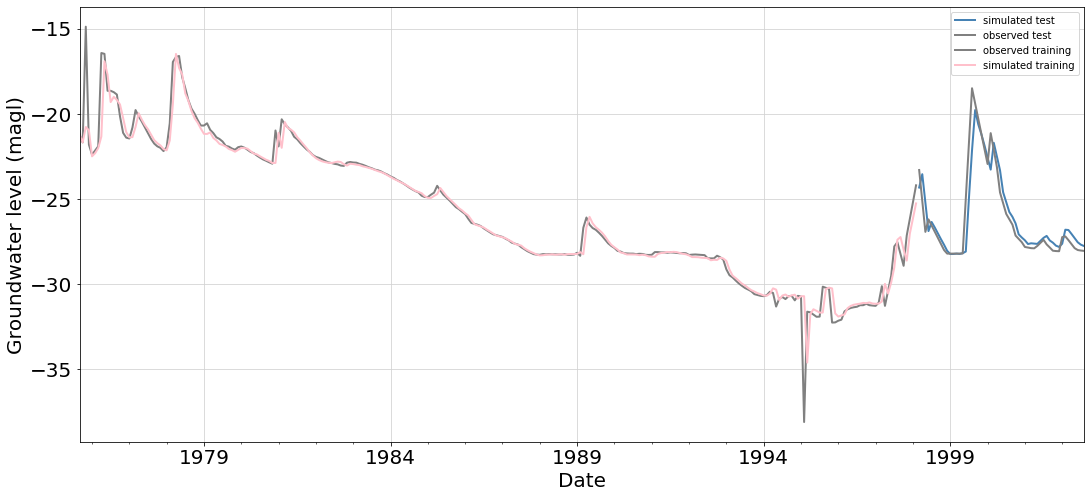

In [61]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [62]:
y_lstm = out_df['simulated test']

### GRU

In [63]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [64]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(54, 6)

    #running function
    gwl = 0.66154411
    test_forecast = X_test
    steps_ahead = 54
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 3s - loss: 1.8920 - mean_squared_error: 1.8920
Epoch 00001: val_loss improved from inf to 0.52187, saving model to model.h5
270/270 [==============================] - 4s 16ms/sample - loss: 1.5606 - mean_squared_error: 1.5606 - val_loss: 0.5219 - val_mean_squared_error: 0.5219
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.4133 - mean_squared_error: 1.4133
Epoch 00002: val_loss improved from 0.52187 to 0.48609, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 1.3284 - mean_squared_error: 1.3284 - val_loss: 0.4861 - val_mean_squared_error: 0.4861
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.3875 - mean_squared_error: 1.3875
Epoch 00003: val_loss improved from 0.48609 to 0.45749, saving model to model.h5
270/270 [==============================] - 0s 174us/sample 

Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 00025: val_loss improved from 0.20256 to 0.19894, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.1989 - val_mean_squared_error: 0.1989
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1389 - mean_squared_error: 0.1389
Epoch 00026: val_loss improved from 0.19894 to 0.19571, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1152 - mean_squared_error: 0.1152
Epoch 00027: val_loss improved from 0.19571 to 0.19305, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.193

Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00049: val_loss improved from 0.15598 to 0.15486, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1549 - val_mean_squared_error: 0.1549
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00050: val_loss improved from 0.15486 to 0.15429, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00051: val_loss improved from 0.15429 to 0.15329, saving model to model.h5
270/270 [==============================] - 0s 134us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.153

 96/270 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00073: val_loss improved from 0.14183 to 0.14132, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1413 - val_mean_squared_error: 0.1413
Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00074: val_loss improved from 0.14132 to 0.14104, saving model to model.h5
270/270 [==============================] - 0s 122us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 00075: val_loss improved from 0.14104 to 0.14061, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.1406 - val_mean_s

Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00098: val_loss improved from 0.13506 to 0.13498, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00099: val_loss improved from 0.13498 to 0.13433, saving model to model.h5
270/270 [==============================] - 0s 134us/sample - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 100/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00100: val_loss improved from 0.13433 to 0.13375, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.13

 96/270 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00123: val_loss did not improve from 0.13113
270/270 [==============================] - 0s 137us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00124: val_loss improved from 0.13113 to 0.13079, saving model to model.h5
270/270 [==============================] - 0s 216us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 125/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00125: val_loss did not improve from 0.13079
270/270 [==============================] - 0s 100us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 126/1000
 96/270 [=========>...

 96/270 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00148: val_loss did not improve from 0.12806
270/270 [==============================] - 0s 102us/sample - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 00149: val_loss improved from 0.12806 to 0.12776, saving model to model.h5
270/270 [==============================] - 0s 209us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.1278 - val_mean_squared_error: 0.1278
Epoch 150/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00150: val_loss improved from 0.12776 to 0.12647, saving model to model.h5
270/270 [==============================] - 0s 228us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 1

 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00173: val_loss did not improve from 0.12389
270/270 [==============================] - 0s 76us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00174: val_loss did not improve from 0.12389
270/270 [==============================] - 0s 73us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00175: val_loss did not improve from 0.12389
270/270 [==============================] - 0s 76us/sample - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 176/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00199: val_loss did not improve from 0.12332
270/270 [==============================] - 0s 83us/sample - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00200: val_loss did not improve from 0.12332
270/270 [==============================] - 0s 67us/sample - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 201/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00201: val_loss did not improve from 0.12332
270/270 [==============================] - 0s 66us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 202/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 00224: val_loss improved from 0.12127 to 0.12078, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00225: val_loss improved from 0.12078 to 0.12051, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 226/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00226: val_loss improved from 0.12051 to 0.12026, saving model to model.h5
270/270 [==============================] - 0s 217us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1203 - val_mean

Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00250: val_loss did not improve from 0.11977
270/270 [==============================] - 0s 71us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00251: val_loss did not improve from 0.11977
270/270 [==============================] - 0s 73us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 252/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00252: val_loss did not improve from 0.11977
270/270 [==============================] - 0s 73us/sample - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 253/1000
 96/270 [=========>....................]

Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00276: val_loss did not improve from 0.11775
270/270 [==============================] - 0s 71us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 277/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00277: val_loss did not improve from 0.11775
270/270 [==============================] - 0s 107us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 278/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00278: val_loss did not improve from 0.11775
270/270 [==============================] - 0s 91us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.1191 - val_mean_squared_error: 0.1191
Epoch 279/1000
 96/270 [=========>....................

Epoch 302/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00302: val_loss improved from 0.11605 to 0.11546, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.1155 - val_mean_squared_error: 0.1155
Epoch 303/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00303: val_loss did not improve from 0.11546
270/270 [==============================] - 0s 77us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 304/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00304: val_loss improved from 0.11546 to 0.11525, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1153 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00327: val_loss improved from 0.11284 to 0.11254, saving model to model.h5
270/270 [==============================] - 0s 171us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.1125 - val_mean_squared_error: 0.1125
Epoch 328/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00328: val_loss improved from 0.11254 to 0.11244, saving model to model.h5
270/270 [==============================] - 0s 193us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1124 - val_mean_squared_error: 0.1124
Epoch 329/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00329: val_loss improved from 0.11244 to 0.11218, saving model to model.h5
270/270 [==============================] - 0s 210us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1122 - val_mean

Epoch 353/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00353: val_loss did not improve from 0.11148
270/270 [==============================] - 0s 74us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.1133 - val_mean_squared_error: 0.1133
Epoch 354/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00354: val_loss did not improve from 0.11148
270/270 [==============================] - 0s 71us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1139 - val_mean_squared_error: 0.1139
Epoch 355/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00355: val_loss did not improve from 0.11148
270/270 [==============================] - 0s 72us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.1136 - val_mean_squared_error: 0.1136
Epoch 356/1000
 96/270 [=========>....................]

Epoch 379/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00379: val_loss improved from 0.10970 to 0.10916, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.1092 - val_mean_squared_error: 0.1092
Epoch 380/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00380: val_loss did not improve from 0.10916
270/270 [==============================] - 0s 84us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 381/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00381: val_loss did not improve from 0.10916
270/270 [==============================] - 0s 75us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 382/1000
 96/270 [

270/270 [==============================] - 0s 132us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 405/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00405: val_loss did not improve from 0.10729
270/270 [==============================] - 0s 71us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 406/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00406: val_loss did not improve from 0.10729
270/270 [==============================] - 0s 74us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 407/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00407: val_loss did not improve from 0.10729
270/270 [==============================] - 0s 71us/sam

Epoch 430/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00430: val_loss did not improve from 0.10575
270/270 [==============================] - 0s 74us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 431/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00431: val_loss improved from 0.10575 to 0.10575, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.1058 - val_mean_squared_error: 0.1058
Epoch 432/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00432: val_loss did not improve from 0.10575
270/270 [==============================] - 0s 75us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 433/1000
 96/270 [

Epoch 455/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00455: val_loss did not improve from 0.09990
270/270 [==============================] - 0s 88us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 456/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00456: val_loss did not improve from 0.09990
270/270 [==============================] - 0s 116us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.1023 - val_mean_squared_error: 0.1023
Epoch 457/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00457: val_loss did not improve from 0.09990
270/270 [==============================] - 0s 84us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 458/1000
 96/270 [=========>....................

Epoch 481/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00481: val_loss improved from 0.09950 to 0.09943, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0994 - val_mean_squared_error: 0.0994
Epoch 482/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00482: val_loss improved from 0.09943 to 0.09941, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0994 - val_mean_squared_error: 0.0994
Epoch 483/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 00483: val_loss improved from 0.09941 to 0.09925, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.

Epoch 506/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00506: val_loss did not improve from 0.09559
270/270 [==============================] - 0s 84us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 507/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00507: val_loss did not improve from 0.09559
270/270 [==============================] - 0s 164us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 508/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00508: val_loss did not improve from 0.09559
270/270 [==============================] - 0s 107us/sample - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 509/1000
 96/270 [=========>...................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00531: val_loss improved from 0.09379 to 0.09276, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 532/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00532: val_loss did not improve from 0.09276
270/270 [==============================] - 0s 94us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 533/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00533: val_loss did not improve from 0.09276
270/270 [==============================] - 0s 92us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 534/1000
 96/270 [=========>.....

Epoch 557/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00557: val_loss did not improve from 0.09265
270/270 [==============================] - 0s 74us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0929 - val_mean_squared_error: 0.0929
Epoch 558/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00558: val_loss improved from 0.09265 to 0.09252, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 559/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00559: val_loss improved from 0.09252 to 0.09221, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0922 - val_mean_squared_error: 

Epoch 582/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00582: val_loss did not improve from 0.08977
270/270 [==============================] - 0s 141us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 583/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00583: val_loss did not improve from 0.08977
270/270 [==============================] - 0s 97us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 584/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00584: val_loss did not improve from 0.08977
270/270 [==============================] - 0s 114us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0900 - val_mean_squared_error: 0.0900
Epoch 585/1000
 96/270 [=========>...................

Epoch 607/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00607: val_loss improved from 0.08734 to 0.08678, saving model to model.h5
270/270 [==============================] - 0s 267us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0868 - val_mean_squared_error: 0.0868
Epoch 608/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00608: val_loss did not improve from 0.08678
270/270 [==============================] - 0s 152us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 609/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00609: val_loss did not improve from 0.08678
270/270 [==============================] - 0s 154us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 610/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00632: val_loss did not improve from 0.08525
270/270 [==============================] - 0s 117us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 633/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00633: val_loss did not improve from 0.08525
270/270 [==============================] - 0s 137us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 634/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00634: val_loss did not improve from 0.08525
270/270 [==============================] - 0s 106us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 635/1000
 96/270 [=========>....................] - ETA: 0s -

 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00657: val_loss did not improve from 0.08301
270/270 [==============================] - 0s 95us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 658/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00658: val_loss did not improve from 0.08301
270/270 [==============================] - 0s 97us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 659/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00659: val_loss improved from 0.08301 to 0.08266, saving model to model.h5
270/270 [==============================] - 0s 291us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 660/1000
 96/270 [=========>.....

 96/270 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00682: val_loss improved from 0.08081 to 0.08067, saving model to model.h5
270/270 [==============================] - 0s 239us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 683/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00683: val_loss did not improve from 0.08067
270/270 [==============================] - 0s 173us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 684/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00684: val_loss did not improve from 0.08067
270/270 [==============================] - 0s 121us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 685/1000
 96/270 [=========>...

 96/270 [=========>....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00707: val_loss improved from 0.07957 to 0.07952, saving model to model.h5
270/270 [==============================] - 0s 273us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0795 - val_mean_squared_error: 0.0795
Epoch 708/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00708: val_loss did not improve from 0.07952
270/270 [==============================] - 0s 112us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 709/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00709: val_loss did not improve from 0.07952
270/270 [==============================] - 0s 128us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0801 - val_mean_squared_error: 0.0801
Epoch 710/1000
 96/270 [=========>...

 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00732: val_loss did not improve from 0.07772
270/270 [==============================] - 0s 285us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 733/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00733: val_loss did not improve from 0.07772
270/270 [==============================] - 0s 136us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 734/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00734: val_loss did not improve from 0.07772
270/270 [==============================] - 0s 122us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 735/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 758/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0784 - mean_squared_error: 0.0784
Epoch 00758: val_loss improved from 0.07735 to 0.07717, saving model to model.h5
270/270 [==============================] - 0s 282us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 759/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00759: val_loss did not improve from 0.07717
270/270 [==============================] - 0s 121us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 760/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0810 - mean_squared_error: 0.0810
Epoch 00760: val_loss did not improve from 0.07717
270/270 [==============================] - 0s 111us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0775 - val_mean_squared_error: 0.0775
Epoch 761/1000
 96/270

Epoch 783/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00783: val_loss did not improve from 0.07548
270/270 [==============================] - 0s 92us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0756 - val_mean_squared_error: 0.0756
Epoch 784/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00784: val_loss did not improve from 0.07548
270/270 [==============================] - 0s 112us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0762 - val_mean_squared_error: 0.0762
Epoch 785/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00785: val_loss did not improve from 0.07548
270/270 [==============================] - 0s 189us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 786/1000
 96/270 [=========>...................

Epoch 809/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00809: val_loss improved from 0.07499 to 0.07493, saving model to model.h5
270/270 [==============================] - 0s 183us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 810/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00810: val_loss did not improve from 0.07493
270/270 [==============================] - 0s 95us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0752 - val_mean_squared_error: 0.0752
Epoch 811/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00811: val_loss did not improve from 0.07493
270/270 [==============================] - 0s 169us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0755 - val_mean_squared_error: 0.0755
Epoch 812/1000
 96/270 

Epoch 834/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00834: val_loss did not improve from 0.07405
270/270 [==============================] - 0s 103us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 835/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00835: val_loss did not improve from 0.07405
270/270 [==============================] - 0s 103us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0742 - val_mean_squared_error: 0.0742
Epoch 836/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00836: val_loss did not improve from 0.07405
270/270 [==============================] - 0s 127us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0742 - val_mean_squared_error: 0.0742
Epoch 837/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00859: val_loss did not improve from 0.07345
270/270 [==============================] - 0s 88us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0735 - val_mean_squared_error: 0.0735
Epoch 860/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00860: val_loss did not improve from 0.07345
270/270 [==============================] - 0s 82us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 861/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00861: val_loss did not improve from 0.07345
270/270 [==============================] - 0s 75us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0736 - val_mean_squared_error: 0.0736
Epoch 862/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 885/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00885: val_loss did not improve from 0.07281
270/270 [==============================] - 0s 76us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 886/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00886: val_loss improved from 0.07281 to 0.07251, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 887/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00887: val_loss did not improve from 0.07251
270/270 [==============================] - 0s 145us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch 888/1000
 96/270 

Epoch 911/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00911: val_loss did not improve from 0.07222
270/270 [==============================] - 0s 92us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch 912/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00912: val_loss did not improve from 0.07222
270/270 [==============================] - 0s 82us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 913/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00913: val_loss improved from 0.07222 to 0.07204, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0720 - val_mean_squared_error: 0.0720
Epoch 914/1000
 96/270 [

Epoch 937/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00937: val_loss did not improve from 0.07195
270/270 [==============================] - 0s 75us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 938/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00938: val_loss did not improve from 0.07195
270/270 [==============================] - 0s 74us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0720 - val_mean_squared_error: 0.0720
Epoch 939/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00939: val_loss did not improve from 0.07195
270/270 [==============================] - 0s 73us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 940/1000
 96/270 [=========>....................]

Epoch 963/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00963: val_loss did not improve from 0.07159
270/270 [==============================] - 0s 98us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 964/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00964: val_loss did not improve from 0.07159
270/270 [==============================] - 0s 130us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 965/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00965: val_loss did not improve from 0.07159
270/270 [==============================] - 0s 147us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 966/1000
 96/270 [=========>...................

Epoch 989/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00989: val_loss did not improve from 0.07159
270/270 [==============================] - 0s 101us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 990/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00990: val_loss did not improve from 0.07159
270/270 [==============================] - 0s 71us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 991/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00991: val_loss did not improve from 0.07159
270/270 [==============================] - 0s 76us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 992/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00014: val_loss did not improve from 0.31708
270/270 [==============================] - 0s 77us/sample - loss: 0.1486 - mean_squared_error: 0.1486 - val_loss: 0.3412 - val_mean_squared_error: 0.3412
Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00015: val_loss did not improve from 0.31708
270/270 [==============================] - 0s 87us/sample - loss: 0.1426 - mean_squared_error: 0.1426 - val_loss: 0.3479 - val_mean_squared_error: 0.3479
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 00016: val_loss did not improve from 0.31708
270/270 [==============================] - 0s 99us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.3545 - val_mean_squared_error: 0.3545
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss:

Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00040: val_loss improved from 0.31600 to 0.31103, saving model to model.h5
270/270 [==============================] - 0s 175us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 41/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00041: val_loss improved from 0.31103 to 0.30791, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.3079 - val_mean_squared_error: 0.3079
Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00042: val_loss improved from 0.30791 to 0.30355, saving model to model.h5
270/270 [==============================] - 0s 193us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.303

 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00064: val_loss improved from 0.23390 to 0.23193, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00065: val_loss did not improve from 0.23193
270/270 [==============================] - 0s 119us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.2329 - val_mean_squared_error: 0.2329
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00066: val_loss did not improve from 0.23193
270/270 [==============================] - 0s 98us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.2348 - val_mean_squared_error: 0.2348
Epoch 67/1000
 96/270 [=========>.......

270/270 [==============================] - 0s 219us/sample - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.1831 - val_mean_squared_error: 0.1831
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00089: val_loss improved from 0.18313 to 0.18135, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1813 - val_mean_squared_error: 0.1813
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00090: val_loss improved from 0.18135 to 0.17956, saving model to model.h5
270/270 [==============================] - 0s 181us/sample - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.1796 - val_mean_squared_error: 0.1796
Epoch 91/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00091: val_loss did not improve from 0.1

Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00113: val_loss improved from 0.15683 to 0.15648, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00114: val_loss did not improve from 0.15648
270/270 [==============================] - 0s 132us/sample - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00115: val_loss did not improve from 0.15648
270/270 [==============================] - 0s 138us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 116/1000
 96/270

Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00138: val_loss improved from 0.14060 to 0.14052, saving model to model.h5
270/270 [==============================] - 0s 268us/sample - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 00139: val_loss improved from 0.14052 to 0.13987, saving model to model.h5
270/270 [==============================] - 0s 218us/sample - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.1399 - val_mean_squared_error: 0.1399
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00140: val_loss improved from 0.13987 to 0.13891, saving model to model.h5
270/270 [==============================] - 0s 256us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 00163: val_loss did not improve from 0.13316
270/270 [==============================] - 0s 107us/sample - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00164: val_loss improved from 0.13316 to 0.13283, saving model to model.h5
270/270 [==============================] - 0s 217us/sample - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00165: val_loss improved from 0.13283 to 0.13135, saving model to model.h5
270/270 [==============================] - 0s 615us/sample - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 1

Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00188: val_loss did not improve from 0.12244
270/270 [==============================] - 0s 135us/sample - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00189: val_loss did not improve from 0.12244
270/270 [==============================] - 0s 144us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00190: val_loss improved from 0.12244 to 0.12176, saving model to model.h5
270/270 [==============================] - 0s 166us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 191/1000
 96/270

Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00213: val_loss did not improve from 0.11313
270/270 [==============================] - 0s 119us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.1138 - val_mean_squared_error: 0.1138
Epoch 214/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 00214: val_loss improved from 0.11313 to 0.11215, saving model to model.h5
270/270 [==============================] - 0s 312us/sample - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.1122 - val_mean_squared_error: 0.1122
Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00215: val_loss did not improve from 0.11215
270/270 [==============================] - 0s 168us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.1124 - val_mean_squared_error: 0.1124
Epoch 216/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00238: val_loss improved from 0.10808 to 0.10747, saving model to model.h5
270/270 [==============================] - 0s 203us/sample - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.1075 - val_mean_squared_error: 0.1075
Epoch 239/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00239: val_loss improved from 0.10747 to 0.10578, saving model to model.h5
270/270 [==============================] - 0s 211us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1058 - val_mean_squared_error: 0.1058
Epoch 240/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00240: val_loss did not improve from 0.10578
270/270 [==============================] - 0s 90us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.1068 - val_mean_squared_error: 0.1068
Epoch 24

 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00263: val_loss did not improve from 0.10294
270/270 [==============================] - 0s 79us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 264/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 00264: val_loss did not improve from 0.10294
270/270 [==============================] - 0s 79us/sample - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 265/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 00265: val_loss improved from 0.10294 to 0.10280, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 266/1000
 96/270 [=========>.....

Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00288: val_loss did not improve from 0.09622
270/270 [==============================] - 0s 90us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0966 - val_mean_squared_error: 0.0966
Epoch 289/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00289: val_loss did not improve from 0.09622
270/270 [==============================] - 0s 105us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 290/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0893 - mean_squared_error: 0.0893
Epoch 00290: val_loss did not improve from 0.09622
270/270 [==============================] - 0s 157us/sample - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.0966 - val_mean_squared_error: 0.0966
Epoch 291/1000
 96/270 [=========>...................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00313: val_loss improved from 0.09243 to 0.09083, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 314/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00314: val_loss improved from 0.09083 to 0.09071, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0907 - val_mean_squared_error: 0.0907
Epoch 315/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00315: val_loss improved from 0.09071 to 0.09013, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0901 - val_mean

 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00338: val_loss improved from 0.08692 to 0.08665, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00339: val_loss improved from 0.08665 to 0.08594, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 340/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00340: val_loss improved from 0.08594 to 0.08548, saving model to model.h5
270/270 [==============================] - 0s 226us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0855 - val_mean

Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00363: val_loss did not improve from 0.08200
270/270 [==============================] - 0s 70us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0822 - val_mean_squared_error: 0.0822
Epoch 364/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00364: val_loss did not improve from 0.08200
270/270 [==============================] - 0s 70us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 365/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00365: val_loss did not improve from 0.08200
270/270 [==============================] - 0s 69us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0822 - val_mean_squared_error: 0.0822
Epoch 366/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00388: val_loss improved from 0.07938 to 0.07908, saving model to model.h5
270/270 [==============================] - 0s 204us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00389: val_loss did not improve from 0.07908
270/270 [==============================] - 0s 105us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 390/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00390: val_loss improved from 0.07908 to 0.07853, saving model to model.h5
270/270 [==============================] - 0s 174us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 3

 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00413: val_loss did not improve from 0.07667
270/270 [==============================] - 0s 92us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0768 - val_mean_squared_error: 0.0768
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0613 - mean_squared_error: 0.0613
Epoch 00414: val_loss improved from 0.07667 to 0.07637, saving model to model.h5
270/270 [==============================] - 0s 166us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 415/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00415: val_loss improved from 0.07637 to 0.07613, saving model to model.h5
270/270 [==============================] - 0s 148us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 41

Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00439: val_loss did not improve from 0.07393
270/270 [==============================] - 0s 72us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0748 - val_mean_squared_error: 0.0748
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00440: val_loss did not improve from 0.07393
270/270 [==============================] - 0s 70us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 441/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00441: val_loss did not improve from 0.07393
270/270 [==============================] - 0s 83us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 442/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00464: val_loss improved from 0.07168 to 0.07145, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0714 - val_mean_squared_error: 0.0714
Epoch 465/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00465: val_loss improved from 0.07145 to 0.07090, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0709 - val_mean_squared_error: 0.0709
Epoch 466/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00466: val_loss improved from 0.07090 to 0.07050, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0705 - val_mean

Epoch 490/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00490: val_loss did not improve from 0.06929
270/270 [==============================] - 0s 74us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0702 - val_mean_squared_error: 0.0702
Epoch 491/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00491: val_loss did not improve from 0.06929
270/270 [==============================] - 0s 74us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 492/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00492: val_loss did not improve from 0.06929
270/270 [==============================] - 0s 74us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0703 - val_mean_squared_error: 0.0703
Epoch 493/1000
 96/270 [=========>....................]

270/270 [==============================] - 0s 172us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0679 - val_mean_squared_error: 0.0679
Epoch 516/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 00516: val_loss did not improve from 0.06794
270/270 [==============================] - 0s 76us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 517/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00517: val_loss did not improve from 0.06794
270/270 [==============================] - 0s 75us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 518/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00518: val_loss did not improve from 0.06794
270/270 [==============================] - 0s 74us/sam

 96/270 [=========>....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00541: val_loss did not improve from 0.06685
270/270 [==============================] - 0s 75us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0672 - val_mean_squared_error: 0.0672
Epoch 542/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00542: val_loss did not improve from 0.06685
270/270 [==============================] - 0s 80us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0672 - val_mean_squared_error: 0.0672
Epoch 543/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00543: val_loss did not improve from 0.06685
270/270 [==============================] - 0s 90us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 544/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 567/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00567: val_loss did not improve from 0.06630
270/270 [==============================] - 0s 80us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0668 - val_mean_squared_error: 0.0668
Epoch 568/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00568: val_loss did not improve from 0.06630
270/270 [==============================] - 0s 93us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 569/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00569: val_loss did not improve from 0.06630
270/270 [==============================] - 0s 186us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0672 - val_mean_squared_error: 0.0672
Epoch 570/1000
 96/270 [=========>....................

Epoch 593/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00593: val_loss did not improve from 0.06546
270/270 [==============================] - 0s 87us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0668 - val_mean_squared_error: 0.0668
Epoch 594/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00594: val_loss did not improve from 0.06546
270/270 [==============================] - 0s 99us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 595/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00595: val_loss did not improve from 0.06546
270/270 [==============================] - 0s 99us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 596/1000
 96/270 [=========>....................]

Epoch 619/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00619: val_loss did not improve from 0.06538
270/270 [==============================] - 0s 114us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 620/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00620: val_loss improved from 0.06538 to 0.06521, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0652 - val_mean_squared_error: 0.0652
Epoch 621/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00621: val_loss did not improve from 0.06521
270/270 [==============================] - 0s 71us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 622/1000
 96/270 

Epoch 645/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00645: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 105us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0655 - val_mean_squared_error: 0.0655
Epoch 646/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00646: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 94us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0660 - val_mean_squared_error: 0.0660
Epoch 647/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00647: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 90us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 648/1000
 96/270 [=========>....................

Epoch 671/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00671: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 119us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 672/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00672: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 116us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0660 - val_mean_squared_error: 0.0660
Epoch 673/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00673: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 104us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0661 - val_mean_squared_error: 0.0661
Epoch 674/1000
 96/270 [=========>..................

Epoch 697/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00697: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 80us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0668 - val_mean_squared_error: 0.0668
Epoch 698/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00698: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 106us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 699/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00699: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 74us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0666 - val_mean_squared_error: 0.0666
Epoch 700/1000
 96/270 [=========>....................

Epoch 723/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00723: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 89us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 724/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00724: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 87us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0680 - val_mean_squared_error: 0.0680
Epoch 725/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00725: val_loss did not improve from 0.06517
270/270 [==============================] - 0s 98us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 726/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.3835 - mean_squared_error: 0.3835
Epoch 00019: val_loss improved from 0.31795 to 0.31169, saving model to model.h5
270/270 [==============================] - 0s 123us/sample - loss: 0.3429 - mean_squared_error: 0.3429 - val_loss: 0.3117 - val_mean_squared_error: 0.3117
Epoch 20/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3364 - mean_squared_error: 0.3364
Epoch 00020: val_loss improved from 0.31169 to 0.30577, saving model to model.h5
270/270 [==============================] - 0s 120us/sample - loss: 0.3023 - mean_squared_error: 0.3023 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 21/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3549 - mean_squared_error: 0.3549
Epoch 00021: val_loss improved from 0.30577 to 0.30024, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.2852 - mean_squared_error: 0.2852 - val_loss: 0.3002 - val_mean_s

Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1062 - mean_squared_error: 0.1062
Epoch 00043: val_loss improved from 0.25490 to 0.25448, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.2545 - val_mean_squared_error: 0.2545
Epoch 44/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00044: val_loss improved from 0.25448 to 0.25239, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.2524 - val_mean_squared_error: 0.2524
Epoch 45/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00045: val_loss improved from 0.25239 to 0.25158, saving model to model.h5
270/270 [==============================] - 0s 119us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.251

 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00067: val_loss did not improve from 0.20840
270/270 [==============================] - 0s 77us/sample - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 68/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 00068: val_loss improved from 0.20840 to 0.20616, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 69/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00069: val_loss did not improve from 0.20616
270/270 [==============================] - 0s 72us/sample - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.2063 - val_mean_squared_error: 0.2063
Epoch 70/1000
 96/270 [=========>........

 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00092: val_loss improved from 0.18727 to 0.18605, saving model to model.h5
270/270 [==============================] - 0s 187us/sample - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.1860 - val_mean_squared_error: 0.1860
Epoch 93/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00093: val_loss did not improve from 0.18605
270/270 [==============================] - 0s 93us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.1865 - val_mean_squared_error: 0.1865
Epoch 94/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00094: val_loss improved from 0.18605 to 0.18423, saving model to model.h5
270/270 [==============================] - 0s 186us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 95/1

Epoch 117/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00117: val_loss did not improve from 0.17041
270/270 [==============================] - 0s 80us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.1711 - val_mean_squared_error: 0.1711
Epoch 118/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00118: val_loss did not improve from 0.17041
270/270 [==============================] - 0s 100us/sample - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.1724 - val_mean_squared_error: 0.1724
Epoch 119/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00119: val_loss did not improve from 0.17041
270/270 [==============================] - 0s 246us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.1713 - val_mean_squared_error: 0.1713
Epoch 120/1000
 96/270 [=========>...................

Epoch 142/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00142: val_loss did not improve from 0.16211
270/270 [==============================] - 0s 115us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.1632 - val_mean_squared_error: 0.1632
Epoch 143/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00143: val_loss improved from 0.16211 to 0.16122, saving model to model.h5
270/270 [==============================] - 0s 163us/sample - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.1612 - val_mean_squared_error: 0.1612
Epoch 144/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00144: val_loss improved from 0.16122 to 0.16055, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.1605 - val_mean_squared_error:

Epoch 167/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00167: val_loss improved from 0.15206 to 0.15116, saving model to model.h5
270/270 [==============================] - 0s 165us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.1512 - val_mean_squared_error: 0.1512
Epoch 168/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00168: val_loss improved from 0.15116 to 0.15092, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.1509 - val_mean_squared_error: 0.1509
Epoch 169/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00169: val_loss improved from 0.15092 to 0.14984, saving model to model.h5
270/270 [==============================] - 0s 156us/sample - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.

Epoch 192/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00192: val_loss did not improve from 0.14137
270/270 [==============================] - 0s 82us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 193/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00193: val_loss improved from 0.14137 to 0.14100, saving model to model.h5
270/270 [==============================] - 0s 175us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 194/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00194: val_loss did not improve from 0.14100
270/270 [==============================] - 0s 80us/sample - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 195/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00217: val_loss did not improve from 0.13385
270/270 [==============================] - 0s 72us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 218/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00218: val_loss did not improve from 0.13385
270/270 [==============================] - 0s 75us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 219/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00219: val_loss improved from 0.13385 to 0.13331, saving model to model.h5
270/270 [==============================] - 0s 126us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1333 - val_mean_squared_error: 0.1333
Epoch 220/1000
 96/270 [=========>.....

Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00242: val_loss did not improve from 0.12776
270/270 [==============================] - 0s 112us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00243: val_loss did not improve from 0.12776
270/270 [==============================] - 0s 78us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 244/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00244: val_loss did not improve from 0.12776
270/270 [==============================] - 0s 78us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 245/1000
 96/270 [=========>....................

Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00267: val_loss did not improve from 0.12388
270/270 [==============================] - 0s 101us/sample - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00268: val_loss did not improve from 0.12388
270/270 [==============================] - 0s 85us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.1242 - val_mean_squared_error: 0.1242
Epoch 269/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00269: val_loss did not improve from 0.12388
270/270 [==============================] - 0s 126us/sample - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 270/1000
 96/270 [=========>...................

Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00292: val_loss did not improve from 0.11882
270/270 [==============================] - 0s 88us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.1188 - val_mean_squared_error: 0.1188
Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00293: val_loss did not improve from 0.11882
270/270 [==============================] - 0s 82us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 294/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00294: val_loss did not improve from 0.11882
270/270 [==============================] - 0s 86us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1199 - val_mean_squared_error: 0.1199
Epoch 295/1000
 96/270 [=========>....................]

Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00318: val_loss improved from 0.11740 to 0.11735, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00319: val_loss did not improve from 0.11735
270/270 [==============================] - 0s 71us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 320/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00320: val_loss improved from 0.11735 to 0.11698, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1170 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00343: val_loss did not improve from 0.11484
270/270 [==============================] - 0s 86us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 344/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00344: val_loss did not improve from 0.11484
270/270 [==============================] - 0s 114us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 345/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00345: val_loss did not improve from 0.11484
270/270 [==============================] - 0s 80us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1149 - val_mean_squared_error: 0.1149
Epoch 346/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00368: val_loss improved from 0.11078 to 0.11044, saving model to model.h5
270/270 [==============================] - 0s 231us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 369/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0743 - mean_squared_error: 0.0743
Epoch 00369: val_loss did not improve from 0.11044
270/270 [==============================] - 0s 92us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 370/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 00370: val_loss did not improve from 0.11044
270/270 [==============================] - 0s 124us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 371/1000
 96/270 [=========>....

270/270 [==============================] - 0s 157us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 394/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00394: val_loss improved from 0.10849 to 0.10841, saving model to model.h5
270/270 [==============================] - 0s 219us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.1084 - val_mean_squared_error: 0.1084
Epoch 395/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00395: val_loss improved from 0.10841 to 0.10759, saving model to model.h5
270/270 [==============================] - 0s 216us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.1076 - val_mean_squared_error: 0.1076
Epoch 396/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00396: val_loss improved from 0.10759

 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00418: val_loss did not improve from 0.10448
270/270 [==============================] - 0s 155us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 419/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00419: val_loss did not improve from 0.10448
270/270 [==============================] - 0s 117us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 420/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00420: val_loss did not improve from 0.10448
270/270 [==============================] - 0s 124us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 421/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 444/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00444: val_loss did not improve from 0.10273
270/270 [==============================] - 0s 89us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 445/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00445: val_loss did not improve from 0.10273
270/270 [==============================] - 0s 93us/sample - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 446/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00446: val_loss did not improve from 0.10273
270/270 [==============================] - 0s 138us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.1029 - val_mean_squared_error: 0.1029
Epoch 447/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00469: val_loss improved from 0.09928 to 0.09921, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 470/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00470: val_loss improved from 0.09921 to 0.09876, saving model to model.h5
270/270 [==============================] - 0s 237us/sample - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 471/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00471: val_loss did not improve from 0.09876
270/270 [==============================] - 0s 93us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 47

Epoch 495/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00495: val_loss improved from 0.09811 to 0.09748, saving model to model.h5
270/270 [==============================] - 0s 216us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 496/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 00496: val_loss did not improve from 0.09748
270/270 [==============================] - 0s 148us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 497/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00497: val_loss did not improve from 0.09748
270/270 [==============================] - 0s 120us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 498/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00520: val_loss improved from 0.09580 to 0.09576, saving model to model.h5
270/270 [==============================] - 0s 219us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 521/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00521: val_loss did not improve from 0.09576
270/270 [==============================] - 0s 103us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 522/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00522: val_loss did not improve from 0.09576
270/270 [==============================] - 0s 115us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 523/1000
 96/270 [=========>...

Epoch 546/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00546: val_loss improved from 0.09371 to 0.09370, saving model to model.h5
270/270 [==============================] - 0s 234us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 547/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00547: val_loss improved from 0.09370 to 0.09367, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 548/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00548: val_loss did not improve from 0.09367
270/270 [==============================] - 0s 81us/sample - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0940 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00571: val_loss did not improve from 0.09201
270/270 [==============================] - 0s 98us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0924 - val_mean_squared_error: 0.0924
Epoch 572/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00572: val_loss improved from 0.09201 to 0.09177, saving model to model.h5
270/270 [==============================] - 0s 195us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0918 - val_mean_squared_error: 0.0918
Epoch 573/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00573: val_loss did not improve from 0.09177
270/270 [==============================] - 0s 115us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 574/1000
 96/270 [=========>....

 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00596: val_loss did not improve from 0.09002
270/270 [==============================] - 0s 101us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 597/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00597: val_loss did not improve from 0.09002
270/270 [==============================] - 0s 116us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 598/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00598: val_loss did not improve from 0.09002
270/270 [==============================] - 0s 214us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 599/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 622/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00622: val_loss did not improve from 0.08901
270/270 [==============================] - 0s 99us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0892 - val_mean_squared_error: 0.0892
Epoch 623/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00623: val_loss did not improve from 0.08901
270/270 [==============================] - 0s 94us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 624/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00624: val_loss improved from 0.08901 to 0.08898, saving model to model.h5
270/270 [==============================] - 0s 176us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 625/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00647: val_loss improved from 0.08780 to 0.08741, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 648/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00648: val_loss improved from 0.08741 to 0.08710, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 649/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00649: val_loss did not improve from 0.08710
270/270 [==============================] - 0s 78us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 65

 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00672: val_loss did not improve from 0.08562
270/270 [==============================] - 0s 78us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0862 - val_mean_squared_error: 0.0862
Epoch 673/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00673: val_loss did not improve from 0.08562
270/270 [==============================] - 0s 82us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0860 - val_mean_squared_error: 0.0860
Epoch 674/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00674: val_loss did not improve from 0.08562
270/270 [==============================] - 0s 80us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0860 - val_mean_squared_error: 0.0860
Epoch 675/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00697: val_loss improved from 0.08433 to 0.08413, saving model to model.h5
270/270 [==============================] - 0s 124us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0841 - val_mean_squared_error: 0.0841
Epoch 698/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00698: val_loss did not improve from 0.08413
270/270 [==============================] - 0s 82us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 699/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00699: val_loss did not improve from 0.08413
270/270 [==============================] - 0s 84us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 700/1000
 96/270 [=========>.....

Epoch 723/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00723: val_loss did not improve from 0.08387
270/270 [==============================] - 0s 70us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 724/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00724: val_loss did not improve from 0.08387
270/270 [==============================] - 0s 71us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0852 - val_mean_squared_error: 0.0852
Epoch 725/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00725: val_loss did not improve from 0.08387
270/270 [==============================] - 0s 67us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 726/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00749: val_loss did not improve from 0.08387
270/270 [==============================] - 0s 73us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 750/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00750: val_loss improved from 0.08387 to 0.08386, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 751/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00751: val_loss improved from 0.08386 to 0.08369, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 75

Epoch 775/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00775: val_loss did not improve from 0.08355
270/270 [==============================] - 0s 76us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0845 - val_mean_squared_error: 0.0845
Epoch 776/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00776: val_loss did not improve from 0.08355
270/270 [==============================] - 0s 73us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 777/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00777: val_loss did not improve from 0.08355
270/270 [==============================] - 0s 80us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 778/1000
 96/270 [=========>....................]

Epoch 801/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00801: val_loss did not improve from 0.08349
270/270 [==============================] - 0s 109us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 802/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00802: val_loss did not improve from 0.08349
270/270 [==============================] - 0s 85us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0843 - val_mean_squared_error: 0.0843
Epoch 803/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00803: val_loss did not improve from 0.08349
270/270 [==============================] - 0s 80us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 804/1000
 96/270 [=========>....................

Epoch 827/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00827: val_loss did not improve from 0.08340
270/270 [==============================] - 0s 97us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.0849 - val_mean_squared_error: 0.0849
Epoch 828/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 00828: val_loss did not improve from 0.08340
270/270 [==============================] - 0s 115us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0851 - val_mean_squared_error: 0.0851
Epoch 829/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00829: val_loss did not improve from 0.08340
270/270 [==============================] - 0s 125us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0842 - val_mean_squared_error: 0.0842
Epoch 830/1000
 96/270 [=========>...................

Epoch 853/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00853: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 74us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 854/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00854: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 77us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 855/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00855: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 102us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 856/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00879: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 83us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 880/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00880: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 86us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0842 - val_mean_squared_error: 0.0842
Epoch 881/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00881: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 91us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 882/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00905: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 76us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 906/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00906: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 75us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 907/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00907: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 85us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0850 - val_mean_squared_error: 0.0850
Epoch 908/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00931: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 86us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0867 - val_mean_squared_error: 0.0867
Epoch 932/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00932: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 76us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0880 - val_mean_squared_error: 0.0880
Epoch 933/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00933: val_loss did not improve from 0.08317
270/270 [==============================] - 0s 71us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 934/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 23/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00023: val_loss did not improve from 0.22772
270/270 [==============================] - 0s 78us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00024: val_loss did not improve from 0.22772
270/270 [==============================] - 0s 78us/sample - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00025: val_loss did not improve from 0.22772
270/270 [==============================] - 0s 79us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.2753 - val_mean_squared_error: 0.2753
Epoch 26/1000
 96/270 [=========>....................] - E

270/270 [==============================] - 0s 159us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 00049: val_loss improved from 0.20749 to 0.20570, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.2057 - val_mean_squared_error: 0.2057
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00050: val_loss did not improve from 0.20570
270/270 [==============================] - 0s 99us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 51/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00051: val_loss improved from 0.20570 to 0.20507, saving model to model

Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 00073: val_loss improved from 0.15717 to 0.15304, saving model to model.h5
270/270 [==============================] - 0s 178us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00074: val_loss improved from 0.15304 to 0.15254, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 75/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00075: val_loss improved from 0.15254 to 0.15203, saving model to model.h5
270/270 [==============================] - 0s 169us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.152

270/270 [==============================] - 0s 152us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.1342 - val_mean_squared_error: 0.1342
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00098: val_loss improved from 0.13422 to 0.13347, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00099: val_loss improved from 0.13347 to 0.13258, saving model to model.h5
270/270 [==============================] - 0s 443us/sample - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 100/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00100: val_loss did not improve from 0.

Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00122: val_loss did not improve from 0.12173
270/270 [==============================] - 0s 147us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 00123: val_loss improved from 0.12173 to 0.12124, saving model to model.h5
270/270 [==============================] - 0s 193us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00124: val_loss did not improve from 0.12124
270/270 [==============================] - 0s 104us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 125/1000
 96/270

Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00147: val_loss did not improve from 0.11447
270/270 [==============================] - 0s 130us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1149 - val_mean_squared_error: 0.1149
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00148: val_loss did not improve from 0.11447
270/270 [==============================] - 0s 99us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.1147 - val_mean_squared_error: 0.1147
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00149: val_loss improved from 0.11447 to 0.11348, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1135 - val_mean_squared_error: 0.1135
Epoch 150/1000
 96/270 

Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 00173: val_loss improved from 0.11038 to 0.10965, saving model to model.h5
270/270 [==============================] - 0s 194us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00174: val_loss improved from 0.10965 to 0.10941, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00175: val_loss improved from 0.10941 to 0.10889, saving model to model.h5
270/270 [==============================] - 0s 178us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00197: val_loss did not improve from 0.10312
270/270 [==============================] - 0s 112us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00198: val_loss improved from 0.10312 to 0.10250, saving model to model.h5
270/270 [==============================] - 0s 204us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00199: val_loss did not improve from 0.10250
270/270 [==============================] - 0s 384us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 200/1000
 96/270 [=========>...

 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00222: val_loss improved from 0.09929 to 0.09917, saving model to model.h5
270/270 [==============================] - 0s 309us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00223: val_loss did not improve from 0.09917
270/270 [==============================] - 0s 134us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 224/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00224: val_loss did not improve from 0.09917
270/270 [==============================] - 0s 360us/sample - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 225/1000
 96/270 [=========>...

Epoch 247/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00247: val_loss improved from 0.09618 to 0.09553, saving model to model.h5
270/270 [==============================] - 0s 328us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 248/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00248: val_loss did not improve from 0.09553
270/270 [==============================] - 0s 125us/sample - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00249: val_loss did not improve from 0.09553
270/270 [==============================] - 0s 110us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 250/1000
 96/270

Epoch 272/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00272: val_loss did not improve from 0.09259
270/270 [==============================] - 0s 215us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0931 - val_mean_squared_error: 0.0931
Epoch 273/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00273: val_loss did not improve from 0.09259
270/270 [==============================] - 0s 317us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00274: val_loss did not improve from 0.09259
270/270 [==============================] - 0s 198us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0932 - val_mean_squared_error: 0.0932
Epoch 275/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00297: val_loss did not improve from 0.09126
270/270 [==============================] - 0s 105us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0919 - val_mean_squared_error: 0.0919
Epoch 298/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00298: val_loss improved from 0.09126 to 0.09106, saving model to model.h5
270/270 [==============================] - 0s 177us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 299/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00299: val_loss did not improve from 0.09106
270/270 [==============================] - 0s 93us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 300/1000
 96/270 [=========>....

 96/270 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00322: val_loss did not improve from 0.08990
270/270 [==============================] - 0s 110us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 323/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00323: val_loss did not improve from 0.08990
270/270 [==============================] - 0s 126us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 324/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00324: val_loss did not improve from 0.08990
270/270 [==============================] - 0s 125us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 325/1000
 96/270 [=========>....................] - ETA: 0s -

 96/270 [=========>....................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00347: val_loss improved from 0.08818 to 0.08789, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0879 - val_mean_squared_error: 0.0879
Epoch 348/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00348: val_loss did not improve from 0.08789
270/270 [==============================] - 0s 73us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0882 - val_mean_squared_error: 0.0882
Epoch 349/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00349: val_loss did not improve from 0.08789
270/270 [==============================] - 0s 80us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0883 - val_mean_squared_error: 0.0883
Epoch 350/1000
 96/270 [=========>.....

Epoch 372/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00372: val_loss improved from 0.08650 to 0.08627, saving model to model.h5
270/270 [==============================] - 0s 276us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 373/1000
192/270 [====================>.........] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00373: val_loss did not improve from 0.08627
270/270 [==============================] - 0s 424us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0870 - val_mean_squared_error: 0.0870
Epoch 374/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00374: val_loss did not improve from 0.08627
270/270 [==============================] - 0s 187us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 375/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00397: val_loss improved from 0.08463 to 0.08437, saving model to model.h5
270/270 [==============================] - 0s 267us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00398: val_loss did not improve from 0.08437
270/270 [==============================] - 0s 128us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00399: val_loss did not improve from 0.08437
270/270 [==============================] - 0s 87us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 400/1000
 96/270 [=========>....

270/270 [==============================] - 0s 161us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 423/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00423: val_loss improved from 0.08373 to 0.08344, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00424: val_loss improved from 0.08344 to 0.08336, saving model to model.h5
270/270 [==============================] - 0s 176us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00425: val_loss did not improve from 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00448: val_loss did not improve from 0.08282
270/270 [==============================] - 0s 96us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0833 - val_mean_squared_error: 0.0833
Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0770 - mean_squared_error: 0.0770
Epoch 00449: val_loss did not improve from 0.08282
270/270 [==============================] - 0s 77us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00450: val_loss did not improve from 0.08282
270/270 [==============================] - 0s 76us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00473: val_loss did not improve from 0.08120
270/270 [==============================] - 0s 82us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 474/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00474: val_loss did not improve from 0.08120
270/270 [==============================] - 0s 87us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00475: val_loss did not improve from 0.08120
270/270 [==============================] - 0s 90us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0818 - val_mean_squared_error: 0.0818
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 499/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00499: val_loss did not improve from 0.08103
270/270 [==============================] - 0s 82us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 500/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00500: val_loss did not improve from 0.08103
270/270 [==============================] - 0s 113us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00501: val_loss did not improve from 0.08103
270/270 [==============================] - 0s 90us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 502/1000
 96/270 [=========>....................

Epoch 525/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00525: val_loss did not improve from 0.08062
270/270 [==============================] - 0s 87us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 526/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00526: val_loss did not improve from 0.08062
270/270 [==============================] - 0s 119us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 527/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00527: val_loss did not improve from 0.08062
270/270 [==============================] - 0s 123us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 528/1000
 96/270 [=========>...................

Epoch 551/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00551: val_loss did not improve from 0.08016
270/270 [==============================] - 0s 78us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 552/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00552: val_loss did not improve from 0.08016
270/270 [==============================] - 0s 92us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 553/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00553: val_loss did not improve from 0.08016
270/270 [==============================] - 0s 106us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 554/1000
 96/270 [=========>....................

Epoch 577/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00577: val_loss did not improve from 0.07986
270/270 [==============================] - 0s 119us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 578/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00578: val_loss did not improve from 0.07986
270/270 [==============================] - 0s 119us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0803 - val_mean_squared_error: 0.0803
Epoch 579/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00579: val_loss did not improve from 0.07986
270/270 [==============================] - 0s 96us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 580/1000
 96/270 [=========>...................

Epoch 603/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00603: val_loss improved from 0.07985 to 0.07963, saving model to model.h5
270/270 [==============================] - 0s 213us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 604/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00604: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 105us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 605/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00605: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 109us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 606/1000
 96/270

Epoch 629/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00629: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 154us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0803 - val_mean_squared_error: 0.0803
Epoch 630/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00630: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 82us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0801 - val_mean_squared_error: 0.0801
Epoch 631/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00631: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 102us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 632/1000
 96/270 [=========>...................

Epoch 655/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00655: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 84us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 656/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00656: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 74us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0804 - val_mean_squared_error: 0.0804
Epoch 657/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 00657: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 76us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 658/1000
 96/270 [=========>....................]

Epoch 681/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00681: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 84us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 682/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00682: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 79us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 683/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00683: val_loss did not improve from 0.07963
270/270 [==============================] - 0s 86us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0800 - val_mean_squared_error: 0.0800
Epoch 684/1000
 96/270 [=========>....................]

Epoch 4/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.2380 - mean_squared_error: 1.2380
Epoch 00004: val_loss improved from 0.45254 to 0.43956, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 1.0606 - mean_squared_error: 1.0606 - val_loss: 0.4396 - val_mean_squared_error: 0.4396
Epoch 5/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.9478 - mean_squared_error: 0.9478
Epoch 00005: val_loss improved from 0.43956 to 0.42845, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 1.0213 - mean_squared_error: 1.0213 - val_loss: 0.4285 - val_mean_squared_error: 0.4285
Epoch 6/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.8405 - mean_squared_error: 0.8405
Epoch 00006: val_loss improved from 0.42845 to 0.41899, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.9438 - mean_squared_error: 0.9438 - val_loss: 0.4190 -

Epoch 29/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 00029: val_loss did not improve from 0.38662
270/270 [==============================] - 0s 121us/sample - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.4623 - val_mean_squared_error: 0.4623
Epoch 30/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1467 - mean_squared_error: 0.1467
Epoch 00030: val_loss did not improve from 0.38662
270/270 [==============================] - 0s 83us/sample - loss: 0.1368 - mean_squared_error: 0.1368 - val_loss: 0.4694 - val_mean_squared_error: 0.4694
Epoch 31/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1508 - mean_squared_error: 0.1508
Epoch 00031: val_loss did not improve from 0.38662
270/270 [==============================] - 0s 84us/sample - loss: 0.1275 - mean_squared_error: 0.1275 - val_loss: 0.4757 - val_mean_squared_error: 0.4757
Epoch 32/1000
 96/270 [=========>....................] - 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00055: val_loss improved from 0.38662 to 0.37859, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.3786 - val_mean_squared_error: 0.3786
Epoch 56/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 00056: val_loss improved from 0.37859 to 0.36767, saving model to model.h5
270/270 [==============================] - 0s 145us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.3677 - val_mean_squared_error: 0.3677
Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00057: val_loss improved from 0.36767 to 0.35967, saving model to model.h5
270/270 [==============================] - 0s 168us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.3597 - val_mean_s

Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 00079: val_loss improved from 0.25974 to 0.25892, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.2589 - val_mean_squared_error: 0.2589
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00080: val_loss improved from 0.25892 to 0.25634, saving model to model.h5
270/270 [==============================] - 0s 170us/sample - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.2563 - val_mean_squared_error: 0.2563
Epoch 81/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00081: val_loss improved from 0.25634 to 0.25240, saving model to model.h5
270/270 [==============================] - 0s 196us/sample - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.252

Epoch 103/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00103: val_loss improved from 0.19475 to 0.19218, saving model to model.h5
270/270 [==============================] - 0s 201us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.1922 - val_mean_squared_error: 0.1922
Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 00104: val_loss did not improve from 0.19218
270/270 [==============================] - 0s 88us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.1934 - val_mean_squared_error: 0.1934
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00105: val_loss improved from 0.19218 to 0.19192, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.1919 - val_mean_squared_error: 

Epoch 128/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00128: val_loss did not improve from 0.16611
270/270 [==============================] - 0s 72us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.1664 - val_mean_squared_error: 0.1664
Epoch 129/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 00129: val_loss improved from 0.16611 to 0.16368, saving model to model.h5
270/270 [==============================] - 0s 238us/sample - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.1637 - val_mean_squared_error: 0.1637
Epoch 130/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 00130: val_loss improved from 0.16368 to 0.16028, saving model to model.h5
270/270 [==============================] - 0s 176us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.1603 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00152: val_loss improved from 0.14466 to 0.14336, saving model to model.h5
270/270 [==============================] - 0s 123us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 153/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00153: val_loss improved from 0.14336 to 0.14305, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 154/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00154: val_loss improved from 0.14305 to 0.14296, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1430 - val_mean

Epoch 177/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00177: val_loss did not improve from 0.13165
270/270 [==============================] - 0s 82us/sample - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 178/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00178: val_loss improved from 0.13165 to 0.13086, saving model to model.h5
270/270 [==============================] - 0s 157us/sample - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 179/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00179: val_loss did not improve from 0.13086
270/270 [==============================] - 0s 108us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.1309 - val_mean_squared_error: 0.1309
Epoch 180/1000
 96/270 

Epoch 202/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00202: val_loss did not improve from 0.12183
270/270 [==============================] - 0s 123us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 203/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00203: val_loss improved from 0.12183 to 0.12117, saving model to model.h5
270/270 [==============================] - 0s 170us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 204/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00204: val_loss improved from 0.12117 to 0.11915, saving model to model.h5
270/270 [==============================] - 0s 167us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1192 - val_mean_squared_error:

270/270 [==============================] - 0s 184us/sample - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.1166 - val_mean_squared_error: 0.1166
Epoch 228/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00228: val_loss improved from 0.11660 to 0.11635, saving model to model.h5
270/270 [==============================] - 0s 156us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.1163 - val_mean_squared_error: 0.1163
Epoch 229/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00229: val_loss did not improve from 0.11635
270/270 [==============================] - 0s 114us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 230/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00230: val_loss did not improve from 0.11635
270/270 [=============

Epoch 253/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00253: val_loss improved from 0.11004 to 0.10824, saving model to model.h5
270/270 [==============================] - 0s 146us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1082 - val_mean_squared_error: 0.1082
Epoch 254/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00254: val_loss did not improve from 0.10824
270/270 [==============================] - 0s 76us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 255/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00255: val_loss improved from 0.10824 to 0.10810, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.1081 - val_mean_squared_error: 

Epoch 278/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00278: val_loss did not improve from 0.10349
270/270 [==============================] - 0s 101us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 279/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00279: val_loss did not improve from 0.10349
270/270 [==============================] - 0s 103us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 280/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00280: val_loss did not improve from 0.10349
270/270 [==============================] - 0s 103us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.1043 - val_mean_squared_error: 0.1043
Epoch 281/1000
 96/270 [=========>..................

Epoch 304/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00304: val_loss did not improve from 0.10083
270/270 [==============================] - 0s 89us/sample - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.1011 - val_mean_squared_error: 0.1011
Epoch 305/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00305: val_loss did not improve from 0.10083
270/270 [==============================] - 0s 87us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 306/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00306: val_loss did not improve from 0.10083
270/270 [==============================] - 0s 81us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 307/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00329: val_loss did not improve from 0.09765
270/270 [==============================] - 0s 78us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 330/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00330: val_loss did not improve from 0.09765
270/270 [==============================] - 0s 73us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 331/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 00331: val_loss did not improve from 0.09765
270/270 [==============================] - 0s 81us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 332/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 354/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00354: val_loss improved from 0.09453 to 0.09374, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 355/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 00355: val_loss did not improve from 0.09374
270/270 [==============================] - 0s 158us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 356/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00356: val_loss did not improve from 0.09374
270/270 [==============================] - 0s 191us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 357/1000
 96/270

Epoch 380/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00380: val_loss did not improve from 0.09247
270/270 [==============================] - 0s 72us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 381/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00381: val_loss did not improve from 0.09247
270/270 [==============================] - 0s 74us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0941 - val_mean_squared_error: 0.0941
Epoch 382/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00382: val_loss did not improve from 0.09247
270/270 [==============================] - 0s 70us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0934 - val_mean_squared_error: 0.0934
Epoch 383/1000
 96/270 [=========>....................]

270/270 [==============================] - 0s 147us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 406/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00406: val_loss did not improve from 0.08966
270/270 [==============================] - 0s 120us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 407/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00407: val_loss improved from 0.08966 to 0.08898, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 408/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00408: val_loss did not improve from 0.08898
270/270 [=============

Epoch 431/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00431: val_loss improved from 0.08712 to 0.08694, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0869 - val_mean_squared_error: 0.0869
Epoch 432/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00432: val_loss did not improve from 0.08694
270/270 [==============================] - 0s 70us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0880 - val_mean_squared_error: 0.0880
Epoch 433/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00433: val_loss did not improve from 0.08694
270/270 [==============================] - 0s 78us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.0879 - val_mean_squared_error: 0.0879
Epoch 434/1000
 96/270 [

270/270 [==============================] - 0s 148us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0849 - val_mean_squared_error: 0.0849
Epoch 457/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00457: val_loss improved from 0.08493 to 0.08474, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 458/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 00458: val_loss improved from 0.08474 to 0.08469, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 459/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00459: val_loss did not improve from 

Epoch 482/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00482: val_loss did not improve from 0.08343
270/270 [==============================] - 0s 69us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0841 - val_mean_squared_error: 0.0841
Epoch 483/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00483: val_loss did not improve from 0.08343
270/270 [==============================] - 0s 79us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 484/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00484: val_loss improved from 0.08343 to 0.08332, saving model to model.h5
270/270 [==============================] - 0s 123us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0833 - val_mean_squared_error: 0.0833
Epoch 485/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00507: val_loss did not improve from 0.08131
270/270 [==============================] - 0s 74us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0818 - val_mean_squared_error: 0.0818
Epoch 508/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00508: val_loss did not improve from 0.08131
270/270 [==============================] - 0s 105us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0823 - val_mean_squared_error: 0.0823
Epoch 509/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00509: val_loss did not improve from 0.08131
270/270 [==============================] - 0s 74us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 510/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 533/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00533: val_loss did not improve from 0.08056
270/270 [==============================] - 0s 97us/sample - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0821 - val_mean_squared_error: 0.0821
Epoch 534/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00534: val_loss did not improve from 0.08056
270/270 [==============================] - 0s 103us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 535/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00535: val_loss did not improve from 0.08056
270/270 [==============================] - 0s 76us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 536/1000
 96/270 [=========>....................

Epoch 559/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00559: val_loss did not improve from 0.07987
270/270 [==============================] - 0s 68us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0800 - val_mean_squared_error: 0.0800
Epoch 560/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00560: val_loss improved from 0.07987 to 0.07977, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 561/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 00561: val_loss improved from 0.07977 to 0.07958, saving model to model.h5
270/270 [==============================] - 0s 145us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0796 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00584: val_loss did not improve from 0.07861
270/270 [==============================] - 0s 80us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 585/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0879 - mean_squared_error: 0.0879
Epoch 00585: val_loss improved from 0.07861 to 0.07855, saving model to model.h5
270/270 [==============================] - 0s 186us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 586/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00586: val_loss did not improve from 0.07855
270/270 [==============================] - 0s 76us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0788 - val_mean_squared_error: 0.0788
Epoch 587/1000
 96/270 [=========>.....

 96/270 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00609: val_loss improved from 0.07751 to 0.07749, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0775 - val_mean_squared_error: 0.0775
Epoch 610/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 00610: val_loss improved from 0.07749 to 0.07717, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 611/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00611: val_loss did not improve from 0.07717
270/270 [==============================] - 0s 80us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 61

 96/270 [=========>....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00634: val_loss did not improve from 0.07648
270/270 [==============================] - 0s 91us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0766 - val_mean_squared_error: 0.0766
Epoch 635/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00635: val_loss did not improve from 0.07648
270/270 [==============================] - 0s 72us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 636/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00636: val_loss improved from 0.07648 to 0.07630, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0763 - val_mean_squared_error: 0.0763
Epoch 637/1000
 96/270 [=========>.....

Epoch 660/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00660: val_loss did not improve from 0.07596
270/270 [==============================] - 0s 77us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 661/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00661: val_loss improved from 0.07596 to 0.07593, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0759 - val_mean_squared_error: 0.0759
Epoch 662/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00662: val_loss did not improve from 0.07593
270/270 [==============================] - 0s 78us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 663/1000
 96/270 [

270/270 [==============================] - 0s 281us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 686/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00686: val_loss did not improve from 0.07526
270/270 [==============================] - 0s 252us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 687/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0807 - mean_squared_error: 0.0807
Epoch 00687: val_loss did not improve from 0.07526
270/270 [==============================] - 0s 166us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 688/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 00688: val_loss did not improve from 0.07526
270/270 [==============================] - 0s 184us/

 96/270 [=========>....................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00711: val_loss improved from 0.07478 to 0.07463, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 712/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00712: val_loss did not improve from 0.07463
270/270 [==============================] - 0s 120us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0748 - val_mean_squared_error: 0.0748
Epoch 713/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00713: val_loss did not improve from 0.07463
270/270 [==============================] - 0s 98us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0750 - val_mean_squared_error: 0.0750
Epoch 714/1000
 96/270 [=========>....

Epoch 737/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00737: val_loss did not improve from 0.07451
270/270 [==============================] - 0s 107us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 738/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00738: val_loss did not improve from 0.07451
270/270 [==============================] - 0s 101us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 739/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00739: val_loss did not improve from 0.07451
270/270 [==============================] - 0s 100us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0747 - val_mean_squared_error: 0.0747
Epoch 740/1000
 96/270 [=========>..................

Epoch 763/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00763: val_loss did not improve from 0.07420
270/270 [==============================] - 0s 126us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 764/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00764: val_loss did not improve from 0.07420
270/270 [==============================] - 0s 127us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 765/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00765: val_loss did not improve from 0.07420
270/270 [==============================] - 0s 111us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0748 - val_mean_squared_error: 0.0748
Epoch 766/1000
 96/270 [=========>..................

Epoch 789/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00789: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 117us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0747 - val_mean_squared_error: 0.0747
Epoch 790/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00790: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 98us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 791/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 00791: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 114us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 792/1000
 96/270 [=========>...................

Epoch 815/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00815: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 126us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 816/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00816: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 133us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 817/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00817: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 114us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 818/1000
 96/270 [=========>..................

Epoch 841/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00841: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 163us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 842/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00842: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 118us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 843/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00843: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 135us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 844/1000
 96/270 [=========>..................

Epoch 867/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00867: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 218us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 868/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00868: val_loss did not improve from 0.07386
270/270 [==============================] - 0s 202us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Running fold 6
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 4s - loss: 0.7245 - mean_squared_error: 0.7245
Epoch 00001: val_loss improved from inf to 0.59257, saving model to model.h5
270/270 [==============================] - 7s 25ms/sample - loss: 0.6198 - mean_squared_error: 0.6198 - val_loss: 

270/270 [==============================] - 0s 310us/sample - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.5557 - val_mean_squared_error: 0.5557
Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1296 - mean_squared_error: 0.1296
Epoch 00024: val_loss improved from 0.55570 to 0.54719, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.5472 - val_mean_squared_error: 0.5472
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00025: val_loss improved from 0.54719 to 0.54174, saving model to model.h5
270/270 [==============================] - 0s 198us/sample - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.5417 - val_mean_squared_error: 0.5417
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 00026: val_loss improved from 0.54174 to

270/270 [==============================] - 0s 167us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.3858 - val_mean_squared_error: 0.3858
Epoch 48/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00048: val_loss improved from 0.38584 to 0.38444, saving model to model.h5
270/270 [==============================] - 0s 183us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.3844 - val_mean_squared_error: 0.3844
Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00049: val_loss improved from 0.38444 to 0.37908, saving model to model.h5
270/270 [==============================] - 0s 182us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.3791 - val_mean_squared_error: 0.3791
Epoch 50/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00050: val_loss improved from 0.37908 to

270/270 [==============================] - 0s 298us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.2692 - val_mean_squared_error: 0.2692
Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00072: val_loss improved from 0.26922 to 0.26905, saving model to model.h5
270/270 [==============================] - 0s 265us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00073: val_loss improved from 0.26905 to 0.26579, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.2658 - val_mean_squared_error: 0.2658
Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00074: val_loss improved from 0.26579 to

270/270 [==============================] - 0s 181us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00096: val_loss did not improve from 0.20684
270/270 [==============================] - 0s 111us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.2098 - val_mean_squared_error: 0.2098
Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00097: val_loss did not improve from 0.20684
270/270 [==============================] - 0s 270us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.2073 - val_mean_squared_error: 0.2073
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00098: val_loss did not improve from 0.20684
270/270 [==============================] - 0s 117us/sam

Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00120: val_loss did not improve from 0.17561
270/270 [==============================] - 0s 88us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1794 - val_mean_squared_error: 0.1794
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 00121: val_loss improved from 0.17561 to 0.17362, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.1736 - val_mean_squared_error: 0.1736
Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00122: val_loss improved from 0.17362 to 0.17355, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.1736 - val_mean_squared_error: 

Epoch 145/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00145: val_loss did not improve from 0.16056
270/270 [==============================] - 0s 75us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00146: val_loss did not improve from 0.16056
270/270 [==============================] - 0s 85us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00147: val_loss improved from 0.16056 to 0.15840, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
Epoch 148/1000
 96/270 [

Epoch 170/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00170: val_loss improved from 0.14636 to 0.14494, saving model to model.h5
270/270 [==============================] - 0s 197us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.1449 - val_mean_squared_error: 0.1449
Epoch 171/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00171: val_loss did not improve from 0.14494
270/270 [==============================] - 0s 96us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00172: val_loss did not improve from 0.14494
270/270 [==============================] - 0s 77us/sample - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.1451 - val_mean_squared_error: 0.1451
Epoch 173/1000
 96/270 [

Epoch 195/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00195: val_loss did not improve from 0.13537
270/270 [==============================] - 0s 80us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 196/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 00196: val_loss did not improve from 0.13537
270/270 [==============================] - 0s 75us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 197/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00197: val_loss did not improve from 0.13537
270/270 [==============================] - 0s 76us/sample - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.1357 - val_mean_squared_error: 0.1357
Epoch 198/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00220: val_loss improved from 0.12855 to 0.12773, saving model to model.h5
270/270 [==============================] - 0s 201us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 221/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00221: val_loss improved from 0.12773 to 0.12733, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 222/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00222: val_loss did not improve from 0.12733
270/270 [==============================] - 0s 77us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 22

Epoch 246/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00246: val_loss did not improve from 0.12552
270/270 [==============================] - 0s 104us/sample - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.1256 - val_mean_squared_error: 0.1256
Epoch 247/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00247: val_loss did not improve from 0.12552
270/270 [==============================] - 0s 108us/sample - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 248/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00248: val_loss improved from 0.12552 to 0.12470, saving model to model.h5
270/270 [==============================] - 0s 215us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 249/1000
 96/270

Epoch 272/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00272: val_loss did not improve from 0.12035
270/270 [==============================] - 0s 111us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 273/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00273: val_loss did not improve from 0.12035
270/270 [==============================] - 0s 148us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 00274: val_loss did not improve from 0.12035
270/270 [==============================] - 0s 111us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1208 - val_mean_squared_error: 0.1208
Epoch 275/1000
 96/270 [=========>..................

Epoch 298/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00298: val_loss did not improve from 0.11681
270/270 [==============================] - 0s 120us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.1178 - val_mean_squared_error: 0.1178
Epoch 299/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00299: val_loss did not improve from 0.11681
270/270 [==============================] - 0s 115us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.1171 - val_mean_squared_error: 0.1171
Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00300: val_loss did not improve from 0.11681
270/270 [==============================] - 0s 95us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1183 - val_mean_squared_error: 0.1183
Epoch 301/1000
 96/270 [=========>...................

Epoch 323/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00323: val_loss did not improve from 0.11110
270/270 [==============================] - 0s 75us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1111 - val_mean_squared_error: 0.1111
Epoch 324/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00324: val_loss did not improve from 0.11110
270/270 [==============================] - 0s 74us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 325/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00325: val_loss improved from 0.11110 to 0.11100, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 326/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00348: val_loss did not improve from 0.10934
270/270 [==============================] - 0s 83us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 349/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00349: val_loss did not improve from 0.10934
270/270 [==============================] - 0s 76us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.1097 - val_mean_squared_error: 0.1097
Epoch 350/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00350: val_loss did not improve from 0.10934
270/270 [==============================] - 0s 78us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 351/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 374/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0563 - mean_squared_error: 0.0563
Epoch 00374: val_loss improved from 0.10813 to 0.10810, saving model to model.h5
270/270 [==============================] - 0s 225us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 375/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00375: val_loss improved from 0.10810 to 0.10802, saving model to model.h5
270/270 [==============================] - 0s 211us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 376/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00376: val_loss improved from 0.10802 to 0.10778, saving model to model.h5
270/270 [==============================] - 0s 208us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00399: val_loss did not improve from 0.10590
270/270 [==============================] - 0s 101us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 400/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00400: val_loss improved from 0.10590 to 0.10573, saving model to model.h5
270/270 [==============================] - 0s 143us/sample - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 401/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00401: val_loss improved from 0.10573 to 0.10558, saving model to model.h5
270/270 [==============================] - 0s 149us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 4

Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00425: val_loss did not improve from 0.10494
270/270 [==============================] - 0s 74us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 426/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00426: val_loss did not improve from 0.10494
270/270 [==============================] - 0s 72us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 427/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00427: val_loss did not improve from 0.10494
270/270 [==============================] - 0s 90us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 428/1000
 96/270 [=========>....................]

Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00450: val_loss improved from 0.10297 to 0.10258, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00451: val_loss improved from 0.10258 to 0.10215, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1022 - val_mean_squared_error: 0.1022
Epoch 452/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 00452: val_loss improved from 0.10215 to 0.10199, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.

270/270 [==============================] - 0s 136us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00476: val_loss improved from 0.10194 to 0.10142, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 477/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00477: val_loss did not improve from 0.10142
270/270 [==============================] - 0s 99us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.1020 - val_mean_squared_error: 0.1020
Epoch 478/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00478: val_loss did not improve from 0.10142
270/270 [==============

Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00501: val_loss did not improve from 0.10064
270/270 [==============================] - 0s 72us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 502/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00502: val_loss improved from 0.10064 to 0.10058, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1006 - val_mean_squared_error: 0.1006
Epoch 503/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00503: val_loss did not improve from 0.10058
270/270 [==============================] - 0s 86us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 504/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00526: val_loss did not improve from 0.09909
270/270 [==============================] - 0s 77us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 527/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0743 - mean_squared_error: 0.0743
Epoch 00527: val_loss did not improve from 0.09909
270/270 [==============================] - 0s 93us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 528/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00528: val_loss improved from 0.09909 to 0.09887, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0989 - val_mean_squared_error: 0.0989
Epoch 529/1000
 96/270 [=========>.....

 96/270 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00551: val_loss did not improve from 0.09787
270/270 [==============================] - 0s 81us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 552/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00552: val_loss improved from 0.09787 to 0.09747, saving model to model.h5
270/270 [==============================] - 0s 153us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 553/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00553: val_loss did not improve from 0.09747
270/270 [==============================] - 0s 105us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 554/1000
 96/270 [=========>....

Epoch 576/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00576: val_loss did not improve from 0.09612
270/270 [==============================] - 0s 106us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 577/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00577: val_loss did not improve from 0.09612
270/270 [==============================] - 0s 111us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 578/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00578: val_loss did not improve from 0.09612
270/270 [==============================] - 0s 122us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 579/1000
 96/270 [=========>..................

Epoch 602/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00602: val_loss improved from 0.09551 to 0.09523, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 603/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00603: val_loss improved from 0.09523 to 0.09504, saving model to model.h5
270/270 [==============================] - 0s 195us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 604/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 00604: val_loss did not improve from 0.09504
270/270 [==============================] - 0s 128us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0952 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00627: val_loss did not improve from 0.09392
270/270 [==============================] - 0s 92us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0940 - val_mean_squared_error: 0.0940
Epoch 628/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00628: val_loss did not improve from 0.09392
270/270 [==============================] - 0s 94us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0941 - val_mean_squared_error: 0.0941
Epoch 629/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00629: val_loss did not improve from 0.09392
270/270 [==============================] - 0s 95us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0943 - val_mean_squared_error: 0.0943
Epoch 630/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 653/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00653: val_loss did not improve from 0.09349
270/270 [==============================] - 0s 150us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 654/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00654: val_loss improved from 0.09349 to 0.09285, saving model to model.h5
270/270 [==============================] - 0s 287us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 655/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00655: val_loss did not improve from 0.09285
270/270 [==============================] - 0s 131us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 656/1000
 96/270

Epoch 679/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00679: val_loss did not improve from 0.09240
270/270 [==============================] - 0s 79us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 680/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00680: val_loss did not improve from 0.09240
270/270 [==============================] - 0s 97us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 681/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00681: val_loss did not improve from 0.09240
270/270 [==============================] - 0s 102us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0931 - val_mean_squared_error: 0.0931
Epoch 682/1000
 96/270 [=========>....................

Epoch 705/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00705: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 87us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0918 - val_mean_squared_error: 0.0918
Epoch 706/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00706: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 85us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0923 - val_mean_squared_error: 0.0923
Epoch 707/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00707: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 106us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 708/1000
 96/270 [=========>....................

Epoch 731/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00731: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 164us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 732/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00732: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 174us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 733/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00733: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 154us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 734/1000
 96/270 [=========>..................

Epoch 757/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00757: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 77us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 758/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00758: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 81us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0934 - val_mean_squared_error: 0.0934
Epoch 759/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00759: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 95us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 760/1000
 96/270 [=========>....................]

Epoch 783/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00783: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 100us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0929 - val_mean_squared_error: 0.0929
Epoch 784/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00784: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 82us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 785/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00785: val_loss did not improve from 0.09133
270/270 [==============================] - 0s 123us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0932 - val_mean_squared_error: 0.0932
Epoch 786/1000
 96/270 [=========>...................

Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4541 - mean_squared_error: 0.4541
Epoch 00012: val_loss improved from 0.36712 to 0.35605, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.4030 - mean_squared_error: 0.4030 - val_loss: 0.3561 - val_mean_squared_error: 0.3561
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3722 - mean_squared_error: 0.3722
Epoch 00013: val_loss improved from 0.35605 to 0.34607, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.3415 - mean_squared_error: 0.3415 - val_loss: 0.3461 - val_mean_squared_error: 0.3461
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2926 - mean_squared_error: 0.2926
Epoch 00014: val_loss improved from 0.34607 to 0.33677, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.2937 - mean_squared_error: 0.2937 - val_loss: 0.336

Epoch 36/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00036: val_loss improved from 0.20600 to 0.20173, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.2017 - val_mean_squared_error: 0.2017
Epoch 37/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1365 - mean_squared_error: 0.1365
Epoch 00037: val_loss improved from 0.20173 to 0.19845, saving model to model.h5
270/270 [==============================] - 0s 159us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.1985 - val_mean_squared_error: 0.1985
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00038: val_loss improved from 0.19845 to 0.19461, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.194

 96/270 [=========>....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00060: val_loss did not improve from 0.15946
270/270 [==============================] - 0s 85us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.1622 - val_mean_squared_error: 0.1622
Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00061: val_loss improved from 0.15946 to 0.15801, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.1580 - val_mean_squared_error: 0.1580
Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00062: val_loss improved from 0.15801 to 0.15702, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 63/1

Epoch 85/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00085: val_loss did not improve from 0.13972
270/270 [==============================] - 0s 106us/sample - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.1412 - val_mean_squared_error: 0.1412
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00086: val_loss did not improve from 0.13972
270/270 [==============================] - 0s 112us/sample - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00087: val_loss did not improve from 0.13972
270/270 [==============================] - 0s 112us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 88/1000
 96/270 [=========>....................] 

Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00111: val_loss improved from 0.12975 to 0.12733, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00112: val_loss improved from 0.12733 to 0.12711, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00113: val_loss did not improve from 0.12711
270/270 [==============================] - 0s 100us/sample - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.1286 - val_mean_squared_error:

Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00136: val_loss did not improve from 0.12013
270/270 [==============================] - 0s 71us/sample - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.1202 - val_mean_squared_error: 0.1202
Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00137: val_loss did not improve from 0.12013
270/270 [==============================] - 0s 75us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 00138: val_loss did not improve from 0.12013
270/270 [==============================] - 0s 68us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.1210 - val_mean_squared_error: 0.1210
Epoch 139/1000
 96/270 [=========>....................]

Epoch 161/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00161: val_loss did not improve from 0.10967
270/270 [==============================] - 0s 75us/sample - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 162/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00162: val_loss did not improve from 0.10967
270/270 [==============================] - 0s 73us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00163: val_loss did not improve from 0.10967
270/270 [==============================] - 0s 74us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1112 - val_mean_squared_error: 0.1112
Epoch 164/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00186: val_loss did not improve from 0.10257
270/270 [==============================] - 0s 70us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 187/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 00187: val_loss improved from 0.10257 to 0.10245, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00188: val_loss improved from 0.10245 to 0.10214, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 18

Epoch 211/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00211: val_loss did not improve from 0.09484
270/270 [==============================] - 0s 74us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 212/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00212: val_loss did not improve from 0.09484
270/270 [==============================] - 0s 103us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00213: val_loss improved from 0.09484 to 0.09447, saving model to model.h5
270/270 [==============================] - 0s 184us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0945 - val_mean_squared_error: 0.0945
Epoch 214/1000
 96/270 

Epoch 236/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00236: val_loss improved from 0.09054 to 0.09054, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0905 - val_mean_squared_error: 0.0905
Epoch 237/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00237: val_loss improved from 0.09054 to 0.08961, saving model to model.h5
270/270 [==============================] - 0s 127us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0896 - val_mean_squared_error: 0.0896
Epoch 238/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00238: val_loss did not improve from 0.08961
270/270 [==============================] - 0s 105us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0899 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00261: val_loss did not improve from 0.08728
270/270 [==============================] - 0s 82us/sample - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.0877 - val_mean_squared_error: 0.0877
Epoch 262/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00262: val_loss improved from 0.08728 to 0.08669, saving model to model.h5
270/270 [==============================] - 0s 148us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0867 - val_mean_squared_error: 0.0867
Epoch 263/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00263: val_loss did not improve from 0.08669
270/270 [==============================] - 0s 71us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 264/1000
 96/270 [=========>.....

 96/270 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00286: val_loss did not improve from 0.08433
270/270 [==============================] - 0s 75us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 287/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00287: val_loss did not improve from 0.08433
270/270 [==============================] - 0s 76us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 00288: val_loss improved from 0.08433 to 0.08415, saving model to model.h5
270/270 [==============================] - 0s 172us/sample - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0841 - val_mean_squared_error: 0.0841
Epoch 289/1000
 96/270 [=========>.....

270/270 [==============================] - 0s 138us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 312/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00312: val_loss improved from 0.08154 to 0.08123, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 313/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00313: val_loss did not improve from 0.08123
270/270 [==============================] - 0s 74us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 314/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 00314: val_loss did not improve from 0.08123
270/270 [==============

Epoch 337/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00337: val_loss did not improve from 0.07989
270/270 [==============================] - 0s 71us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 338/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0728 - mean_squared_error: 0.0728
Epoch 00338: val_loss did not improve from 0.07989
270/270 [==============================] - 0s 70us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0800 - val_mean_squared_error: 0.0800
Epoch 339/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00339: val_loss improved from 0.07989 to 0.07978, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 340/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00362: val_loss did not improve from 0.07876
270/270 [==============================] - 0s 75us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0788 - val_mean_squared_error: 0.0788
Epoch 363/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00363: val_loss improved from 0.07876 to 0.07862, saving model to model.h5
270/270 [==============================] - 0s 144us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 364/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00364: val_loss improved from 0.07862 to 0.07858, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 36

 96/270 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00387: val_loss did not improve from 0.07760
270/270 [==============================] - 0s 70us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 388/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00388: val_loss did not improve from 0.07760
270/270 [==============================] - 0s 75us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 389/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00389: val_loss did not improve from 0.07760
270/270 [==============================] - 0s 112us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 390/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00412: val_loss improved from 0.07613 to 0.07580, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 413/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00413: val_loss improved from 0.07580 to 0.07574, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 414/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00414: val_loss did not improve from 0.07574
270/270 [==============================] - 0s 68us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 41

Epoch 438/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00438: val_loss did not improve from 0.07574
270/270 [==============================] - 0s 69us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0763 - val_mean_squared_error: 0.0763
Epoch 439/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00439: val_loss did not improve from 0.07574
270/270 [==============================] - 0s 76us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 440/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00440: val_loss did not improve from 0.07574
270/270 [==============================] - 0s 74us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 441/1000
 96/270 [=========>....................]

Epoch 464/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00464: val_loss improved from 0.07546 to 0.07545, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 465/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00465: val_loss did not improve from 0.07545
270/270 [==============================] - 0s 70us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 466/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00466: val_loss did not improve from 0.07545
270/270 [==============================] - 0s 73us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 467/1000
 96/270 [

Epoch 490/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00490: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 78us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 491/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00491: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 71us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0756 - val_mean_squared_error: 0.0756
Epoch 492/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00492: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 71us/sample - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 493/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00516: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 70us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 517/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00517: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 77us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0768 - val_mean_squared_error: 0.0768
Epoch 518/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00518: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 70us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 519/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00542: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 85us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 543/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00543: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 97us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 544/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00544: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 78us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 545/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00568: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 96us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0803 - val_mean_squared_error: 0.0803
Epoch 569/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00569: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 105us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 570/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00570: val_loss did not improve from 0.07522
270/270 [==============================] - 0s 90us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 571/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3268 - mean_squared_error: 0.3268
Epoch 00014: val_loss improved from 0.27389 to 0.26520, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.2880 - mean_squared_error: 0.2880 - val_loss: 0.2652 - val_mean_squared_error: 0.2652
Epoch 15/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1987 - mean_squared_error: 0.1987
Epoch 00015: val_loss improved from 0.26520 to 0.25708, saving model to model.h5
270/270 [==============================] - 0s 124us/sample - loss: 0.2676 - mean_squared_error: 0.2676 - val_loss: 0.2571 - val_mean_squared_error: 0.2571
Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2392 - mean_squared_error: 0.2392
Epoch 00016: val_loss improved from 0.25708 to 0.24932, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 0.249

Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00038: val_loss improved from 0.16377 to 0.16062, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1606 - val_mean_squared_error: 0.1606
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00039: val_loss improved from 0.16062 to 0.15845, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 00040: val_loss improved from 0.15845 to 0.15541, saving model to model.h5
270/270 [==============================] - 0s 145us/sample - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.155

Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00062: val_loss did not improve from 0.13042
270/270 [==============================] - 0s 83us/sample - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.1304 - val_mean_squared_error: 0.1304
Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 00063: val_loss improved from 0.13042 to 0.12930, saving model to model.h5
270/270 [==============================] - 0s 147us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 00064: val_loss improved from 0.12930 to 0.12923, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.1292 - val_mean_squared_error: 0.1

270/270 [==============================] - 0s 130us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 00087: val_loss improved from 0.12131 to 0.12115, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00088: val_loss did not improve from 0.12115
270/270 [==============================] - 0s 67us/sample - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00089: val_loss did not improve from 0.12115
270/270 [=================

Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 00112: val_loss did not improve from 0.11910
270/270 [==============================] - 0s 75us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 00113: val_loss did not improve from 0.11910
270/270 [==============================] - 0s 70us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00114: val_loss improved from 0.11910 to 0.11854, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.1185 - val_mean_squared_error: 0.1185
Epoch 115/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00137: val_loss did not improve from 0.11515
270/270 [==============================] - 0s 90us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.1160 - val_mean_squared_error: 0.1160
Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00138: val_loss did not improve from 0.11515
270/270 [==============================] - 0s 70us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.1161 - val_mean_squared_error: 0.1161
Epoch 139/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00139: val_loss did not improve from 0.11515
270/270 [==============================] - 0s 79us/sample - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 140/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00163: val_loss did not improve from 0.11171
270/270 [==============================] - 0s 86us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 164/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00164: val_loss improved from 0.11171 to 0.11141, saving model to model.h5
270/270 [==============================] - 0s 123us/sample - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 165/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00165: val_loss improved from 0.11141 to 0.11101, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.1110 - val_mean_squared_error: 

Epoch 189/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00189: val_loss did not improve from 0.10971
270/270 [==============================] - 0s 105us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 190/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00190: val_loss improved from 0.10971 to 0.10960, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 191/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0613 - mean_squared_error: 0.0613
Epoch 00191: val_loss did not improve from 0.10960
270/270 [==============================] - 0s 97us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.1099 - val_mean_squared_error: 0.1099
Epoch 192/1000
 96/270 

Epoch 215/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00215: val_loss did not improve from 0.10788
270/270 [==============================] - 0s 104us/sample - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 216/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 00216: val_loss did not improve from 0.10788
270/270 [==============================] - 0s 67us/sample - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 217/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00217: val_loss did not improve from 0.10788
270/270 [==============================] - 0s 75us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.1088 - val_mean_squared_error: 0.1088
Epoch 218/1000
 96/270 [=========>....................

Epoch 241/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00241: val_loss improved from 0.10621 to 0.10569, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 242/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00242: val_loss improved from 0.10569 to 0.10514, saving model to model.h5
270/270 [==============================] - 0s 126us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 243/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00243: val_loss improved from 0.10514 to 0.10469, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.

Epoch 266/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00266: val_loss did not improve from 0.10216
270/270 [==============================] - 0s 69us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.1030 - val_mean_squared_error: 0.1030
Epoch 267/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00267: val_loss did not improve from 0.10216
270/270 [==============================] - 0s 76us/sample - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 268/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00268: val_loss improved from 0.10216 to 0.10188, saving model to model.h5
270/270 [==============================] - 0s 122us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 269/1000
 96/270 [

Epoch 291/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00291: val_loss improved from 0.09818 to 0.09766, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00292: val_loss did not improve from 0.09766
270/270 [==============================] - 0s 105us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0980 - val_mean_squared_error: 0.0980
Epoch 293/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00293: val_loss did not improve from 0.09766
270/270 [==============================] - 0s 71us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0989 - val_mean_squared_error: 0.0989
Epoch 294/1000
 96/270 

Epoch 317/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00317: val_loss did not improve from 0.09707
270/270 [==============================] - 0s 67us/sample - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00318: val_loss did not improve from 0.09707
270/270 [==============================] - 0s 74us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 319/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00319: val_loss did not improve from 0.09707
270/270 [==============================] - 0s 92us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 320/1000
 96/270 [=========>....................]

Epoch 342/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00342: val_loss improved from 0.09521 to 0.09497, saving model to model.h5
270/270 [==============================] - 0s 163us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 343/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00343: val_loss improved from 0.09497 to 0.09472, saving model to model.h5
270/270 [==============================] - 0s 152us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0947 - val_mean_squared_error: 0.0947
Epoch 344/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00344: val_loss did not improve from 0.09472
270/270 [==============================] - 0s 77us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0948 - val_mean_squared_error: 

Epoch 368/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00368: val_loss did not improve from 0.09344
270/270 [==============================] - 0s 99us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0942 - val_mean_squared_error: 0.0942
Epoch 369/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00369: val_loss did not improve from 0.09344
270/270 [==============================] - 0s 87us/sample - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 370/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00370: val_loss did not improve from 0.09344
270/270 [==============================] - 0s 73us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 371/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0556 - mean_squared_error: 0.0556
Epoch 00393: val_loss improved from 0.09033 to 0.09019, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 394/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00394: val_loss did not improve from 0.09019
270/270 [==============================] - 0s 81us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 395/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00395: val_loss did not improve from 0.09019
270/270 [==============================] - 0s 72us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 396/1000
 96/270 [=========>.....

Epoch 419/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00419: val_loss improved from 0.08965 to 0.08944, saving model to model.h5
270/270 [==============================] - 0s 136us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 420/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00420: val_loss improved from 0.08944 to 0.08907, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0891 - val_mean_squared_error: 0.0891
Epoch 421/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00421: val_loss improved from 0.08907 to 0.08860, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.

Epoch 445/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00445: val_loss did not improve from 0.08722
270/270 [==============================] - 0s 72us/sample - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 446/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00446: val_loss did not improve from 0.08722
270/270 [==============================] - 0s 74us/sample - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 447/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00447: val_loss did not improve from 0.08722
270/270 [==============================] - 0s 70us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0883 - val_mean_squared_error: 0.0883
Epoch 448/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00470: val_loss improved from 0.08557 to 0.08553, saving model to model.h5
270/270 [==============================] - 0s 123us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0855 - val_mean_squared_error: 0.0855
Epoch 471/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 00471: val_loss did not improve from 0.08553
270/270 [==============================] - 0s 95us/sample - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 472/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00472: val_loss did not improve from 0.08553
270/270 [==============================] - 0s 80us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 473/1000
 96/270 [=========>.....

Epoch 496/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00496: val_loss did not improve from 0.08374
270/270 [==============================] - 0s 101us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 497/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00497: val_loss did not improve from 0.08374
270/270 [==============================] - 0s 89us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 498/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00498: val_loss improved from 0.08374 to 0.08342, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 499/1000
 96/270 

Epoch 521/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 00521: val_loss improved from 0.08079 to 0.08066, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 522/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00522: val_loss improved from 0.08066 to 0.08046, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0805 - val_mean_squared_error: 0.0805
Epoch 523/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00523: val_loss improved from 0.08046 to 0.08030, saving model to model.h5
270/270 [==============================] - 0s 121us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.

 96/270 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00546: val_loss improved from 0.07990 to 0.07956, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 547/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00547: val_loss improved from 0.07956 to 0.07923, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 548/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00548: val_loss improved from 0.07923 to 0.07888, saving model to model.h5
270/270 [==============================] - 0s 133us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0789 - val_mean

Epoch 572/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00572: val_loss did not improve from 0.07794
270/270 [==============================] - 0s 74us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 573/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00573: val_loss did not improve from 0.07794
270/270 [==============================] - 0s 73us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 574/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00574: val_loss improved from 0.07794 to 0.07786, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0779 - val_mean_squared_error: 0.0779
Epoch 575/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00597: val_loss did not improve from 0.07700
270/270 [==============================] - 0s 75us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 598/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00598: val_loss did not improve from 0.07700
270/270 [==============================] - 0s 72us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 599/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00599: val_loss did not improve from 0.07700
270/270 [==============================] - 0s 72us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 600/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 623/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00623: val_loss did not improve from 0.07626
270/270 [==============================] - 0s 116us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 624/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00624: val_loss did not improve from 0.07626
270/270 [==============================] - 0s 126us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 625/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00625: val_loss did not improve from 0.07626
270/270 [==============================] - 0s 99us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 626/1000
 96/270 [=========>...................

Epoch 648/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00648: val_loss did not improve from 0.07385
270/270 [==============================] - 0s 71us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0741 - val_mean_squared_error: 0.0741
Epoch 649/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00649: val_loss did not improve from 0.07385
270/270 [==============================] - 0s 68us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 650/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00650: val_loss did not improve from 0.07385
270/270 [==============================] - 0s 72us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 651/1000
 96/270 [=========>....................]

Epoch 674/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00674: val_loss did not improve from 0.07349
270/270 [==============================] - 0s 94us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 675/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00675: val_loss did not improve from 0.07349
270/270 [==============================] - 0s 98us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 676/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 00676: val_loss did not improve from 0.07349
270/270 [==============================] - 0s 123us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0735 - val_mean_squared_error: 0.0735
Epoch 677/1000
 96/270 [=========>....................

 96/270 [=========>....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00699: val_loss did not improve from 0.07215
270/270 [==============================] - 0s 89us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 700/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00700: val_loss did not improve from 0.07215
270/270 [==============================] - 0s 100us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 701/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00701: val_loss did not improve from 0.07215
270/270 [==============================] - 0s 160us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 702/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 725/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00725: val_loss did not improve from 0.07160
270/270 [==============================] - 0s 78us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 726/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00726: val_loss did not improve from 0.07160
270/270 [==============================] - 0s 72us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 727/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00727: val_loss did not improve from 0.07160
270/270 [==============================] - 0s 72us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 728/1000
 96/270 [=========>....................]

Epoch 751/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00751: val_loss did not improve from 0.07134
270/270 [==============================] - 0s 90us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0719 - val_mean_squared_error: 0.0719
Epoch 752/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00752: val_loss did not improve from 0.07134
270/270 [==============================] - 0s 83us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0720 - val_mean_squared_error: 0.0720
Epoch 753/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00753: val_loss did not improve from 0.07134
270/270 [==============================] - 0s 97us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 754/1000
 96/270 [=========>....................]

Epoch 777/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00777: val_loss did not improve from 0.07131
270/270 [==============================] - 0s 75us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 778/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00778: val_loss did not improve from 0.07131
270/270 [==============================] - 0s 77us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 779/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00779: val_loss did not improve from 0.07131
270/270 [==============================] - 0s 77us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 780/1000
 96/270 [=========>....................]

Epoch 803/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00803: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 81us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0717 - val_mean_squared_error: 0.0717
Epoch 804/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00804: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 86us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 805/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00805: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 111us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 806/1000
 96/270 [=========>....................

Epoch 829/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00829: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 90us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 830/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00830: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 79us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 831/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00831: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 80us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 832/1000
 96/270 [=========>....................]

Epoch 855/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00855: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 77us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 856/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00856: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 77us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 857/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00857: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 87us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 858/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00881: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 78us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 882/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00882: val_loss did not improve from 0.07109
270/270 [==============================] - 0s 72us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Running fold 9
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 5s - loss: 1.4285 - mean_squared_error: 1.4285
Epoch 00001: val_loss improved from inf to 0.48819, saving model to model.h5
270/270 [==============================] - 10s 36ms/sample - loss: 1.3029 - mean_squared_error: 1.3029 - val_loss: 0.4882 - val_mea

Epoch 23/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1511 - mean_squared_error: 0.1511
Epoch 00023: val_loss improved from 0.24114 to 0.23542, saving model to model.h5
270/270 [==============================] - 0s 185us/sample - loss: 0.2154 - mean_squared_error: 0.2154 - val_loss: 0.2354 - val_mean_squared_error: 0.2354
Epoch 24/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.2116 - mean_squared_error: 0.2116
Epoch 00024: val_loss improved from 0.23542 to 0.23048, saving model to model.h5
270/270 [==============================] - 0s 182us/sample - loss: 0.1916 - mean_squared_error: 0.1916 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 00025: val_loss improved from 0.23048 to 0.22599, saving model to model.h5
270/270 [==============================] - 0s 164us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.226

Epoch 47/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00047: val_loss did not improve from 0.18271
270/270 [==============================] - 0s 82us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.1827 - val_mean_squared_error: 0.1827
Epoch 48/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 00048: val_loss improved from 0.18271 to 0.18047, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.1805 - val_mean_squared_error: 0.1805
Epoch 49/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00049: val_loss improved from 0.18047 to 0.17999, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.1800 - val_mean_squared_error: 0.1

270/270 [==============================] - 0s 222us/sample - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.1644 - val_mean_squared_error: 0.1644
Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00072: val_loss did not improve from 0.16439
270/270 [==============================] - 0s 80us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.1648 - val_mean_squared_error: 0.1648
Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00073: val_loss improved from 0.16439 to 0.16375, saving model to model.h5
270/270 [==============================] - 0s 183us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.1638 - val_mean_squared_error: 0.1638
Epoch 74/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00074: val_loss did not improve from 0.16375
270/270 [=================

Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00097: val_loss did not improve from 0.15768
270/270 [==============================] - 0s 70us/sample - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0899 - mean_squared_error: 0.0899
Epoch 00098: val_loss improved from 0.15768 to 0.15710, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 99/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00099: val_loss improved from 0.15710 to 0.15590, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.1559 - val_mean_squared_error: 0.1

 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00122: val_loss improved from 0.15040 to 0.15032, saving model to model.h5
270/270 [==============================] - 0s 187us/sample - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00123: val_loss improved from 0.15032 to 0.15000, saving model to model.h5
270/270 [==============================] - 0s 178us/sample - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.1500 - val_mean_squared_error: 0.1500
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00124: val_loss did not improve from 0.15000
270/270 [==============================] - 0s 80us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.1526 - val_mean_squared_error: 0.1526
Epoch 12

Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00147: val_loss improved from 0.14263 to 0.14251, saving model to model.h5
270/270 [==============================] - 0s 131us/sample - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00148: val_loss did not improve from 0.14251
270/270 [==============================] - 0s 73us/sample - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00149: val_loss improved from 0.14251 to 0.14223, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1422 - val_mean_squared_error: 

Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00172: val_loss did not improve from 0.13655
270/270 [==============================] - 0s 202us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00173: val_loss improved from 0.13655 to 0.13631, saving model to model.h5
270/270 [==============================] - 0s 190us/sample - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00174: val_loss improved from 0.13631 to 0.13611, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.1361 - val_mean_squared_error:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00197: val_loss did not improve from 0.13227
270/270 [==============================] - 0s 96us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.1327 - val_mean_squared_error: 0.1327
Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00198: val_loss did not improve from 0.13227
270/270 [==============================] - 0s 92us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00199: val_loss improved from 0.13227 to 0.13159, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.1316 - val_mean_squared_error: 0.1316
Epoch 200/1000
 96/270 [=========>.....

270/270 [==============================] - 0s 157us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.1286 - val_mean_squared_error: 0.1286
Epoch 223/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00223: val_loss improved from 0.12856 to 0.12703, saving model to model.h5
270/270 [==============================] - 0s 160us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00224: val_loss improved from 0.12703 to 0.12647, saving model to model.h5
270/270 [==============================] - 0s 151us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00225: val_loss did not improve from 

Epoch 248/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00248: val_loss did not improve from 0.12408
270/270 [==============================] - 0s 175us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.1243 - val_mean_squared_error: 0.1243
Epoch 249/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00249: val_loss did not improve from 0.12408
270/270 [==============================] - 0s 99us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1247 - val_mean_squared_error: 0.1247
Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00250: val_loss did not improve from 0.12408
270/270 [==============================] - 0s 104us/sample - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 251/1000
 96/270 [=========>...................

Epoch 273/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00273: val_loss improved from 0.11950 to 0.11923, saving model to model.h5
270/270 [==============================] - 0s 162us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 274/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00274: val_loss improved from 0.11923 to 0.11917, saving model to model.h5
270/270 [==============================] - 0s 158us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 275/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00275: val_loss improved from 0.11917 to 0.11883, saving model to model.h5
270/270 [==============================] - 0s 253us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.

Epoch 298/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0812 - mean_squared_error: 0.0812
Epoch 00298: val_loss did not improve from 0.11522
270/270 [==============================] - 0s 78us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 299/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00299: val_loss did not improve from 0.11522
270/270 [==============================] - 0s 73us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 300/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 00300: val_loss did not improve from 0.11522
270/270 [==============================] - 0s 73us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 301/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00323: val_loss did not improve from 0.11278
270/270 [==============================] - 0s 110us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.1137 - val_mean_squared_error: 0.1137
Epoch 324/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00324: val_loss did not improve from 0.11278
270/270 [==============================] - 0s 93us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 325/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 00325: val_loss did not improve from 0.11278
270/270 [==============================] - 0s 77us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.1131 - val_mean_squared_error: 0.1131
Epoch 326/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 348/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00348: val_loss did not improve from 0.10902
270/270 [==============================] - 0s 204us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 349/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00349: val_loss improved from 0.10902 to 0.10843, saving model to model.h5
270/270 [==============================] - 0s 180us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.1084 - val_mean_squared_error: 0.1084
Epoch 350/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 00350: val_loss improved from 0.10843 to 0.10838, saving model to model.h5
270/270 [==============================] - 0s 404us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.1084 - val_mean_squared_error:

Epoch 373/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00373: val_loss did not improve from 0.10513
270/270 [==============================] - 0s 103us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.1053 - val_mean_squared_error: 0.1053
Epoch 374/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00374: val_loss improved from 0.10513 to 0.10495, saving model to model.h5
270/270 [==============================] - 0s 198us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.1050 - val_mean_squared_error: 0.1050
Epoch 375/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00375: val_loss improved from 0.10495 to 0.10453, saving model to model.h5
270/270 [==============================] - 0s 213us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1045 - val_mean_squared_error:

Epoch 398/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00398: val_loss improved from 0.10073 to 0.10066, saving model to model.h5
270/270 [==============================] - 0s 205us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.1007 - val_mean_squared_error: 0.1007
Epoch 399/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 00399: val_loss did not improve from 0.10066
270/270 [==============================] - 0s 107us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 400/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0892 - mean_squared_error: 0.0892
Epoch 00400: val_loss did not improve from 0.10066
270/270 [==============================] - 0s 111us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1011 - val_mean_squared_error: 0.1011
Epoch 401/1000
 96/270

 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00423: val_loss did not improve from 0.09825
270/270 [==============================] - 0s 327us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 424/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00424: val_loss did not improve from 0.09825
270/270 [==============================] - 0s 140us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 425/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00425: val_loss did not improve from 0.09825
270/270 [==============================] - 0s 209us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 426/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 449/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00449: val_loss improved from 0.09707 to 0.09697, saving model to model.h5
270/270 [==============================] - 0s 429us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 450/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 00450: val_loss improved from 0.09697 to 0.09689, saving model to model.h5
270/270 [==============================] - 0s 263us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 451/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00451: val_loss improved from 0.09689 to 0.09641, saving model to model.h5
270/270 [==============================] - 0s 279us/sample - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.

Epoch 474/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00474: val_loss did not improve from 0.09465
270/270 [==============================] - 0s 85us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 475/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00475: val_loss did not improve from 0.09465
270/270 [==============================] - 0s 74us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 476/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00476: val_loss improved from 0.09465 to 0.09432, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0943 - val_mean_squared_error: 0.0943
Epoch 477/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00499: val_loss did not improve from 0.09253
270/270 [==============================] - 0s 73us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 500/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00500: val_loss did not improve from 0.09253
270/270 [==============================] - 0s 73us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 501/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00501: val_loss did not improve from 0.09253
270/270 [==============================] - 0s 80us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 502/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00524: val_loss improved from 0.09146 to 0.09145, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 525/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00525: val_loss improved from 0.09145 to 0.09136, saving model to model.h5
270/270 [==============================] - 0s 141us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 526/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00526: val_loss improved from 0.09136 to 0.09134, saving model to model.h5
270/270 [==============================] - 0s 150us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0913 - val_mean

 96/270 [=========>....................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00549: val_loss did not improve from 0.08972
270/270 [==============================] - 0s 77us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 550/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00550: val_loss did not improve from 0.08972
270/270 [==============================] - 0s 376us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 551/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00551: val_loss did not improve from 0.08972
270/270 [==============================] - 0s 252us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 552/1000
 96/270 [=========>....................] - ETA: 0s - 

Epoch 575/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00575: val_loss did not improve from 0.08958
270/270 [==============================] - 0s 83us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 576/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00576: val_loss did not improve from 0.08958
270/270 [==============================] - 0s 71us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 577/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00577: val_loss improved from 0.08958 to 0.08942, saving model to model.h5
270/270 [==============================] - 0s 128us/sample - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 578/1000
 96/270 [

Epoch 600/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00600: val_loss improved from 0.08722 to 0.08707, saving model to model.h5
270/270 [==============================] - 0s 130us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 601/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00601: val_loss improved from 0.08707 to 0.08677, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0868 - val_mean_squared_error: 0.0868
Epoch 602/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 00602: val_loss improved from 0.08677 to 0.08664, saving model to model.h5
270/270 [==============================] - 0s 157us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.

Epoch 626/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00626: val_loss did not improve from 0.08664
270/270 [==============================] - 0s 82us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0870 - val_mean_squared_error: 0.0870
Epoch 627/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00627: val_loss did not improve from 0.08664
270/270 [==============================] - 0s 70us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.0873 - val_mean_squared_error: 0.0873
Epoch 628/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00628: val_loss did not improve from 0.08664
270/270 [==============================] - 0s 72us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0873 - val_mean_squared_error: 0.0873
Epoch 629/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 00651: val_loss did not improve from 0.08558
270/270 [==============================] - 0s 76us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 652/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00652: val_loss did not improve from 0.08558
270/270 [==============================] - 0s 70us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 653/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00653: val_loss did not improve from 0.08558
270/270 [==============================] - 0s 74us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 654/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 677/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00677: val_loss did not improve from 0.08484
270/270 [==============================] - 0s 79us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0850 - val_mean_squared_error: 0.0850
Epoch 678/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00678: val_loss improved from 0.08484 to 0.08459, saving model to model.h5
270/270 [==============================] - 0s 217us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 679/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00679: val_loss did not improve from 0.08459
270/270 [==============================] - 0s 80us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 680/1000
 96/270 [

 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00702: val_loss did not improve from 0.08332
270/270 [==============================] - 0s 130us/sample - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0835 - val_mean_squared_error: 0.0835
Epoch 703/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00703: val_loss did not improve from 0.08332
270/270 [==============================] - 0s 97us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0837 - val_mean_squared_error: 0.0837
Epoch 704/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00704: val_loss did not improve from 0.08332
270/270 [==============================] - 0s 86us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 705/1000
 96/270 [=========>....................] - ETA: 0s - l

 96/270 [=========>....................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00727: val_loss did not improve from 0.08182
270/270 [==============================] - 0s 159us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 728/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00728: val_loss improved from 0.08182 to 0.08164, saving model to model.h5
270/270 [==============================] - 0s 215us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 729/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00729: val_loss did not improve from 0.08164
270/270 [==============================] - 0s 118us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 730/1000
 96/270 [=========>...

Epoch 753/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00753: val_loss improved from 0.08083 to 0.08072, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 754/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00754: val_loss did not improve from 0.08072
270/270 [==============================] - 0s 86us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 755/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00755: val_loss improved from 0.08072 to 0.08060, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0806 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 00778: val_loss did not improve from 0.08005
270/270 [==============================] - 0s 92us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0805 - val_mean_squared_error: 0.0805
Epoch 779/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00779: val_loss did not improve from 0.08005
270/270 [==============================] - 0s 95us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0804 - val_mean_squared_error: 0.0804
Epoch 780/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00780: val_loss did not improve from 0.08005
270/270 [==============================] - 0s 85us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 781/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 804/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00804: val_loss did not improve from 0.07926
270/270 [==============================] - 0s 88us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 805/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00805: val_loss did not improve from 0.07926
270/270 [==============================] - 0s 87us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 806/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00806: val_loss did not improve from 0.07926
270/270 [==============================] - 0s 84us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 807/1000
 96/270 [=========>....................]

Epoch 830/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00830: val_loss did not improve from 0.07899
270/270 [==============================] - 0s 125us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 831/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00831: val_loss did not improve from 0.07899
270/270 [==============================] - 0s 99us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 832/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 00832: val_loss did not improve from 0.07899
270/270 [==============================] - 0s 76us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 833/1000
 96/270 [=========>....................

Epoch 856/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00856: val_loss did not improve from 0.07815
270/270 [==============================] - 0s 98us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 857/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00857: val_loss did not improve from 0.07815
270/270 [==============================] - 0s 75us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 858/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00858: val_loss did not improve from 0.07815
270/270 [==============================] - 0s 101us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 859/1000
 96/270 [=========>....................

Epoch 882/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 00882: val_loss improved from 0.07750 to 0.07744, saving model to model.h5
270/270 [==============================] - 0s 216us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 883/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00883: val_loss improved from 0.07744 to 0.07722, saving model to model.h5
270/270 [==============================] - 0s 181us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 884/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00884: val_loss did not improve from 0.07722
270/270 [==============================] - 0s 83us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0773 - val_mean_squared_error: 

Epoch 908/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00908: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 105us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 909/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00909: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 114us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 910/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00910: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 103us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 911/1000
 96/270 [=========>..................

Epoch 934/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 00934: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 132us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 935/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 00935: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 95us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0779 - val_mean_squared_error: 0.0779
Epoch 936/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00936: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 91us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 937/1000
 96/270 [=========>....................

Epoch 960/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00960: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 100us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 961/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00961: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 108us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 962/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00962: val_loss did not improve from 0.07693
270/270 [==============================] - 0s 88us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0770 - val_mean_squared_error: 0.0770
Epoch 963/1000
 96/270 [=========>...................

Epoch 986/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00986: val_loss did not improve from 0.07634
270/270 [==============================] - 0s 135us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0777 - val_mean_squared_error: 0.0777
Epoch 987/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00987: val_loss did not improve from 0.07634
270/270 [==============================] - 0s 153us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 988/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00988: val_loss did not improve from 0.07634
270/270 [==============================] - 0s 114us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 989/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 00011: val_loss did not improve from 0.26855
270/270 [==============================] - 0s 77us/sample - loss: 0.1682 - mean_squared_error: 0.1682 - val_loss: 0.2756 - val_mean_squared_error: 0.2756
Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 00012: val_loss did not improve from 0.26855
270/270 [==============================] - 0s 71us/sample - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 0.2771 - val_mean_squared_error: 0.2771
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1439 - mean_squared_error: 0.1439
Epoch 00013: val_loss did not improve from 0.26855
270/270 [==============================] - 0s 72us/sample - loss: 0.1350 - mean_squared_error: 0.1350 - val_loss: 0.2777 - val_mean_squared_error: 0.2777
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - loss:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00036: val_loss improved from 0.23680 to 0.23297, saving model to model.h5
270/270 [==============================] - 0s 142us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 37/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00037: val_loss improved from 0.23297 to 0.23106, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00038: val_loss improved from 0.23106 to 0.22618, saving model to model.h5
270/270 [==============================] - 0s 132us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.2262 - val_mean_s

Epoch 60/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 00060: val_loss did not improve from 0.16393
270/270 [==============================] - 0s 71us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00061: val_loss improved from 0.16393 to 0.16042, saving model to model.h5
270/270 [==============================] - 0s 135us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00062: val_loss did not improve from 0.16042
270/270 [==============================] - 0s 111us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.1609 - val_mean_squared_error: 0.1609
Epoch 63/1000
 96/270 [===

Epoch 85/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 00085: val_loss improved from 0.13705 to 0.13603, saving model to model.h5
270/270 [==============================] - 0s 138us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0849 - mean_squared_error: 0.0849
Epoch 00086: val_loss improved from 0.13603 to 0.13348, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.1335 - val_mean_squared_error: 0.1335
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00087: val_loss did not improve from 0.13348
270/270 [==============================] - 0s 70us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.1338 - val_mean_squared_error: 0.1

Epoch 110/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00110: val_loss improved from 0.12627 to 0.12495, saving model to model.h5
270/270 [==============================] - 0s 137us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 00111: val_loss did not improve from 0.12495
270/270 [==============================] - 0s 72us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.1258 - val_mean_squared_error: 0.1258
Epoch 112/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00112: val_loss improved from 0.12495 to 0.12484, saving model to model.h5
270/270 [==============================] - 0s 129us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.1248 - val_mean_squared_error: 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00135: val_loss did not improve from 0.12066
270/270 [==============================] - 0s 76us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.1215 - val_mean_squared_error: 0.1215
Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0788 - mean_squared_error: 0.0788
Epoch 00136: val_loss did not improve from 0.12066
270/270 [==============================] - 0s 73us/sample - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.1207 - val_mean_squared_error: 0.1207
Epoch 137/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00137: val_loss did not improve from 0.12066
270/270 [==============================] - 0s 74us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1217 - val_mean_squared_error: 0.1217
Epoch 138/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00160: val_loss did not improve from 0.11520
270/270 [==============================] - 0s 77us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 161/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00161: val_loss did not improve from 0.11520
270/270 [==============================] - 0s 70us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1158 - val_mean_squared_error: 0.1158
Epoch 162/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00162: val_loss did not improve from 0.11520
270/270 [==============================] - 0s 83us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.1167 - val_mean_squared_error: 0.1167
Epoch 163/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 186/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00186: val_loss did not improve from 0.10883
270/270 [==============================] - 0s 83us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.1116 - val_mean_squared_error: 0.1116
Epoch 187/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00187: val_loss did not improve from 0.10883
270/270 [==============================] - 0s 96us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 188/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00188: val_loss did not improve from 0.10883
270/270 [==============================] - 0s 70us/sample - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.1103 - val_mean_squared_error: 0.1103
Epoch 189/1000
 96/270 [=========>....................]

Epoch 212/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00212: val_loss did not improve from 0.10636
270/270 [==============================] - 0s 122us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.1079 - val_mean_squared_error: 0.1079
Epoch 213/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00213: val_loss improved from 0.10636 to 0.10564, saving model to model.h5
270/270 [==============================] - 0s 125us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 214/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00214: val_loss did not improve from 0.10564
270/270 [==============================] - 0s 69us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
Epoch 215/1000
 96/270 

Epoch 238/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00238: val_loss did not improve from 0.10564
270/270 [==============================] - 0s 83us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.1061 - val_mean_squared_error: 0.1061
Epoch 239/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00239: val_loss did not improve from 0.10564
270/270 [==============================] - 0s 77us/sample - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 240/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00240: val_loss improved from 0.10564 to 0.10459, saving model to model.h5
270/270 [==============================] - 0s 146us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 241/1000
 96/270 [

Epoch 264/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00264: val_loss did not improve from 0.10136
270/270 [==============================] - 0s 139us/sample - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.1024 - val_mean_squared_error: 0.1024
Epoch 265/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00265: val_loss did not improve from 0.10136
270/270 [==============================] - 0s 130us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 266/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 00266: val_loss did not improve from 0.10136
270/270 [==============================] - 0s 108us/sample - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 267/1000
 96/270 [=========>..................

Epoch 290/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00290: val_loss did not improve from 0.09804
270/270 [==============================] - 0s 95us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0999 - val_mean_squared_error: 0.0999
Epoch 291/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00291: val_loss did not improve from 0.09804
270/270 [==============================] - 0s 109us/sample - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 292/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0825 - mean_squared_error: 0.0825
Epoch 00292: val_loss did not improve from 0.09804
270/270 [==============================] - 0s 116us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 293/1000
 96/270 [=========>...................

Epoch 316/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00316: val_loss did not improve from 0.09658
270/270 [==============================] - 0s 130us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0974 - val_mean_squared_error: 0.0974
Epoch 317/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00317: val_loss did not improve from 0.09658
270/270 [==============================] - 0s 93us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0969 - val_mean_squared_error: 0.0969
Epoch 318/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00318: val_loss did not improve from 0.09658
270/270 [==============================] - 0s 88us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 319/1000
 96/270 [=========>....................

Epoch 342/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 00342: val_loss improved from 0.09322 to 0.09147, saving model to model.h5
270/270 [==============================] - 0s 157us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 343/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00343: val_loss did not improve from 0.09147
270/270 [==============================] - 0s 95us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 344/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00344: val_loss did not improve from 0.09147
270/270 [==============================] - 0s 89us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0921 - val_mean_squared_error: 0.0921
Epoch 345/1000
 96/270 [

Epoch 368/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00368: val_loss did not improve from 0.09023
270/270 [==============================] - 0s 84us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0917 - val_mean_squared_error: 0.0917
Epoch 369/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00369: val_loss did not improve from 0.09023
270/270 [==============================] - 0s 109us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 370/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0759 - mean_squared_error: 0.0759
Epoch 00370: val_loss did not improve from 0.09023
270/270 [==============================] - 0s 86us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 371/1000
 96/270 [=========>....................

Epoch 394/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00394: val_loss did not improve from 0.08854
270/270 [==============================] - 0s 118us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 395/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00395: val_loss did not improve from 0.08854
270/270 [==============================] - 0s 110us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 396/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00396: val_loss did not improve from 0.08854
270/270 [==============================] - 0s 89us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0896 - val_mean_squared_error: 0.0896
Epoch 397/1000
 96/270 [=========>...................

Epoch 420/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00420: val_loss did not improve from 0.08674
270/270 [==============================] - 0s 146us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0868 - val_mean_squared_error: 0.0868
Epoch 421/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00421: val_loss did not improve from 0.08674
270/270 [==============================] - 0s 114us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 422/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00422: val_loss improved from 0.08674 to 0.08603, saving model to model.h5
270/270 [==============================] - 0s 216us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0860 - val_mean_squared_error: 0.0860
Epoch 423/1000
 96/270

Epoch 446/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00446: val_loss did not improve from 0.08603
270/270 [==============================] - 0s 105us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0862 - val_mean_squared_error: 0.0862
Epoch 447/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00447: val_loss did not improve from 0.08603
270/270 [==============================] - 0s 82us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0869 - val_mean_squared_error: 0.0869
Epoch 448/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00448: val_loss did not improve from 0.08603
270/270 [==============================] - 0s 87us/sample - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0864 - val_mean_squared_error: 0.0864
Epoch 449/1000
 96/270 [=========>....................

Epoch 472/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00472: val_loss did not improve from 0.08430
270/270 [==============================] - 0s 77us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0845 - val_mean_squared_error: 0.0845
Epoch 473/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 00473: val_loss did not improve from 0.08430
270/270 [==============================] - 0s 81us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 474/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00474: val_loss improved from 0.08430 to 0.08403, saving model to model.h5
270/270 [==============================] - 0s 194us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 475/1000
 96/270 [

Epoch 498/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00498: val_loss did not improve from 0.08321
270/270 [==============================] - 0s 77us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0843 - val_mean_squared_error: 0.0843
Epoch 499/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00499: val_loss improved from 0.08321 to 0.08290, saving model to model.h5
270/270 [==============================] - 0s 139us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0829 - val_mean_squared_error: 0.0829
Epoch 500/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00500: val_loss did not improve from 0.08290
270/270 [==============================] - 0s 80us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 501/1000
 96/270 [

Epoch 524/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00524: val_loss did not improve from 0.08233
270/270 [==============================] - 0s 75us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 525/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00525: val_loss did not improve from 0.08233
270/270 [==============================] - 0s 210us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0830 - val_mean_squared_error: 0.0830
Epoch 526/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00526: val_loss did not improve from 0.08233
270/270 [==============================] - 0s 144us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 527/1000
 96/270 [=========>...................

Epoch 550/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00550: val_loss did not improve from 0.08169
270/270 [==============================] - 0s 79us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 551/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00551: val_loss improved from 0.08169 to 0.08152, saving model to model.h5
270/270 [==============================] - 0s 140us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 552/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00552: val_loss did not improve from 0.08152
270/270 [==============================] - 0s 123us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 553/1000
 96/270 

Epoch 576/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00576: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 116us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 577/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00577: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 109us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 578/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0599 - mean_squared_error: 0.0599
Epoch 00578: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 109us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 579/1000
 96/270 [=========>..................

Epoch 602/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00602: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 74us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 603/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00603: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 72us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 604/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00604: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 87us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 605/1000
 96/270 [=========>....................]

Epoch 628/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00628: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 89us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 629/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00629: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 140us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 630/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00630: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 121us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0818 - val_mean_squared_error: 0.0818
Epoch 631/1000
 96/270 [=========>...................

Epoch 654/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00654: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 76us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 655/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00655: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 111us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 656/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00656: val_loss did not improve from 0.08077
270/270 [==============================] - 0s 84us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 657/1000
 96/270 [=========>....................

In [65]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.073     0.270   0.846    0.189
1   Iteration_2    0.069     0.262   0.855    0.164
2   Iteration_3    0.090     0.299   0.810    0.232
3   Iteration_4    0.085     0.291   0.820    0.206
4   Iteration_5    0.078     0.280   0.834    0.178
5   Iteration_6    0.103     0.321   0.782    0.240
6   Iteration_7    0.087     0.295   0.816    0.208
7   Iteration_8    0.072     0.269   0.847    0.181
8   Iteration_9    0.081     0.284   0.829    0.200
9  Iteration_10    0.089     0.298   0.812    0.181

In [66]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [67]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values

In [68]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:324]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.032
Root mean squared error is: 0.179
Mean absolute error is: 0.089
R^2 score is:  0.971

The model performance for the test set
--------------------------------------
R^2 score is:  0.825
Mean squared error is: 0.083
Root mean squared error is: 0.287
Mean absolute error is: 0.198


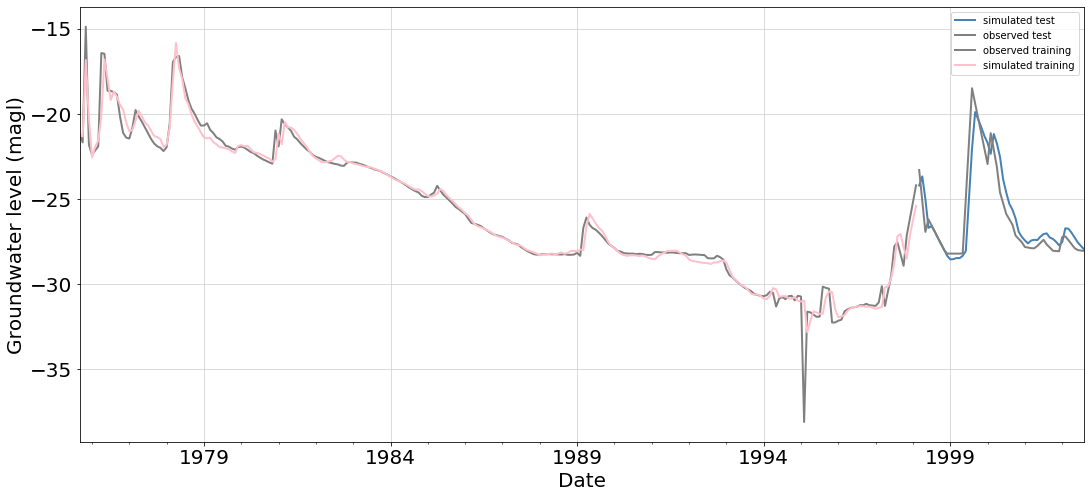

In [69]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [70]:
y_gru = out_df['simulated test']

### FFNN

In [71]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(54, 6)

    #running function
    gwl = 0.66154411
    test_forecast = X_test
    steps_ahead = 54
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 4s - loss: 1.0598 - mean_squared_error: 1.0598
Epoch 00001: val_loss improved from inf to 0.34121, saving model to model.h5
270/270 [==============================] - 7s 27ms/sample - loss: 0.9724 - mean_squared_error: 0.9724 - val_loss: 0.3412 - val_mean_squared_error: 0.3412
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.7873 - mean_squared_error: 0.7873
Epoch 00002: val_loss improved from 0.34121 to 0.26108, saving model to model.h5
270/270 [==============================] - 0s 188us/sample - loss: 0.6803 - mean_squared_error: 0.6803 - val_loss: 0.2611 - val_mean_squared_error: 0.2611
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4362 - mean_squared_error: 0.4362
Epoch 00003: val_loss improved from 0.26108 to 0.20389, saving model to model.h5
270/270 [==============================] - 0s 184us/sample 

Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00026: val_loss did not improve from 0.09081
270/270 [==============================] - 0s 106us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00027: val_loss did not improve from 0.09081
270/270 [==============================] - 0s 139us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0918 - val_mean_squared_error: 0.0918
Epoch 28/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 00028: val_loss improved from 0.09081 to 0.08993, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 29/1000
 96/270 [==

Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 00052: val_loss did not improve from 0.08569
270/270 [==============================] - 0s 129us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0880 - val_mean_squared_error: 0.0880
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00053: val_loss did not improve from 0.08569
270/270 [==============================] - 0s 87us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0884 - val_mean_squared_error: 0.0884
Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00054: val_loss did not improve from 0.08569
270/270 [==============================] - 0s 124us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 55/1000
 96/270 [=========>....................] -

Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00078: val_loss did not improve from 0.08439
270/270 [==============================] - 0s 85us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0849 - val_mean_squared_error: 0.0849
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00079: val_loss improved from 0.08439 to 0.08424, saving model to model.h5
270/270 [==============================] - 0s 190us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0842 - val_mean_squared_error: 0.0842
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00080: val_loss improved from 0.08424 to 0.08395, saving model to model.h5
270/270 [==============================] - 0s 191us/sample - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0840 - val_mean_squared_error: 0.0

Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00104: val_loss did not improve from 0.08381
270/270 [==============================] - 0s 87us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00105: val_loss did not improve from 0.08381
270/270 [==============================] - 0s 85us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0841 - val_mean_squared_error: 0.0841
Epoch 106/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00106: val_loss did not improve from 0.08381
270/270 [==============================] - 0s 84us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0855 - val_mean_squared_error: 0.0855
Epoch 107/1000
 96/270 [=========>....................]

Epoch 130/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00130: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 83us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 131/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00131: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 81us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 132/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00132: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 81us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0855 - val_mean_squared_error: 0.0855
Epoch 133/1000
 96/270 [=========>....................]

 96/270 [=========>....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00156: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 80us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0851 - val_mean_squared_error: 0.0851
Epoch 157/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00157: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 82us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0864 - val_mean_squared_error: 0.0864
Epoch 158/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00158: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 78us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0886 - val_mean_squared_error: 0.0886
Epoch 159/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00182: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 85us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0873 - val_mean_squared_error: 0.0873
Epoch 183/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00183: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 84us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 184/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00184: val_loss did not improve from 0.08302
270/270 [==============================] - 0s 84us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0893 - val_mean_squared_error: 0.0893
Epoch 185/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 208/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00208: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 86us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 209/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00209: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 80us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0940 - val_mean_squared_error: 0.0940
Epoch 210/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00210: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 87us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 211/1000
 96/270 [=========>....................]

Epoch 234/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00234: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 83us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0900 - val_mean_squared_error: 0.0900
Epoch 235/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00235: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 86us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 236/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00236: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 85us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 237/1000
 96/270 [=========>....................]

Epoch 260/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00260: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 96us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 261/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00261: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 83us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 262/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00262: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 93us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 263/1000
 96/270 [=========>....................]

Epoch 286/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00286: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 161us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0948 - val_mean_squared_error: 0.0948
Epoch 287/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 00287: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 113us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 288/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00288: val_loss did not improve from 0.08273
270/270 [==============================] - 0s 123us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0946 - val_mean_squared_error: 0.0946
Epoch 289/1000
 96/270 [=========>..................

Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00016: val_loss did not improve from 0.08799
270/270 [==============================] - 0s 129us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0892 - val_mean_squared_error: 0.0892
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00017: val_loss did not improve from 0.08799
270/270 [==============================] - 0s 119us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0899 - val_mean_squared_error: 0.0899
Epoch 18/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00018: val_loss did not improve from 0.08799
270/270 [==============================] - 0s 109us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0885 - val_mean_squared_error: 0.0885
Epoch 19/1000
 96/270 [=========>....................] 

Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00042: val_loss improved from 0.08662 to 0.08654, saving model to model.h5
270/270 [==============================] - 0s 248us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0865 - val_mean_squared_error: 0.0865
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00043: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 122us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0880 - val_mean_squared_error: 0.0880
Epoch 44/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00044: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 94us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0874 - val_mean_squared_error: 0.0874
Epoch 45/1000
 96/270 [===

Epoch 68/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00068: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 231us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 69/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00069: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 169us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00070: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 128us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 71/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00094: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 94us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00095: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 94us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00096: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 99us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - loss:

 96/270 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00120: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 117us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00121: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 94us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0948 - val_mean_squared_error: 0.0948
Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00122: val_loss did not improve from 0.08654
270/270 [==============================] - 0s 89us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - l

Epoch 4/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1156 - mean_squared_error: 0.1156
Epoch 00004: val_loss improved from 0.10378 to 0.08938, saving model to model.h5
270/270 [==============================] - 0s 477us/sample - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 5/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00005: val_loss improved from 0.08938 to 0.08795, saving model to model.h5
270/270 [==============================] - 0s 395us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0879 - val_mean_squared_error: 0.0879
Epoch 6/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00006: val_loss did not improve from 0.08795
270/270 [==============================] - 0s 126us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0891 - val_mean_squared_error: 0.089

Epoch 30/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00030: val_loss did not improve from 0.08754
270/270 [==============================] - 0s 112us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0932 - val_mean_squared_error: 0.0932
Epoch 31/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00031: val_loss did not improve from 0.08754
270/270 [==============================] - 0s 119us/sample - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0878 - val_mean_squared_error: 0.0878
Epoch 32/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00032: val_loss did not improve from 0.08754
270/270 [==============================] - 0s 166us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0917 - val_mean_squared_error: 0.0917
Epoch 33/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00056: val_loss did not improve from 0.08754
270/270 [==============================] - 0s 108us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 57/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00057: val_loss did not improve from 0.08754
270/270 [==============================] - 0s 115us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 58/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00058: val_loss did not improve from 0.08754
270/270 [==============================] - 0s 126us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 59/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 82/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00082: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 103us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 83/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00083: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 102us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0944 - val_mean_squared_error: 0.0944
Epoch 84/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00084: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 100us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.1011 - val_mean_squared_error: 0.1011
Epoch 85/1000
 96/270 [=========>....................] 

Epoch 108/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00108: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 106us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1022 - val_mean_squared_error: 0.1022
Epoch 109/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00109: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 104us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 110/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00110: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 99us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0940 - val_mean_squared_error: 0.0940
Epoch 111/1000
 96/270 [=========>...................

Epoch 134/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00134: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 98us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 135/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00135: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 99us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 136/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00136: val_loss did not improve from 0.08652
270/270 [==============================] - 0s 97us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0987 - val_mean_squared_error: 0.0987
Epoch 137/1000
 96/270 [=========>....................]

Running fold 4
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 5s - loss: 1.2616 - mean_squared_error: 1.2616
Epoch 00001: val_loss improved from inf to 0.42914, saving model to model.h5
270/270 [==============================] - 9s 32ms/sample - loss: 1.1899 - mean_squared_error: 1.1899 - val_loss: 0.4291 - val_mean_squared_error: 0.4291
Epoch 2/1000
 96/270 [=========>....................] - ETA: 0s - loss: 1.0352 - mean_squared_error: 1.0352
Epoch 00002: val_loss improved from 0.42914 to 0.33236, saving model to model.h5
270/270 [==============================] - 0s 352us/sample - loss: 0.8487 - mean_squared_error: 0.8487 - val_loss: 0.3324 - val_mean_squared_error: 0.3324
Epoch 3/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4681 - mean_squared_error: 0.4681
Epoch 00003: val_loss improved from 0.33236 to 0.29055, saving model to model.h5
270/270 [==============================] - 0s 313us/sample 

270/270 [==============================] - 0s 388us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0890 - val_mean_squared_error: 0.0890
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00026: val_loss did not improve from 0.08903
270/270 [==============================] - 0s 122us/sample - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0943 - val_mean_squared_error: 0.0943
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00027: val_loss did not improve from 0.08903
270/270 [==============================] - 0s 125us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 28/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00028: val_loss did not improve from 0.08903
270/270 [==============================] - 0s 116us/sam

Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00052: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 110us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00053: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 104us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1064 - val_mean_squared_error: 0.1064
Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00054: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 130us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1020 - val_mean_squared_error: 0.1020
Epoch 55/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00078: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 144us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0932 - val_mean_squared_error: 0.0932
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00079: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 173us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0929 - val_mean_squared_error: 0.0929
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00080: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 137us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 81/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00104: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 114us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00105: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 116us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1066 - val_mean_squared_error: 0.1066
Epoch 106/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00106: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 121us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 107/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 130/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00130: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 133us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1130 - val_mean_squared_error: 0.1130
Epoch 131/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00131: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 116us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 132/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00132: val_loss did not improve from 0.08833
270/270 [==============================] - 0s 117us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 133/1000
 96/270 [=========>..................

Epoch 18/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00018: val_loss improved from 0.09792 to 0.09540, saving model to model.h5
270/270 [==============================] - 0s 445us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 19/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00019: val_loss did not improve from 0.09540
270/270 [==============================] - 0s 221us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 20/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00020: val_loss did not improve from 0.09540
270/270 [==============================] - 0s 110us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 21/1000
 96/270 [==

Epoch 44/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00044: val_loss did not improve from 0.09483
270/270 [==============================] - 0s 157us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 45/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00045: val_loss did not improve from 0.09483
270/270 [==============================] - 0s 131us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1006 - val_mean_squared_error: 0.1006
Epoch 46/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00046: val_loss did not improve from 0.09483
270/270 [==============================] - 0s 126us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1128 - val_mean_squared_error: 0.1128
Epoch 47/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00070: val_loss did not improve from 0.09483
270/270 [==============================] - 0s 126us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 71/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 00071: val_loss did not improve from 0.09483
270/270 [==============================] - 0s 110us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.1038 - val_mean_squared_error: 0.1038
Epoch 72/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00072: val_loss did not improve from 0.09483
270/270 [==============================] - 0s 137us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0966 - val_mean_squared_error: 0.0966
Epoch 73/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00096: val_loss did not improve from 0.09333
270/270 [==============================] - 0s 137us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1006 - val_mean_squared_error: 0.1006
Epoch 97/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00097: val_loss did not improve from 0.09333
270/270 [==============================] - 0s 142us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoch 98/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00098: val_loss did not improve from 0.09333
270/270 [==============================] - 0s 120us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.1219 - val_mean_squared_error: 0.1219
Epoch 99/1000
 96/270 [=========>....................] 

Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00122: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 140us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 123/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00123: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 136us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1008 - val_mean_squared_error: 0.1008
Epoch 124/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00124: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 142us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 125/1000
 96/270 [=========>..................

Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00148: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 121us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 149/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00149: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 124us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 150/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00150: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 118us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 151/1000
 96/270 [=========>..................

Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00174: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 142us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 175/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00175: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 139us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 176/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00176: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 146us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 177/1000
 96/270 [=========>..................

Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00200: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 162us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1122 - val_mean_squared_error: 0.1122
Epoch 201/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00201: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 209us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 202/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00202: val_loss did not improve from 0.09332
270/270 [==============================] - 0s 254us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 203/1000
 96/270 [=========>..................

 96/270 [=========>....................] - ETA: 0s - loss: 0.3654 - mean_squared_error: 0.3654
Epoch 00006: val_loss improved from 0.17687 to 0.16046, saving model to model.h5
270/270 [==============================] - 0s 598us/sample - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 7/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3671 - mean_squared_error: 0.3671
Epoch 00007: val_loss improved from 0.16046 to 0.14344, saving model to model.h5
270/270 [==============================] - 0s 657us/sample - loss: 0.3569 - mean_squared_error: 0.3569 - val_loss: 0.1434 - val_mean_squared_error: 0.1434
Epoch 8/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3641 - mean_squared_error: 0.3641
Epoch 00008: val_loss improved from 0.14344 to 0.13380, saving model to model.h5
270/270 [==============================] - 0s 500us/sample - loss: 0.3367 - mean_squared_error: 0.3367 - val_loss: 0.1338 - val_mean_squ

Epoch 32/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00032: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 172us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 33/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00033: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 186us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 34/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00034: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 140us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 35/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00058: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 145us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 59/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00059: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 142us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0916 - val_mean_squared_error: 0.0916
Epoch 60/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00060: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 129us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 00084: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 122us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 85/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00085: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 158us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1150 - val_mean_squared_error: 0.1150
Epoch 86/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00086: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 121us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1115 - val_mean_squared_error: 0.1115
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00110: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 141us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 111/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00111: val_loss did not improve from 0.08502
270/270 [==============================] - 0s 126us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Running fold 7
(270, 6)
Train on 270 samples, validate on 54 samples
Epoch 1/1000
 96/270 [=========>....................] - ETA: 17s - loss: 1.0030 - mean_squared_error: 1.0030
Epoch 00001: val_loss improved from inf to 0.15286, saving model to model.h5
270/270 [==============================] - 17s 64ms/sample - loss: 0.7201 - mean_squared_error: 0.7201 - val_loss: 0.1529 - val_

Epoch 25/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00025: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 167us/sample - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 26/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00026: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 223us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.1043 - val_mean_squared_error: 0.1043
Epoch 27/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00027: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 236us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.1060 - val_mean_squared_error: 0.1060
Epoch 28/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 00051: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 133us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0961 - val_mean_squared_error: 0.0961
Epoch 52/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00052: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 154us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1229 - val_mean_squared_error: 0.1229
Epoch 53/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 00053: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 147us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 54/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00077: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 146us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1199 - val_mean_squared_error: 0.1199
Epoch 78/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00078: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 162us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 79/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00079: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 143us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1046 - val_mean_squared_error: 0.1046
Epoch 80/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00103: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 147us/sample - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0994 - val_mean_squared_error: 0.0994
Epoch 104/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00104: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 153us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 105/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00105: val_loss did not improve from 0.09163
270/270 [==============================] - 0s 140us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 106/1000
 96/270 [=========>....................] - ETA: 0s -

 96/270 [=========>....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00011: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 258us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0942 - val_mean_squared_error: 0.0942
Epoch 12/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00012: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 312us/sample - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 13/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 00013: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 313us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 14/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00037: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 182us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 38/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00038: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 163us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 39/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00039: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 167us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1034 - val_mean_squared_error: 0.1034
Epoch 40/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00063: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 152us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 64/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00064: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 137us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoch 65/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00065: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 137us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 66/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00089: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 187us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 90/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00090: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 166us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0974 - val_mean_squared_error: 0.0974
Epoch 91/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00091: val_loss did not improve from 0.09092
270/270 [==============================] - 0s 179us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 92/1000
 96/270 [=========>....................] - ETA: 0s - lo

Epoch 00008: val_loss did not improve from 0.21115
270/270 [==============================] - 0s 156us/sample - loss: 0.4520 - mean_squared_error: 0.4520 - val_loss: 0.2340 - val_mean_squared_error: 0.2340
Epoch 9/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4346 - mean_squared_error: 0.4346
Epoch 00009: val_loss improved from 0.21115 to 0.20232, saving model to model.h5
270/270 [==============================] - 0s 700us/sample - loss: 0.4441 - mean_squared_error: 0.4441 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 10/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.4875 - mean_squared_error: 0.4875
Epoch 00010: val_loss did not improve from 0.20232
270/270 [==============================] - 0s 142us/sample - loss: 0.4287 - mean_squared_error: 0.4287 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 11/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.3587 - mean_squared_error: 0.3587
Epoch 00011: val_loss impr

Epoch 34/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00034: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 150us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1125 - val_mean_squared_error: 0.1125
Epoch 35/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00035: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 149us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1303 - val_mean_squared_error: 0.1303
Epoch 36/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00036: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 141us/sample - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoch 37/1000
 96/270 [=========>....................] 

 96/270 [=========>....................] - ETA: 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 00060: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 158us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 61/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00061: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 152us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1835 - val_mean_squared_error: 0.1835
Epoch 62/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00062: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 142us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 63/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00086: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 200us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 87/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 00087: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 188us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1150 - val_mean_squared_error: 0.1150
Epoch 88/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00088: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 151us/sample - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.1277 - val_mean_squared_error: 0.1277
Epoch 89/1000
 96/270 [=========>....................] - ETA: 0s - lo

 96/270 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00112: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 155us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 113/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 00113: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 147us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.1078 - val_mean_squared_error: 0.1078
Epoch 114/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00114: val_loss did not improve from 0.08964
270/270 [==============================] - 0s 145us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 115/1000
 96/270 [=========>....................] - ETA: 0s -

Epoch 16/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 00016: val_loss did not improve from 0.17274
270/270 [==============================] - 0s 162us/sample - loss: 0.1369 - mean_squared_error: 0.1369 - val_loss: 0.1776 - val_mean_squared_error: 0.1776
Epoch 17/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00017: val_loss improved from 0.17274 to 0.14363, saving model to model.h5
270/270 [==============================] - 0s 695us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 18/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 00018: val_loss improved from 0.14363 to 0.13553, saving model to model.h5
270/270 [==============================] - 0s 771us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.1355 - val_mean_squared_error: 0.

Epoch 42/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00042: val_loss did not improve from 0.11270
270/270 [==============================] - 0s 463us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1607 - val_mean_squared_error: 0.1607
Epoch 43/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00043: val_loss did not improve from 0.11270
270/270 [==============================] - 0s 209us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1148 - val_mean_squared_error: 0.1148
Epoch 44/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00044: val_loss did not improve from 0.11270
270/270 [==============================] - 0s 184us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.1818 - val_mean_squared_error: 0.1818
Epoch 45/1000
 96/270 [=========>....................] 

Epoch 68/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00068: val_loss did not improve from 0.10977
270/270 [==============================] - 0s 154us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.1472 - val_mean_squared_error: 0.1472
Epoch 69/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00069: val_loss did not improve from 0.10977
270/270 [==============================] - 0s 151us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 70/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00070: val_loss did not improve from 0.10977
270/270 [==============================] - 0s 154us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 71/1000
 96/270 [=========>....................] 

Epoch 94/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00094: val_loss did not improve from 0.10973
270/270 [==============================] - 0s 178us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 95/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00095: val_loss did not improve from 0.10973
270/270 [==============================] - 0s 177us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 96/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0807 - mean_squared_error: 0.0807
Epoch 00096: val_loss did not improve from 0.10973
270/270 [==============================] - 0s 187us/sample - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 97/1000
 96/270 [=========>....................] 

Epoch 120/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00120: val_loss did not improve from 0.10943
270/270 [==============================] - 0s 163us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1185 - val_mean_squared_error: 0.1185
Epoch 121/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00121: val_loss did not improve from 0.10943
270/270 [==============================] - 0s 159us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.1422 - val_mean_squared_error: 0.1422
Epoch 122/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00122: val_loss did not improve from 0.10943
270/270 [==============================] - 0s 163us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 123/1000
 96/270 [=========>..................

Epoch 146/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00146: val_loss did not improve from 0.10943
270/270 [==============================] - 0s 152us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 147/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00147: val_loss improved from 0.10943 to 0.10732, saving model to model.h5
270/270 [==============================] - 0s 791us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 148/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00148: val_loss did not improve from 0.10732
270/270 [==============================] - 0s 169us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.1362 - val_mean_squared_error: 0.1362
Epoch 149/1000
 96/270

Epoch 172/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00172: val_loss did not improve from 0.10705
270/270 [==============================] - 0s 161us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1819 - val_mean_squared_error: 0.1819
Epoch 173/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00173: val_loss did not improve from 0.10705
270/270 [==============================] - 0s 190us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1232 - val_mean_squared_error: 0.1232
Epoch 174/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0743 - mean_squared_error: 0.0743
Epoch 00174: val_loss did not improve from 0.10705
270/270 [==============================] - 0s 154us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.1600 - val_mean_squared_error: 0.1600
Epoch 175/1000
 96/270 [=========>..................

Epoch 198/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00198: val_loss did not improve from 0.10705
270/270 [==============================] - 0s 171us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.1164 - val_mean_squared_error: 0.1164
Epoch 199/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00199: val_loss did not improve from 0.10705
270/270 [==============================] - 0s 156us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.1625 - val_mean_squared_error: 0.1625
Epoch 200/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00200: val_loss did not improve from 0.10705
270/270 [==============================] - 0s 157us/sample - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.1587 - val_mean_squared_error: 0.1587
Epoch 201/1000
 96/270 [=========>..................

Epoch 224/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00224: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 157us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.1616 - val_mean_squared_error: 0.1616
Epoch 225/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00225: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 155us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 226/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00226: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 182us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 227/1000
 96/270 [=========>..................

Epoch 250/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00250: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 161us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 251/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00251: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 156us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.1402 - val_mean_squared_error: 0.1402
Epoch 252/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00252: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 180us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 253/1000
 96/270 [=========>..................

Epoch 276/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00276: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 163us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.2364 - val_mean_squared_error: 0.2364
Epoch 277/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00277: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 162us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 278/1000
 96/270 [=========>....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00278: val_loss did not improve from 0.10438
270/270 [==============================] - 0s 166us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1801 - val_mean_squared_error: 0.1801
Epoch 279/1000
 96/270 [=========>..................

In [72]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.113    0.335  0.762   0.256
1   Iteration_2   0.114    0.337  0.760   0.248
2   Iteration_3   0.113    0.336  0.761   0.257
3   Iteration_4   0.117    0.342  0.752   0.255
4   Iteration_5   0.121    0.349  0.743   0.260
5   Iteration_6   0.141    0.375  0.702   0.282
6   Iteration_7   0.151    0.389  0.679   0.302
7   Iteration_8   0.163    0.403  0.656   0.309
8   Iteration_9   0.154    0.393  0.673   0.321
9  Iteration_10   0.153    0.391  0.677   0.327

In [73]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [74]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values

In [75]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:324]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.041
Root mean squared error is: 0.202
Mean absolute error is: 0.115
R^2 score is:  0.963

The model performance for the test set
--------------------------------------
R^2 score is:  0.717
Mean squared error is: 0.134
Root mean squared error is: 0.365
Mean absolute error is: 0.282


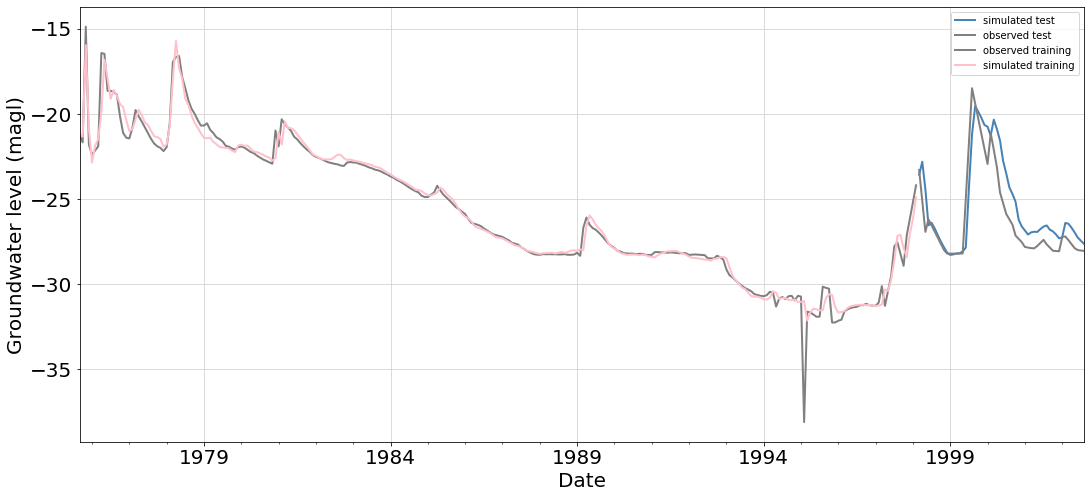

In [76]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [77]:
y_ff = out_df['simulated test']

In [78]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.113    0.335  0.762   0.256
1   Iteration_2   0.114    0.337  0.760   0.248
2   Iteration_3   0.113    0.336  0.761   0.257
3   Iteration_4   0.117    0.342  0.752   0.255
4   Iteration_5   0.121    0.349  0.743   0.260
5   Iteration_6   0.141    0.375  0.702   0.282
6   Iteration_7   0.151    0.389  0.679   0.302
7   Iteration_8   0.163    0.403  0.656   0.309
8   Iteration_9   0.154    0.393  0.673   0.321
9  Iteration_10   0.153    0.391  0.677   0.327

In [79]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [80]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[270:324, 6].values

In [81]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:270]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[270:324]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.041
Root mean squared error is: 0.202
Mean absolute error is: 0.115
R^2 score is:  0.963

The model performance for the test set
--------------------------------------
R^2 score is:  0.825
Mean squared error is: 0.083
Root mean squared error is: 0.287
Mean absolute error is: 0.198


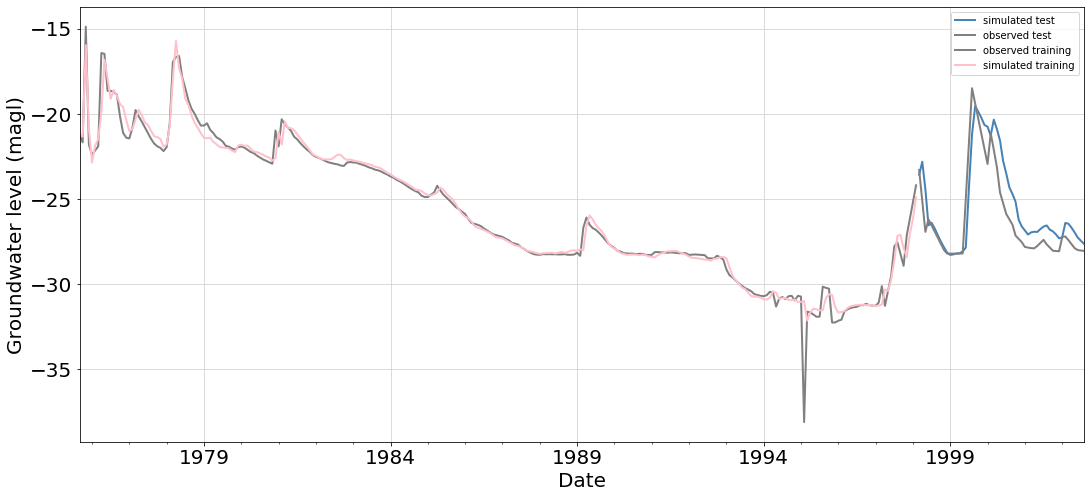

In [82]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [83]:
y_ff = out_df['simulated test']

## Static Models

In [84]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','2625BB00028']]

In [85]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['2625BB00028'].values
y = y.reshape(-1,1)

In [86]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(270, 6) (270, 1)
(54, 6) (54, 1)


In [87]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [88]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


In [89]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   1.449    1.204  0.786   0.719
1   Iteration_2   3.914    1.978  0.423   1.244
2   Iteration_3   1.763    1.328  0.740   0.961
3   Iteration_4   3.605    1.899  0.468   1.021
4   Iteration_5   1.834    1.354  0.729   0.963
5   Iteration_6   1.500    1.225  0.779   0.771
6   Iteration_7   1.689    1.299  0.751   0.930
7   Iteration_8   1.713    1.309  0.747   0.911
8   Iteration_9   1.398    1.182  0.794   0.710
9  Iteration_10   1.808    1.345  0.733   0.959

In [90]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [91]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.695
Mean squared error is: 2.067
Root mean squared error is: 1.412
Mean absolute error is: 0.919


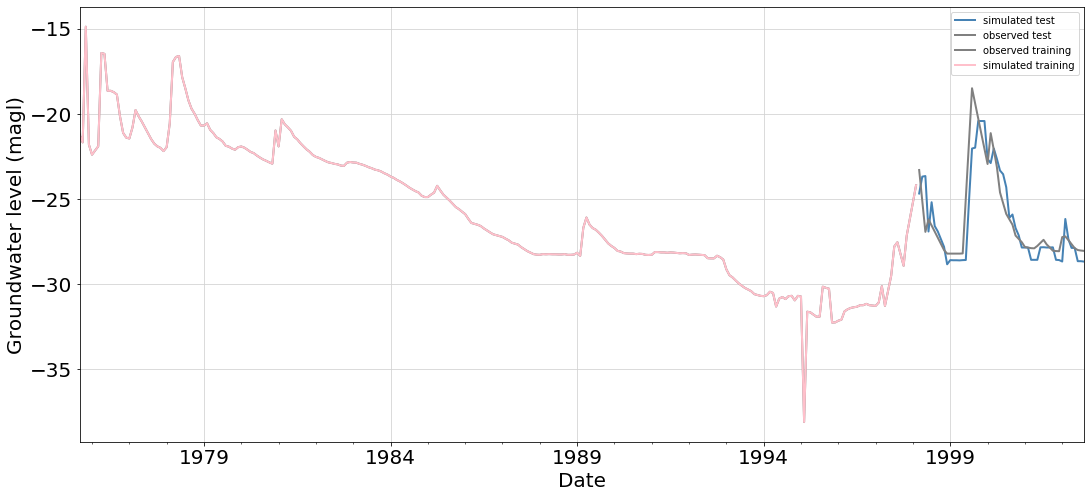

In [92]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [93]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [94]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    1.327     1.152   0.804     0.73
1   Iteration_2    1.327     1.152   0.804     0.73
2   Iteration_3    1.327     1.152   0.804     0.73
3   Iteration_4    1.327     1.152   0.804     0.73
4   Iteration_5    1.327     1.152   0.804     0.73
5   Iteration_6    1.327     1.152   0.804     0.73
6   Iteration_7    1.327     1.152   0.804     0.73
7   Iteration_8    1.327     1.152   0.804     0.73
8   Iteration_9    1.327     1.152   0.804     0.73
9  Iteration_10    1.327     1.152   0.804     0.73

In [95]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [96]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 1.334
Root mean squared error is: 1.155
Mean absolute error is: 0.41
R^2 score is:  0.916

The model performance for the test set
--------------------------------------
R^2 score is:  0.804
Mean squared error is: 1.327
Root mean squared error is: 1.152
Mean absolute error is: 0.73


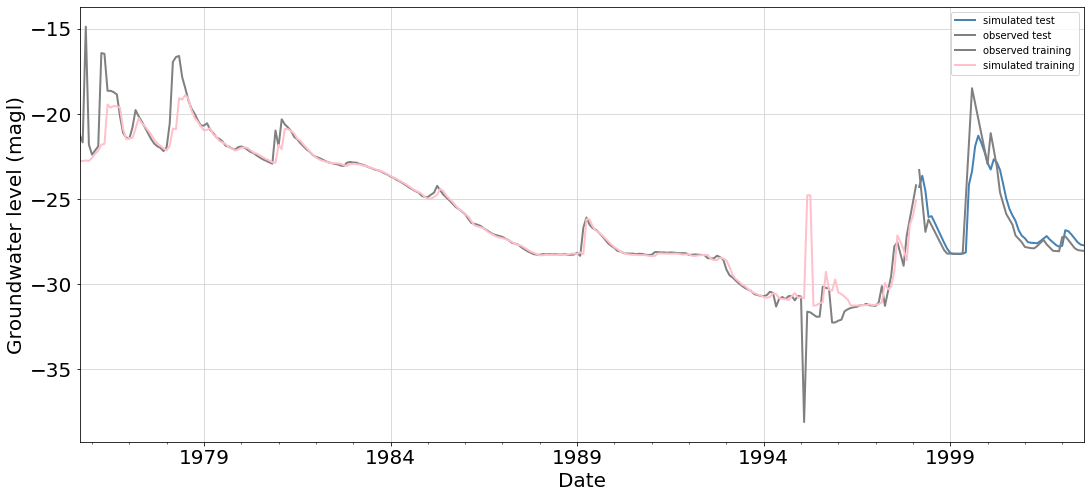

In [97]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   1.354    1.164  0.800   0.730
1   Iteration_2   1.382    1.176  0.796   0.730
2   Iteration_3   1.339    1.157  0.802   0.721
3   Iteration_4   1.330    1.153  0.804   0.726
4   Iteration_5   1.364    1.168  0.799   0.730
5   Iteration_6   1.330    1.153  0.804   0.725
6   Iteration_7   1.372    1.171  0.798   0.733
7   Iteration_8   1.311    1.145  0.807   0.708
8   Iteration_9   1.342    1.158  0.802   0.717
9  Iteration_10   1.319    1.149  0.805   0.708

In [100]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [101]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.05
Root mean squared error is: 0.223
Mean absolute error is: 0.135
R^2 score is:  0.997

The model performance for the test set
--------------------------------------
R^2 score is:  0.802
Mean squared error is: 1.344
Root mean squared error is: 1.159
Mean absolute error is: 0.723


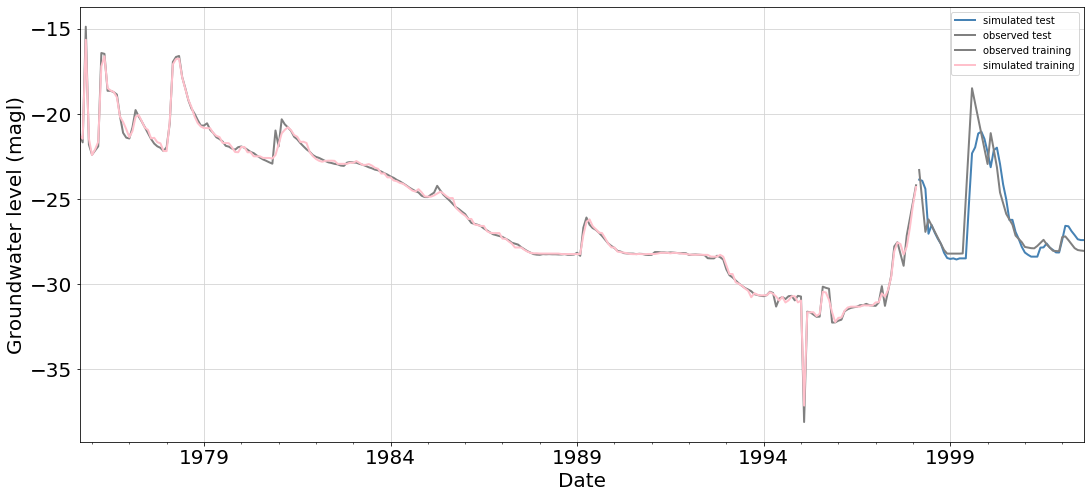

In [102]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(270, 6)
Running fold 2
(270, 6)
Running fold 3
(270, 6)
Running fold 4
(270, 6)
Running fold 5
(270, 6)
Running fold 6
(270, 6)
Running fold 7
(270, 6)
Running fold 8
(270, 6)
Running fold 9
(270, 6)
Running fold 10
(270, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [104]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   1.127    1.061  0.834   0.673
1   Iteration_2   1.407    1.186  0.792   0.748
2   Iteration_3   1.285    1.134  0.810   0.732
3   Iteration_4   1.458    1.208  0.785   0.746
4   Iteration_5   1.249    1.118  0.816   0.670
5   Iteration_6   1.238    1.113  0.817   0.729
6   Iteration_7   1.400    1.183  0.793   0.728
7   Iteration_8   1.626    1.275  0.760   0.791
8   Iteration_9   1.651    1.285  0.756   0.880
9  Iteration_10   1.567    1.252  0.769   0.851

In [105]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:270, 6].values

In [106]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.05
Root mean squared error is: 0.223
Mean absolute error is: 0.135
R^2 score is:  0.997

The model performance for the test set
--------------------------------------
R^2 score is:  0.793
Mean squared error is: 1.401
Root mean squared error is: 1.182
Mean absolute error is: 0.755


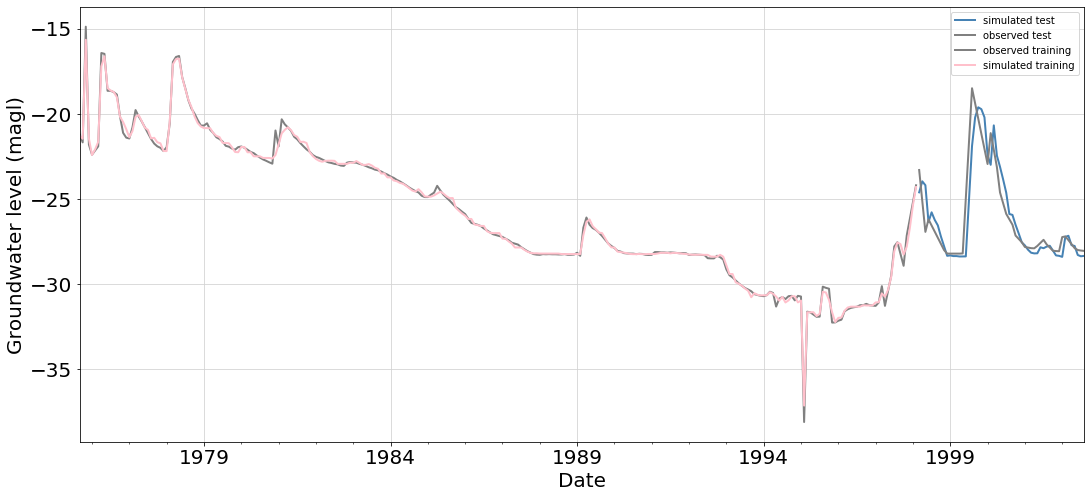

In [107]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[270:324].index)
df1['observed test']      = pima.iloc[270:324, 0].values

df2 = pd.DataFrame(pima.iloc[0:270, 0].values, columns = ['observed training'],index =pima.iloc[0:270].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [108]:
vs = pd.DataFrame(pima.iloc[270:324, 0].values, columns = ['Observed'],index =pima.iloc[270:324].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

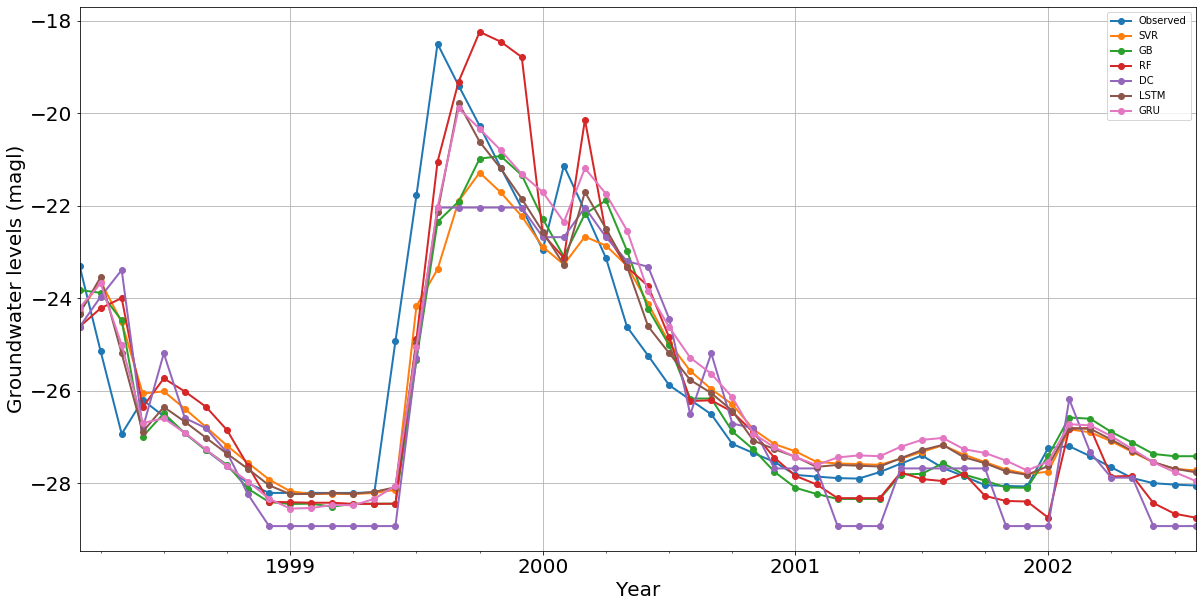

In [109]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)